## Importing the Python Libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

## Load the Dataset

In [4]:
data = pd.read_csv('raw_crowd_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14249 non-null  float64
 1   Latitude   14249 non-null  float64
 2   Speed      14249 non-null  float64
 3   Distance   14249 non-null  float64
 4   Time       14249 non-null  object 
 5   Acc X      14249 non-null  float64
 6   Acc Y      14249 non-null  float64
 7   Acc Z      14249 non-null  float64
 8   Heading    14249 non-null  int64  
 9   gyro_x     14249 non-null  float64
 10  gyro_y     14249 non-null  float64
 11  gyro_z     14249 non-null  float64
 12  label      14249 non-null  int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 1.4+ MB


##### Description of attributes/column
0. **Longitude**: East-west geographical position in degrees.
1. **Latitude**: North-south geographical position in degrees.
2. **Speed**: Movement rate of the device in m/s.
3. **Distance**: Total distance traveled by the device.
4. **Time**: Timestamp of when data is recorded.
5. **Acc X**: Forward-backward acceleration in m/s².
6. **Acc Y**: Left-right acceleration in m/s².
7. **Acc Z**: Up-down acceleration in m/s².
8. **Heading**: Direction of movement relative to magnetic north in degrees.
9. **Gyro_x**: Rotational velocity around the x-axis in rad/s.
10. **Gyro_y**: Rotational velocity around the y-axis in rad/s.
11. **Gyro_z**: Rotational velocity around the z-axis in rad/s.
12. **Label**: Classification indicating normal or anomalous behavior.

In [23]:
data.head()

Longitude   Latitude  Speed  Distance                Time     Acc X  \
0  73.822661  18.501627    0.0       0.0 1900-01-01 18:45:12  0.046402   
1  73.822661  18.501627    0.0       0.0 1900-01-01 18:45:12 -0.136978   
2  73.822661  18.501627    0.0       0.0 1900-01-01 18:45:13 -0.045355   
3  73.822661  18.501627    0.0       0.0 1900-01-01 18:45:13  0.242089   
4  73.822661  18.501627    0.0       0.0 1900-01-01 18:45:13 -0.230234   

      Acc Y     Acc Z  Heading    gyro_x    gyro_y    gyro_z  label  
0 -0.137178 -0.282934      352 -0.036306 -0.008226 -0.023416      0  
1  0.365242  0.108889      352  0.035776 -0.009448  0.009570      0  
2 -0.103340 -0.534985      352 -0.011871 -0.027774  0.003462      0  
3  0.072761 -0.350396      352 -0.017980  0.002769 -0.005091      0  
4  0.011765 -0.494085      352  0.011342  0.003380  0.006516      0

In [21]:
data.describe(include='all').T

count                           mean                  min  \
Longitude  14246.0                      73.826564            73.821195   
Latitude   14246.0                      18.508567            18.501504   
Speed      14246.0                       0.771898                  0.0   
Distance   14246.0                    2795.222874                  0.0   
Time         14246  1900-01-01 18:02:59.600940544  1900-01-01 17:14:53   
Acc X      14246.0                      -0.001137            -8.805807   
Acc Y      14246.0                       0.180237            -8.476646   
Acc Z      14246.0                      -0.023576           -17.320633   
Heading    14246.0                     171.269128                  0.0   
gyro_x     14246.0                      -0.001319            -2.062668   
gyro_y     14246.0                      -0.006521            -0.571912   
gyro_z     14246.0                        -0.0032            -0.666047   
label      14246.0                       0.592587                  0.0   

                           25%                  50%                  75%  \
Longitude            73.822785            73.828663            73.829445   
Latitude             18.504085             18.50786            18.513463   
Speed                      0.0                 0.76                 1.22   
Distance            448.081505            1007.3687          1645.653275   
Time       1900-01-01 17:20:50  1900-01-01 17:26:47  1900-01-01 18:50:21   
Acc X                 -0.37882            -0.013089             0.362683   
Acc Y                 -0.12669             0.167227             0.478868   
Acc Z                -0.701545            -0.025761             0.674922   
Heading                   77.0                150.0                249.0   
gyro_x                -0.04669            -0.002219             0.044939   
gyro_y               -0.033272            -0.005783             0.021706   
gyro_z               -0.027224            -0.002179             0.024088   
label                      0.0                  1.0                  1.0   

                           max            std  
Longitude            73.831393       0.003661  
Latitude             18.518714       0.005242  
Speed                    2.712       0.705439  
Distance             8312031.0  120598.784322  
Time       1900-01-01 18:56:18            NaN  
Acc X                10.488632       1.030982  
Acc Y                11.013258        0.83726  
Acc Z                  19.7258       1.768811  
Heading                  359.0     105.496919  
gyro_x                1.611687       0.141039  
gyro_y                0.599585        0.08785  
gyro_z                0.542856       0.068017  
label                      1.0        0.49137

## Exploratory Data Analysis (EDA) and Data Preprocessing
**Objective**:
• Clean and format data, detecting missing values and outliers.
• Plot the distribution plots for all variables (Box and Whisker’s plot)


In [9]:
# Finding Null Values
data.isnull().sum()
# Outcome: No Missing Value

Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X        0
Acc Y        0
Acc Z        0
Heading      0
gyro_x       0
gyro_y       0
gyro_z       0
label        0
dtype: int64

In [8]:
# Finding duplicates
data.duplicated().sum()

3

In [13]:
# Removing duplicates (removing from the dataset)
data = data.drop_duplicates()
data.duplicated().sum()

0

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14246 entries, 0 to 14248
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Longitude         14246 non-null  float64       
 1   Latitude          14246 non-null  float64       
 2   Speed             14246 non-null  float64       
 3   Distance          14246 non-null  float64       
 4   Time              14246 non-null  datetime64[ns]
 5   Acc X             14246 non-null  float64       
 6   Acc Y             14246 non-null  float64       
 7   Acc Z             14246 non-null  float64       
 8   Heading           14246 non-null  int64         
 9   gyro_x            14246 non-null  float64       
 10  gyro_y            14246 non-null  float64       
 11  gyro_z            14246 non-null  float64       
 12  label             14246 non-null  int64         
 13  Acc_Magnitude     14246 non-null  float64       
 14  Acc_Change        14246 non

In [19]:
# Convert the 'Time' column to datetime (assuming 'Time' is in 'HH-MM-SS' format)
data['Time'] = pd.to_datetime(data['Time'], format='%H-%M-%S')
print(data[['Time']].head())

                 Time
0 1900-01-01 18:45:12
1 1900-01-01 18:45:12
2 1900-01-01 18:45:13
3 1900-01-01 18:45:13
4 1900-01-01 18:45:13


### Visualization

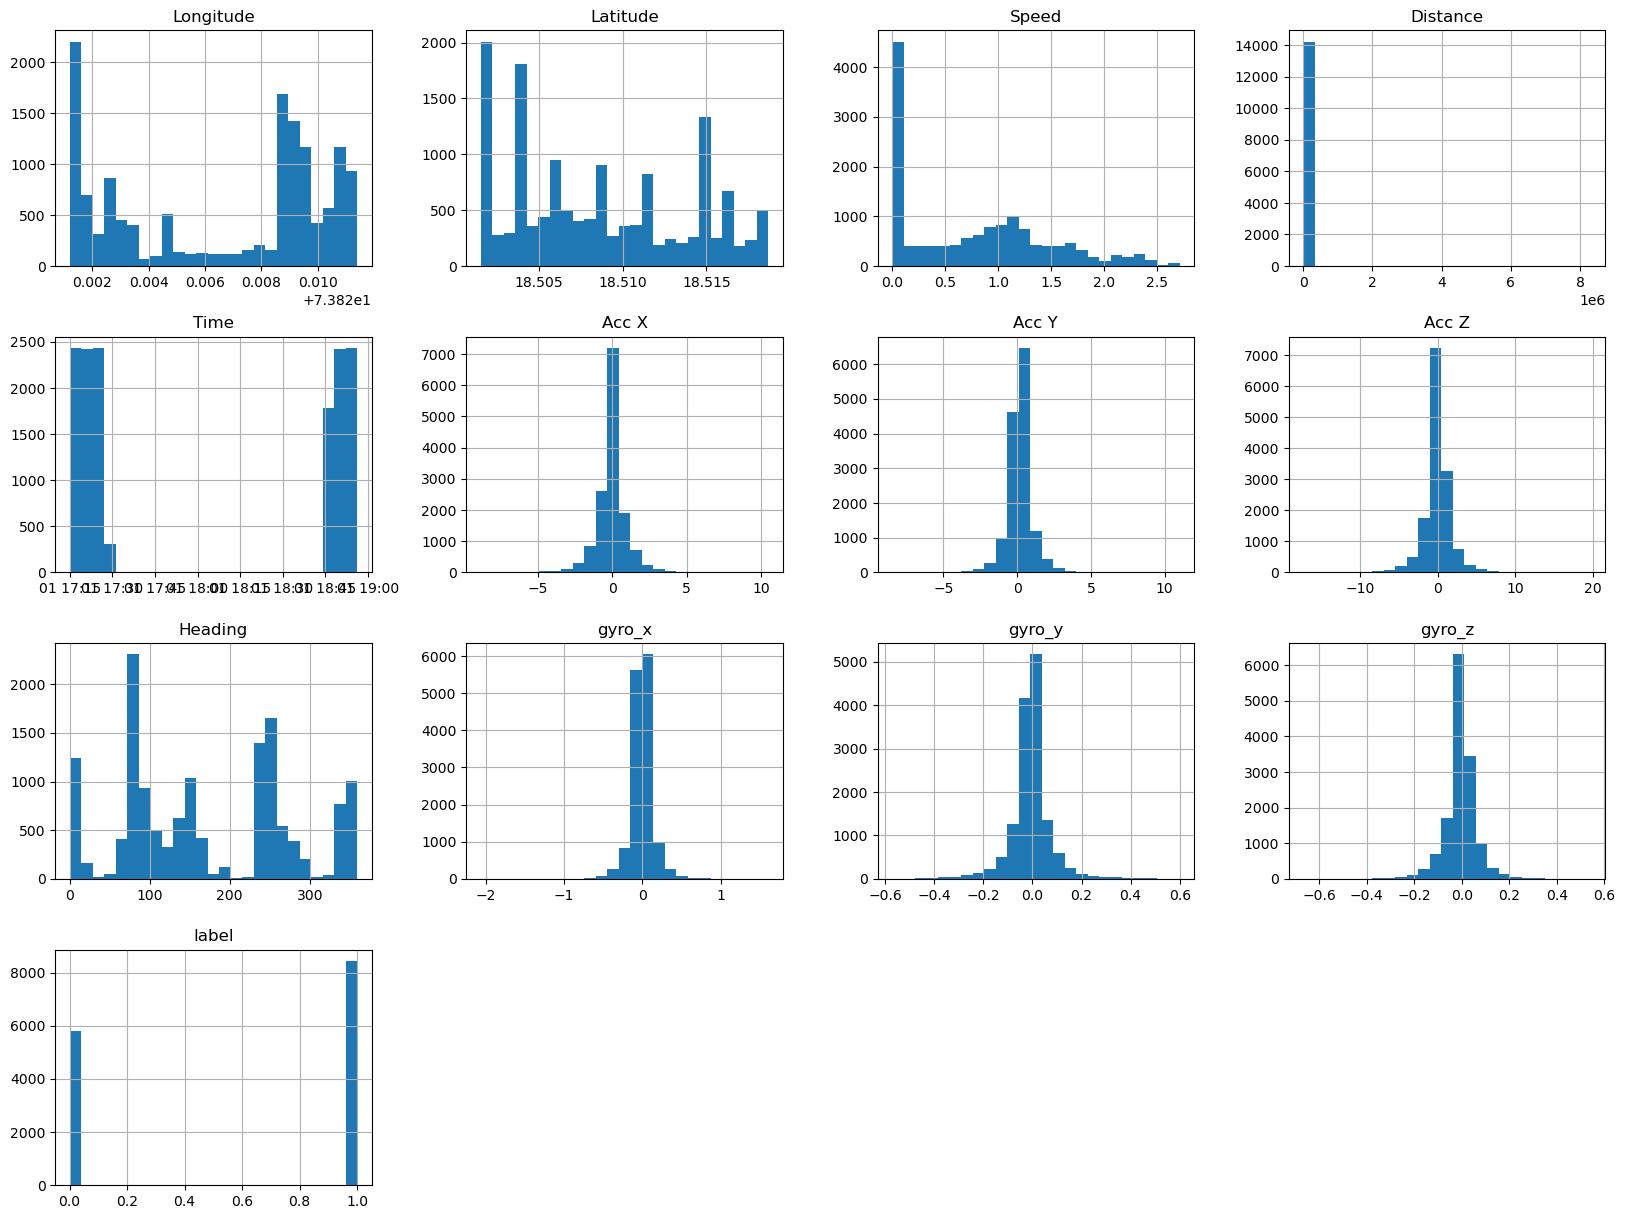

In [29]:
# Histogram
data.hist(bins=25, figsize=(20, 15))
plt.show()

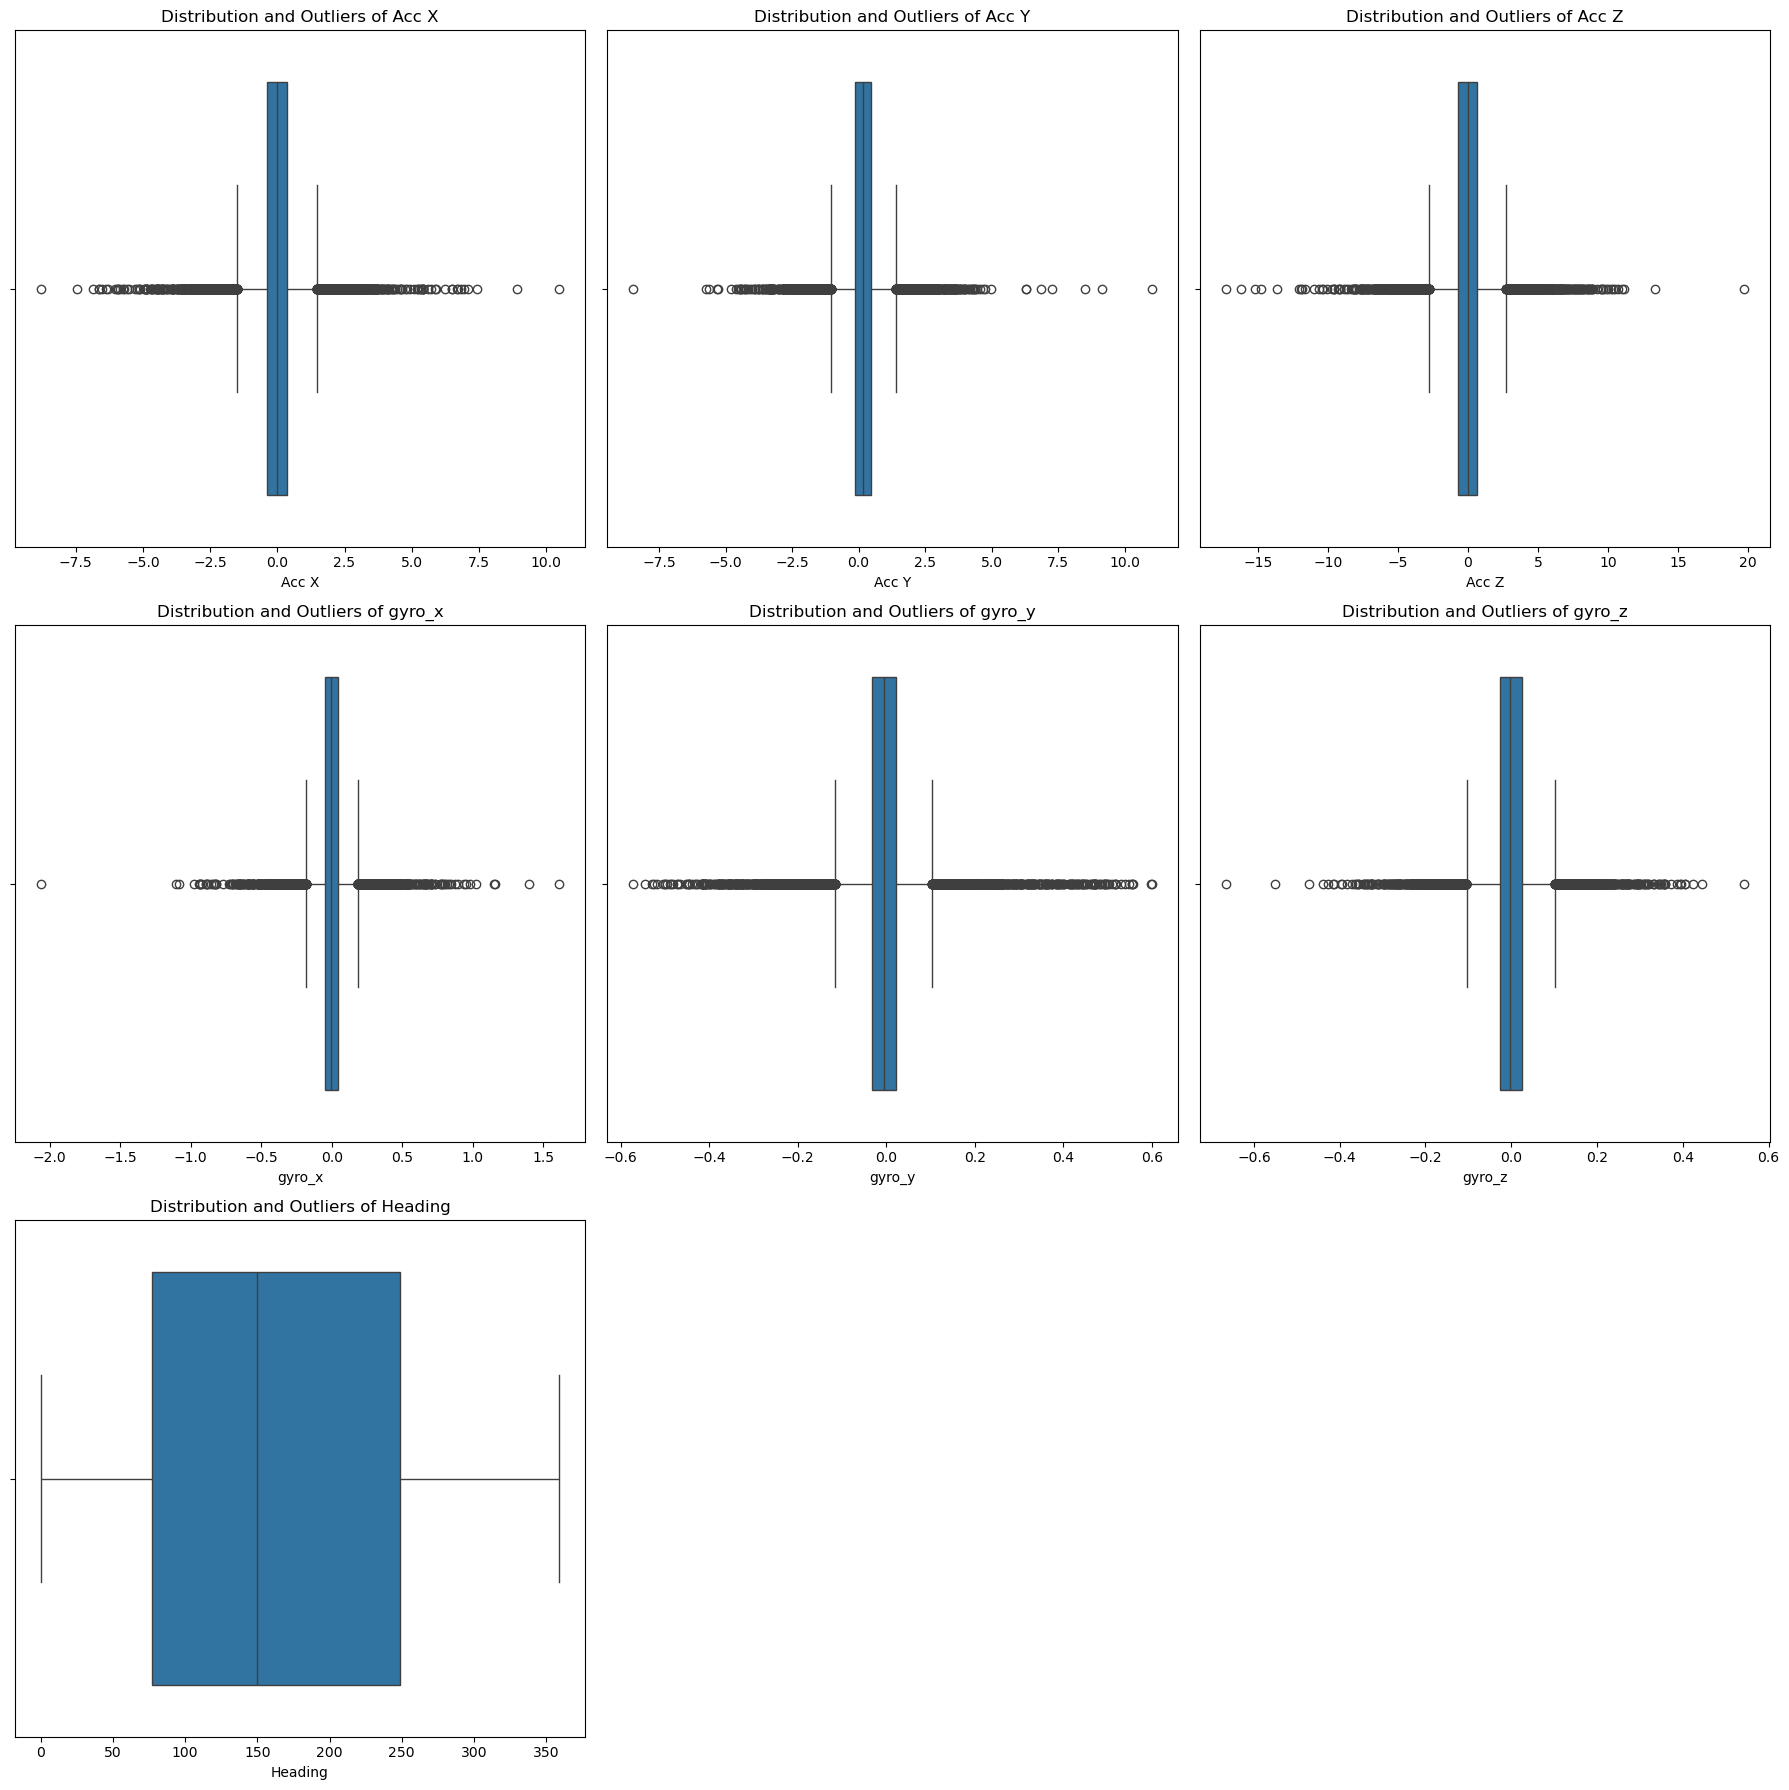

In [32]:
# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Distribution and Outliers of {col}')

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z','Heading']
plot_distribution_with_outliers(data, columns)

### Box and Whisker Plot Description
**Box**: Shows the middle 50% of the data (interquartile range).<br>
**Median (Line in the Box)**: Represents the midpoint of the data.<br>
**Whiskers**: Indicate the range within 1.5 times the IQR, showing non-outlier data.<br>
**Outliers (Dots)**: Data points outside the whiskers, indicating anomalies or extreme values.<br>
**Title**: Identifies the sensor data being plotted (e.g., Acc X or gyro_z).

Standardizing numeric variables...
Computing correlation matrix...


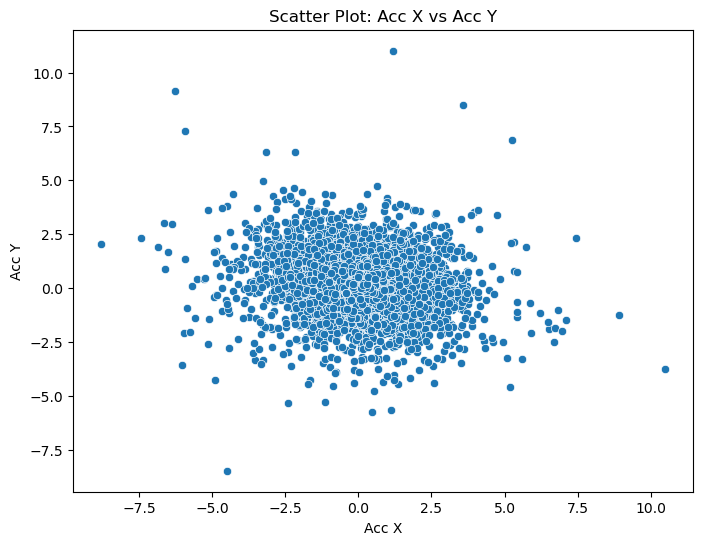

D:\Code\ML\ZM\sample_project_1\env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


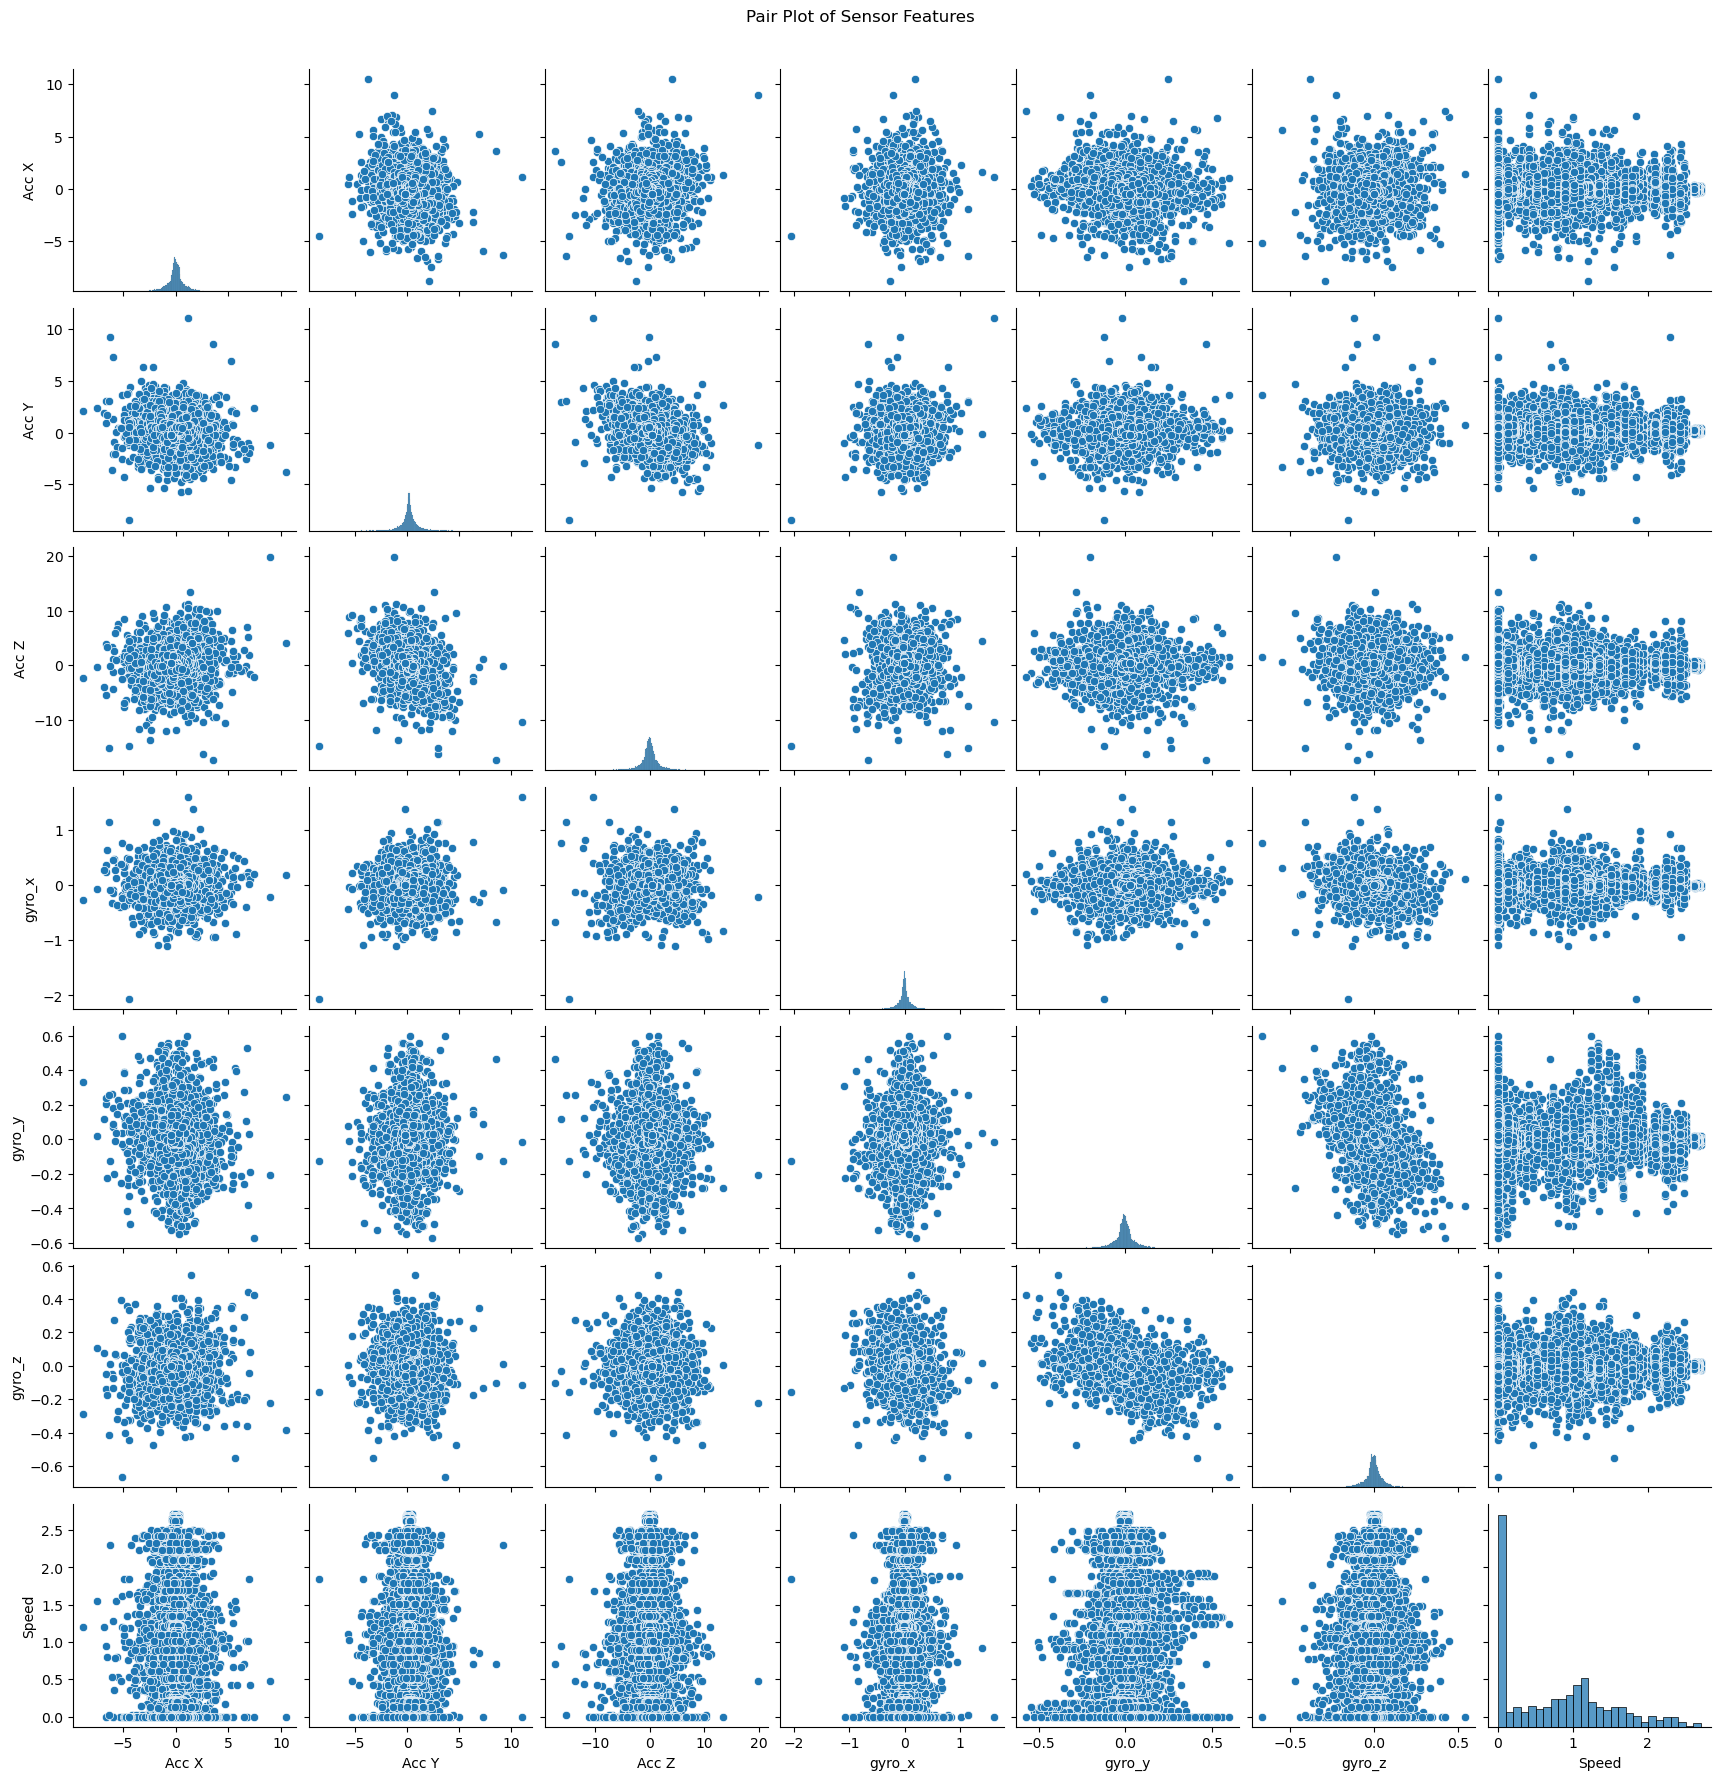

In [38]:
# Conduct Correlation Analysis

# Data Preparation - Handle missing values and standardize variables if necessary
print("Standardizing numeric variables...")
numeric_df = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Compute Correlations - Calculate pairwise correlation coefficients between all variables
print("Computing correlation matrix...")
corr_matrix = data_scaled.corr()

# Generate Scatter Plots for key variable pairs
#  Scatter Plot for Acc X vs Acc Y
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Acc X', y='Acc Y', data=data)
plt.title("Scatter Plot: Acc X vs Acc Y")
plt.xlabel('Acc X')
plt.ylabel('Acc Y')
plt.show()

# Scatter Plots for All Combinations of Features
# Create a pair plot for visualizing relationships between all pairs of features
pair_plot_columns = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z', 'Speed']
sns.pairplot(data[pair_plot_columns])
plt.suptitle('Pair Plot of Sensor Features', y=1.02)  # Adjust title position
plt.show()

**The first scatter plot shows the relationship between acceleration in the X and Y directions. The interpretation is as follows:**<br>
1. **Clustered Points Near Center**: Indicates low acceleration in both X and Y directions.<br>
2. **No Clear Linear Relationship**: Shows independence between movements in X and Y directions.<br>
3. **Spread of Points**: Reflects variability in crowd movements along both axes.<br>
4. **Outliers at Edges**: Suggest sudden movements or potential anomalies in the crowd behavior.

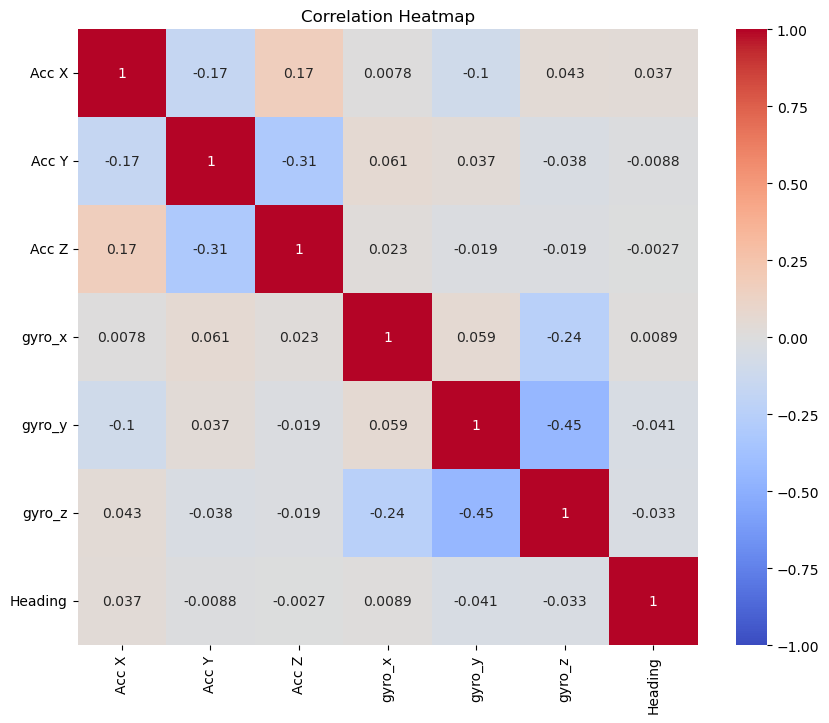

In [40]:
# Select specific columns to include in the correlation matrix
columns_of_interest = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z','Heading']
selected_df = data[columns_of_interest]

# Calculate the correlation matrix for the selected columns
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Rotate the labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.title('Correlation Heatmap')
plt.show()

**The correlation matrix provides insights into the relationships between different variables. Here's how to interpret it:**<br>

1. **Diagonal Values (1.0)**: Each variable is perfectly correlated with itself.<br>
2. **High Positive Correlation (Close to 1)**: Indicates a strong positive relationship between two variables (when one increases, the other tends to increase).<br>
3. **High Negative Correlation (Close to -1)**: Shows a strong negative relationship (when one increases, the other tends to decrease).<br>
4. **Near-Zero Correlation**: Suggests little to no linear relationship between the variables.<br>

In the context of sensor data, this could indicate how movement in one axis relates to others or if certain anomalies are linked.

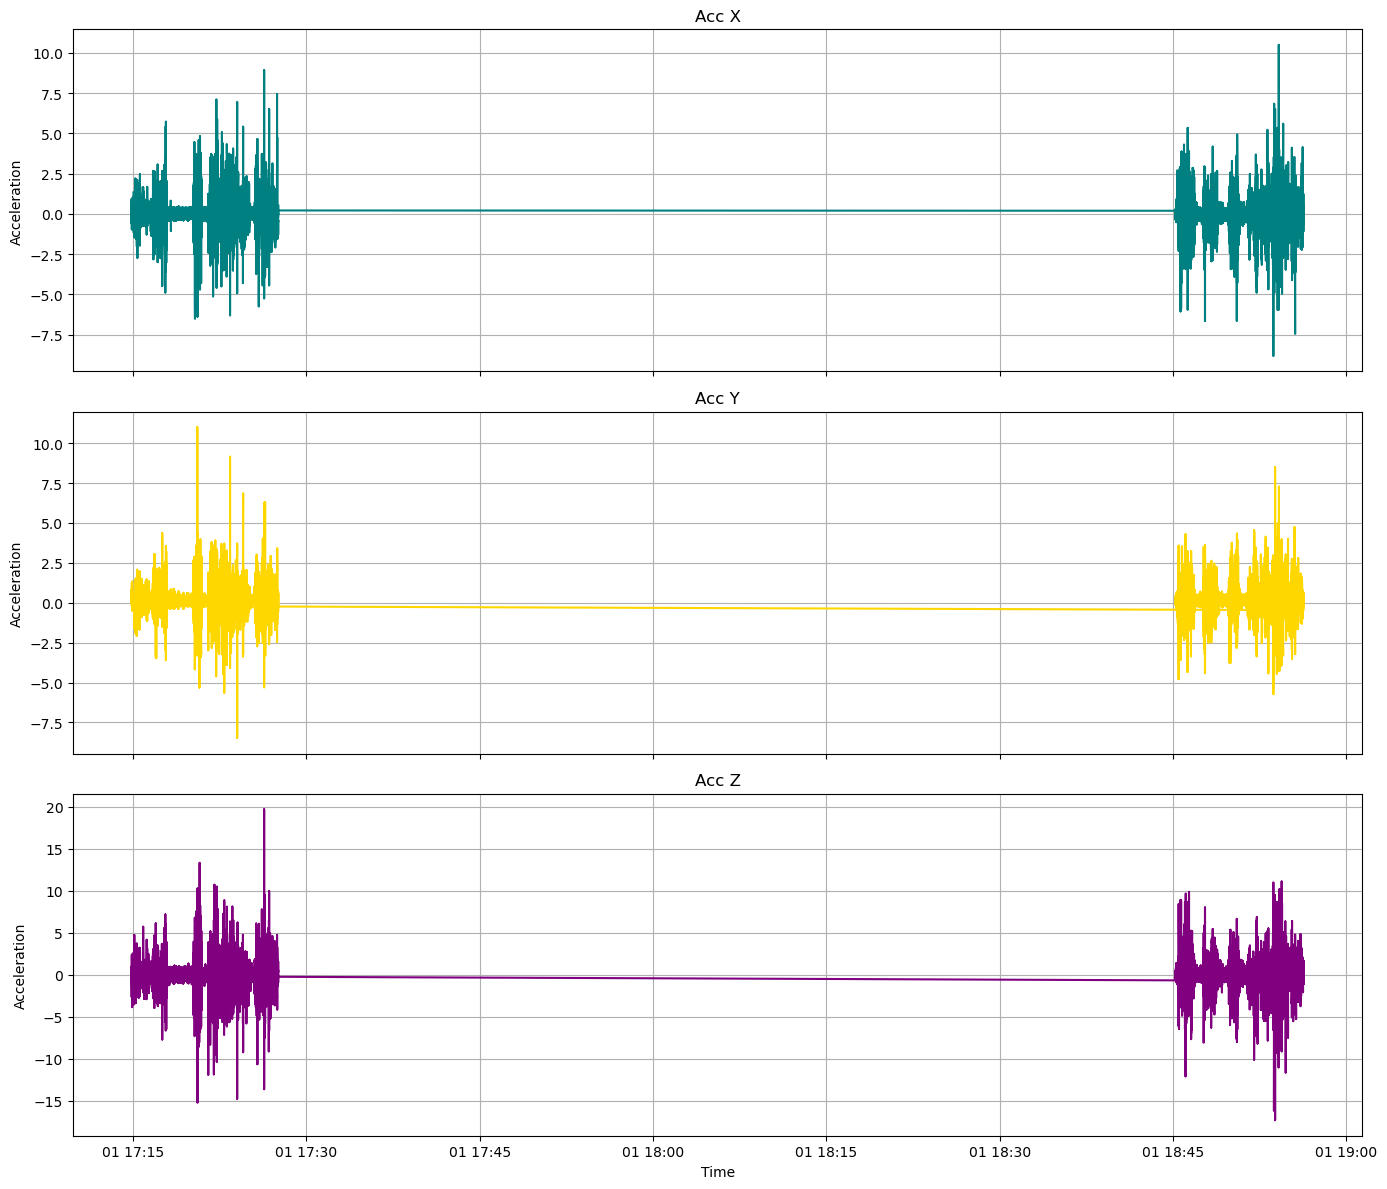

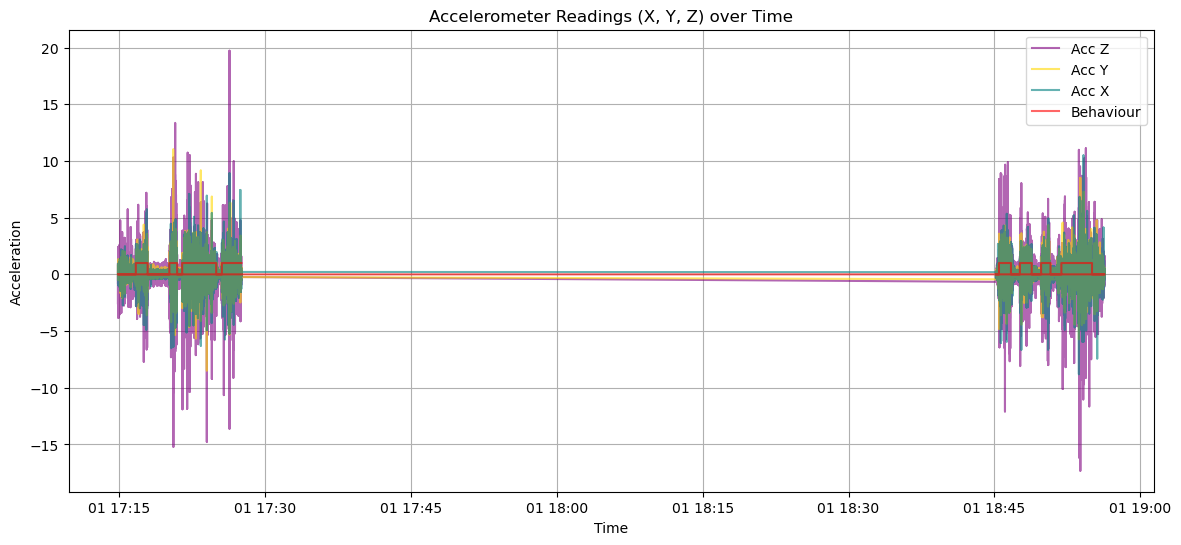

In [80]:
# Time-Series Visulaization 

# Individual Time-Series Graphs for Each Accelerometer Axes
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

axes[0].plot(data['Time'], data['Acc X'], label='Acc X', color='teal')
axes[0].set_title('Acc X')
axes[0].set_ylabel('Acceleration')
axes[0].grid(True)

axes[1].plot(data['Time'], data['Acc Y'], label='Acc Y', color='gold')
axes[1].set_title('Acc Y')
axes[1].set_ylabel('Acceleration')
axes[1].grid(True)

axes[2].plot(data['Time'], data['Acc Z'], label='Acc Z', color='purple')
axes[2].set_title('Acc Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Acceleration')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Combined Time-Series Graph for Accelerometer Axes
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['Acc Z'], label='Acc Z', color='purple', alpha=0.6)
plt.plot(data['Time'], data['Acc Y'], label='Acc Y', color='gold', alpha=0.6)
plt.plot(data['Time'], data['Acc X'], label='Acc X', color='teal', alpha=0.6)
plt.plot(data['Time'], data['label'], label='Behaviour', color='red', alpha=0.6)
plt.title('Accelerometer Readings (X, Y, Z) over Time')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.grid(True)
plt.legend()
plt.show()


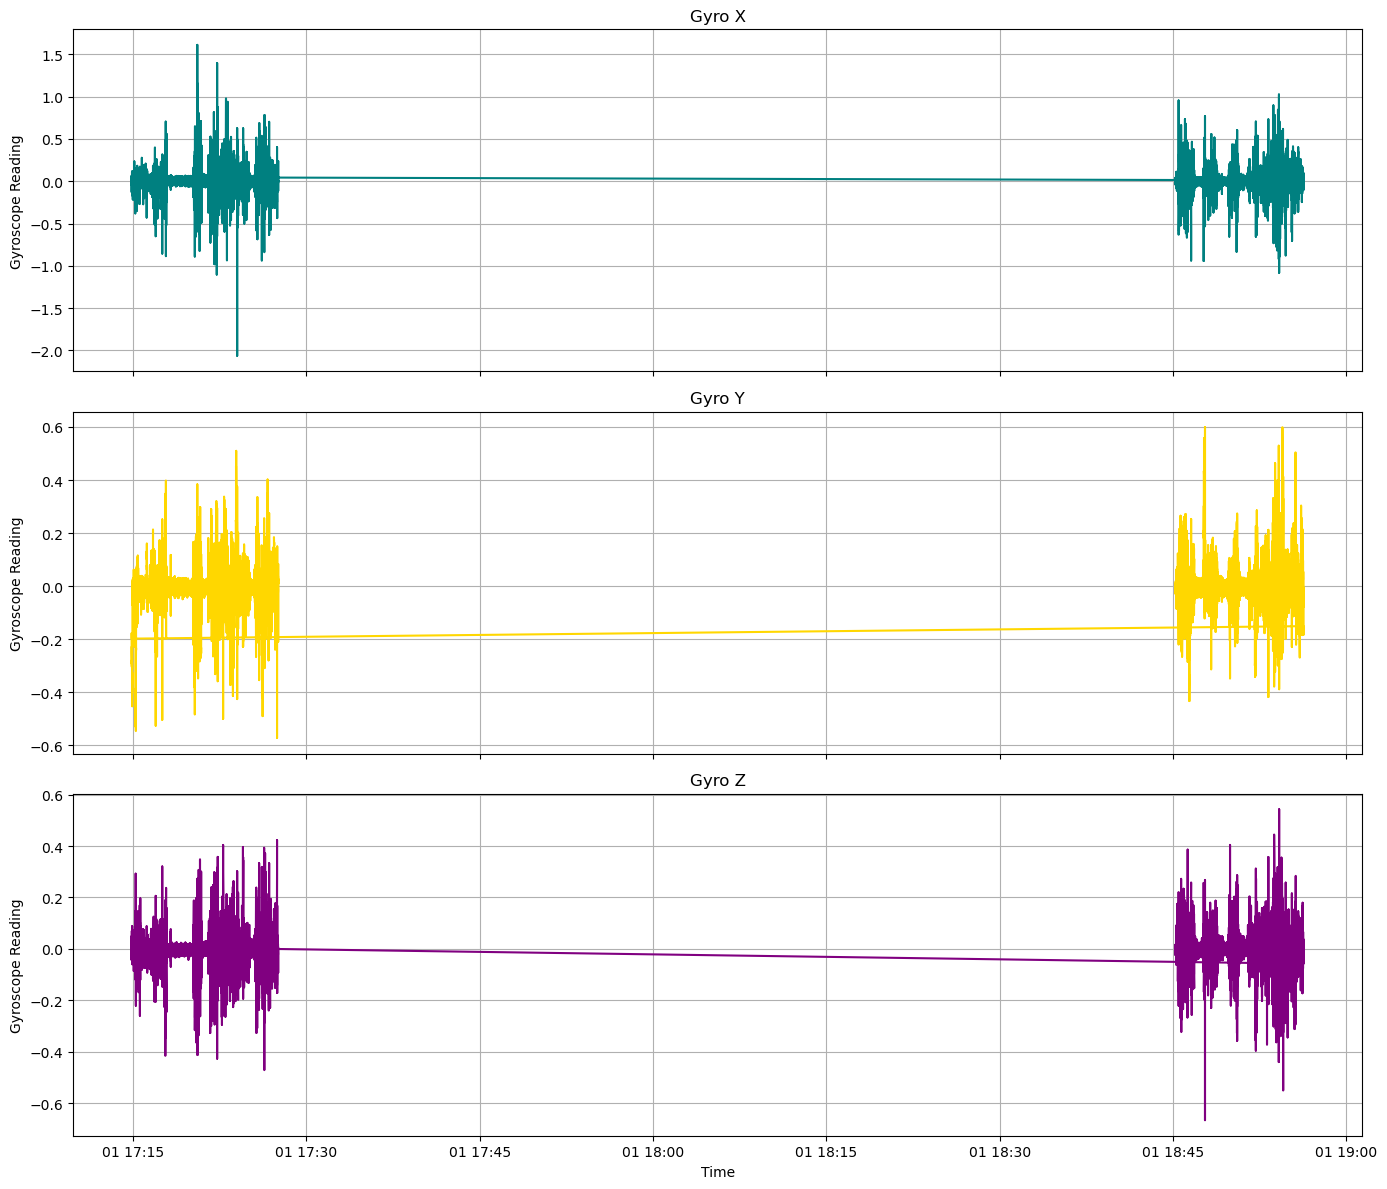

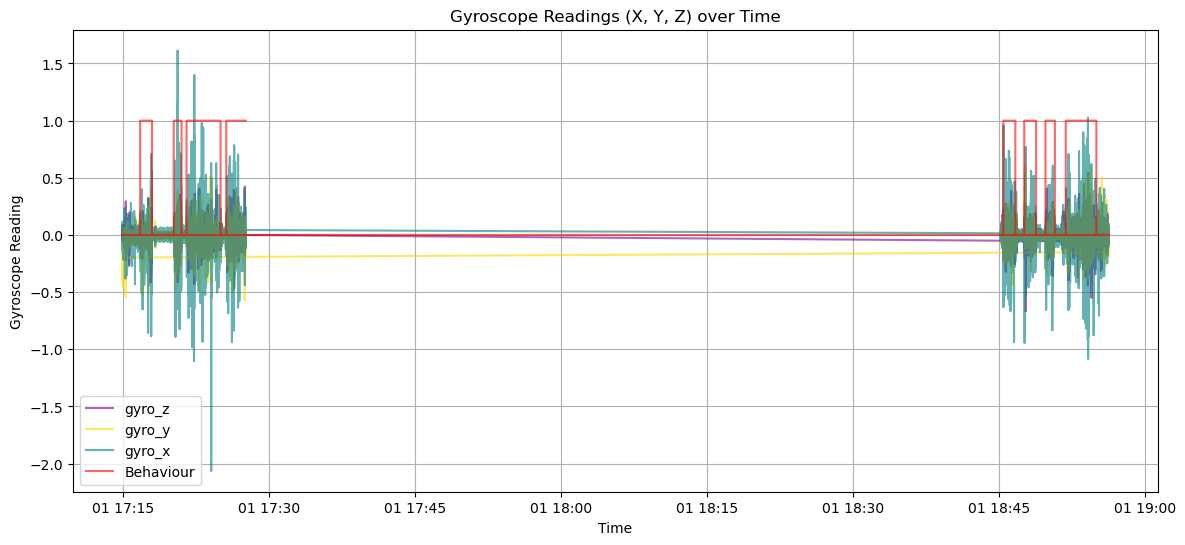

In [81]:
# Individual Time-Series Graphs for Each Gyroscope Axis
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

axes[0].plot(data['Time'], data['gyro_x'], label='gyro_x', color='teal')
axes[0].set_title('Gyro X')
axes[0].set_ylabel('Gyroscope Reading')
axes[0].grid(True)

axes[1].plot(data['Time'], data['gyro_y'], label='gyro_y', color='gold')
axes[1].set_title('Gyro Y')
axes[1].set_ylabel('Gyroscope Reading')
axes[1].grid(True)

axes[2].plot(data['Time'], data['gyro_z'], label='gyro_z', color='purple')
axes[2].set_title('Gyro Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Gyroscope Reading')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Combined Time-Series Graph for Gyroscope Axes
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['gyro_z'], label='gyro_z', color='purple', alpha=0.6)
plt.plot(data['Time'], data['gyro_y'], label='gyro_y', color='gold', alpha=0.6)
plt.plot(data['Time'], data['gyro_x'], label='gyro_x', color='teal', alpha=0.6)
plt.plot(data['Time'], data['label'], label='Behaviour', color='red', alpha=0.6)
plt.title('Gyroscope Readings (X, Y, Z) over Time')
plt.xlabel('Time')
plt.ylabel('Gyroscope Reading')
plt.grid(True)
plt.legend()
plt.show()

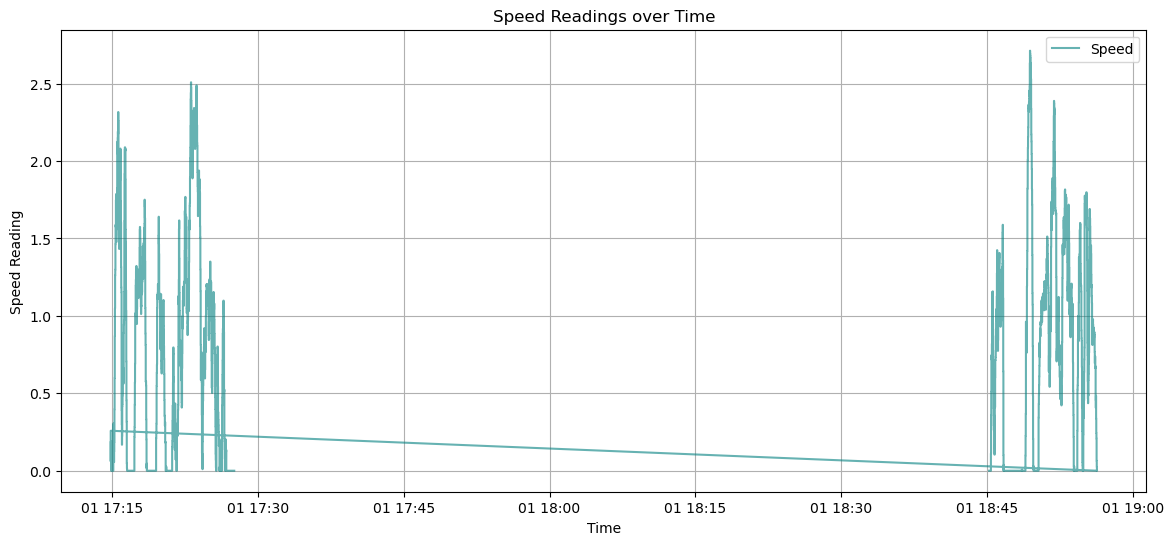

In [82]:
# Time-Series Graph for Speed Reading
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['Speed'], label='Speed', color='teal', alpha=0.6)
plt.title('Speed Readings over Time')
plt.xlabel('Time')
plt.ylabel('Speed Reading')
plt.grid(True)
plt.legend()
plt.show()

In [90]:
# Calculate the overall acceleration magnitude from the three axes (X, Y, Z)
data['Acc_Magnitude'] = np.sqrt(data['Acc X']**2 + data['Acc Y']**2 + data['Acc Z']**2)

#Calculate the change in acceleration over time to capture sudden movements
data['Acc_Change'] = data['Acc_Magnitude'].diff().fillna(0)

#Magnitude of Angular Velocity: Calculate the overall rotational velocity magnitude
data['Gyro_Magnitude'] = np.sqrt(data['gyro_x']**2 + data['gyro_y']**2 + data['gyro_z']**2)

#Change in Gyroscopic Movement: Calculate the change in rotational velocity over time
data['Gyro_Change'] = data['Gyro_Magnitude'].diff().fillna(0)

#Net Displacement: Calculate the net displacement from the change in longitude and latitude
data['Net_Displacement'] = np.sqrt((data['Longitude'].diff()**2) + (data['Latitude'].diff()**2)).fillna(0)

#Speed Change: Capture the change in speed over time to identify sudden accelerations or decelerations.
data['Speed_Change'] = data['Speed'].diff().fillna(0)

#Heading Change: Calculate the change in heading over time to identify changes in direction.
data['Heading_Change'] = data['Heading'].diff().fillna(0)

#Rolling Mean/Standard Deviation: Calculate rolling statistics to capture trends over a specified window (e.g., last 5 observations)
data['Rolling_Acc_Mean'] = data['Acc_Magnitude'].rolling(window=5).mean()
data['Rolling_Acc_STD'] = data['Acc_Magnitude'].rolling(window=5).std()

data['acc_mean'] = data[['Acc X', 'Acc Y', 'Acc Z']].mean(axis=1)
data['acc_std'] = data[['Acc X', 'Acc Y', 'Acc Z']].std(axis=1)
data['gyro_mean'] = data[['gyro_x', 'gyro_y', 'gyro_z']].mean(axis=1)
data['gyro_std'] = data[['gyro_x', 'gyro_y', 'gyro_z']].std(axis=1)


## Feature Engineering

1.**Magnitude of Acceleration**:<br>
        **Why Needed**: It combines all three acceleration components (X, Y, Z) into a single measure.<br>
    **How It Helps**: It provides a clearer view of the overall movement, helping to detect rapid changes or spikes that could indicate anomalies.<br>
2.**Change in Acceleration**:<br>
    **Why Needed**: Sudden changes in acceleration can indicate significant movements or unusual behavior.<br>
    **How It Helps**: This feature can help the model recognize moments of rapid movement or stop, which are often associated with anomalies.<br>
3.**Magnitude of Angular Velocity**:<br>
    **Why Needed**: It quantifies rotation, capturing the overall rotational motion of the device.<br>
    **How It Helps**: High values can signal unusual rotational behavior, helping to identify specific types of anomalies related to orientation.<br>
4.**Change in Gyroscopic Movement**:<br>
    **Why Needed**: Similar to acceleration, rapid changes in rotation may indicate a significant event.<br>
    **How It Helps**: This helps the model learn to detect abrupt changes in behavior, critical for identifying anomalies.<br>
5.**Net Displacement**:<br>
    **Why Needed**: It provides information about how far the device has moved, which is crucial for understanding crowd dynamics.<br>
    **How It Helps**: A sudden increase in displacement can signal an anomaly, such as a sudden rush or dispersal of the crowd.<br>
6.**Speed Change**:<br>
    **Why Needed**: Capturing acceleration or deceleration can help identify critical moments in crowd behavior.<br>
    **How It Helps**: Rapid changes in speed can indicate an impending crowd anomaly, allowing for proactive detection.<br>
7.**Heading Change**:<br>
    **Why Needed**: This measures shifts in direction, which can signify changes in crowd movement.<br>
    **How It Helps**: Understanding heading changes helps the model detect when a crowd starts to move in a different direction unexpectedly.<br>
8.**Rolling Mean/Standard Deviation**:<br>
    **Why Needed**: These statistics provide context by smoothing out fluctuations and capturing trends over time.<br>
    **How It Helps**: It helps the model discern between normal variability and true anomalies by establishing a baseline behavior.<br>

In [91]:
data.describe().T

count                           mean                  min  \
Longitude         14246.0                      73.826564            73.821195   
Latitude          14246.0                      18.508567            18.501504   
Speed             14246.0                       0.771898                  0.0   
Distance          14246.0                    2795.222874                  0.0   
Time                14246  1900-01-01 18:02:59.600940544  1900-01-01 17:14:53   
Acc X             14246.0                      -0.001137            -8.805807   
Acc Y             14246.0                       0.180237            -8.476646   
Acc Z             14246.0                      -0.023576           -17.320633   
Heading           14246.0                     171.269128                  0.0   
gyro_x            14246.0                      -0.001319            -2.062668   
gyro_y            14246.0                      -0.006521            -0.571912   
gyro_z            14246.0                        -0.0032            -0.666047   
label             14246.0                       0.592587                  0.0   
Acc_Magnitude     14246.0                       1.607835             0.018581   
Acc_Change        14246.0                       0.000022           -16.179881   
Gyro_Magnitude    14246.0                       0.126696              0.00146   
Gyro_Change       14246.0                      -0.000001            -1.387471   
Net_Displacement  14246.0                       0.000004                  0.0   
Speed_Change      14246.0                            0.0                -0.76   
Heading_Change    14246.0                      -0.023937               -359.0   
Rolling_Acc_Mean  14242.0                       1.608131             0.144979   
Rolling_Acc_STD   14242.0                       0.743032             0.015304   
acc_mean          14246.0                       0.051841            -9.247761   
acc_std           14246.0                       0.926517             0.007141   
gyro_mean         14246.0                       -0.00368            -0.780774   
gyro_std          14246.0                       0.077019             0.000224   

                                  25%                  50%  \
Longitude                   73.822785            73.828663   
Latitude                    18.504085             18.50786   
Speed                             0.0                 0.76   
Distance                   448.081505            1007.3687   
Time              1900-01-01 17:20:50  1900-01-01 17:26:47   
Acc X                        -0.37882            -0.013089   
Acc Y                        -0.12669             0.167227   
Acc Z                       -0.701545            -0.025761   
Heading                          77.0                150.0   
gyro_x                       -0.04669            -0.002219   
gyro_y                      -0.033272            -0.005783   
gyro_z                      -0.027224            -0.002179   
label                             0.0                  1.0   
Acc_Magnitude                0.609765             1.118237   
Acc_Change                  -0.480551            -0.013467   
Gyro_Magnitude               0.040204             0.084782   
Gyro_Change                 -0.031879            -0.000116   
Net_Displacement                  0.0                  0.0   
Speed_Change                      0.0                  0.0   
Heading_Change                    0.0                  0.0   
Rolling_Acc_Mean             0.667598             1.284077   
Rolling_Acc_STD              0.269293             0.527778   
acc_mean                    -0.226714             0.049606   
acc_std                      0.324081             0.622861   
gyro_mean                   -0.020247            -0.003754   
gyro_std                     0.023565             0.049857   

                                  75%                  max            std  
Longitude                   73.829445            73.831393       0.003661  
Latit

In [92]:
# Check for missing values in the data
print(data.isnull().sum())

Longitude           0
Latitude            0
Speed               0
Distance            0
Time                0
Acc X               0
Acc Y               0
Acc Z               0
Heading             0
gyro_x              0
gyro_y              0
gyro_z              0
label               0
Acc_Magnitude       0
Acc_Change          0
Gyro_Magnitude      0
Gyro_Change         0
Net_Displacement    0
Speed_Change        0
Heading_Change      0
Rolling_Acc_Mean    4
Rolling_Acc_STD     4
acc_mean            0
acc_std             0
gyro_mean           0
gyro_std            0
dtype: int64


In [93]:
# Filling missing values with the median of the respective columns
data['Rolling_Acc_Mean'].fillna(data['Rolling_Acc_Mean'].median(), inplace=True)
data['Rolling_Acc_STD'].fillna(data['Rolling_Acc_STD'].median(), inplace=True)

In [94]:
# Check for missing values in the data
print(data.isnull().sum())

Longitude           0
Latitude            0
Speed               0
Distance            0
Time                0
Acc X               0
Acc Y               0
Acc Z               0
Heading             0
gyro_x              0
gyro_y              0
gyro_z              0
label               0
Acc_Magnitude       0
Acc_Change          0
Gyro_Magnitude      0
Gyro_Change         0
Net_Displacement    0
Speed_Change        0
Heading_Change      0
Rolling_Acc_Mean    0
Rolling_Acc_STD     0
acc_mean            0
acc_std             0
gyro_mean           0
gyro_std            0
dtype: int64


In [95]:
# Saving as CSV
data.to_csv('Featured_dataset.csv', index=False)
print("Dataset saved successfully.")

Dataset saved successfully.


## Importing the Python Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

## Load the Dataset

In [49]:
data = pd.read_csv('Featured_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14246 non-null  float64
 1   Latitude          14246 non-null  float64
 2   Speed             14246 non-null  float64
 3   Distance          14246 non-null  float64
 4   Time              14246 non-null  object 
 5   Acc X             14246 non-null  float64
 6   Acc Y             14246 non-null  float64
 7   Acc Z             14246 non-null  float64
 8   Heading           14246 non-null  int64  
 9   gyro_x            14246 non-null  float64
 10  gyro_y            14246 non-null  float64
 11  gyro_z            14246 non-null  float64
 12  label             14246 non-null  int64  
 13  Acc_Magnitude     14246 non-null  float64
 14  Acc_Change        14246 non-null  float64
 15  Gyro_Magnitude    14246 non-null  float64
 16  Gyro_Change       14246 non-null  float6

In [52]:
data.describe().T

count          mean            std         min  \
Longitude         14246.0  7.382656e+01       0.003661   73.821195   
Latitude          14246.0  1.850857e+01       0.005242   18.501504   
Speed             14246.0  7.718982e-01       0.705439    0.000000   
Distance          14246.0  2.795223e+03  120598.784322    0.000000   
Acc X             14246.0 -1.136666e-03       1.030982   -8.805807   
Acc Y             14246.0  1.802373e-01       0.837260   -8.476646   
Acc Z             14246.0 -2.357613e-02       1.768811  -17.320633   
Heading           14246.0  1.712691e+02     105.496919    0.000000   
gyro_x            14246.0 -1.318720e-03       0.141039   -2.062668   
gyro_y            14246.0 -6.521074e-03       0.087850   -0.571912   
gyro_z            14246.0 -3.200064e-03       0.068017   -0.666047   
label             14246.0  5.925874e-01       0.491370    0.000000   
Acc_Magnitude     14246.0  1.607835e+00       1.529821    0.018581   
Acc_Change        14246.0  2.191194e-05       1.355076  -16.179881   
Gyro_Magnitude    14246.0  1.266961e-01       0.127425    0.001460   
Gyro_Change       14246.0 -1.334293e-06       0.104109   -1.387471   
Net_Displacement  14246.0  3.816505e-06       0.000016    0.000000   
Speed_Change      14246.0 -9.351872e-20       0.035884   -0.760000   
Heading_Change    14246.0 -2.393654e-02      17.575867 -359.000000   
Rolling_Acc_Mean  14246.0  1.608040e+00       1.227237    0.144979   
Rolling_Acc_STD   14246.0  7.429716e-01       0.700332    0.015304   
acc_mean          14246.0  5.184149e-02       0.691140   -9.247761   
acc_std           14246.0  9.265166e-01       0.940104    0.007141   
gyro_mean         14246.0 -3.679953e-03       0.051239   -0.780774   
gyro_std          14246.0  7.701864e-02       0.079085    0.000224   

                         25%          50%          75%           max  
Longitude          73.822785    73.828663    73.829445  7.383139e+01  
Latitude           18.504085    18.507860    18.513463  1.851871e+01  
Speed               0.000000     0.760000     1.220000  2.712000e+00  
Distance          448.081505  1007.368700  1645.653275  8.312031e+06  
Acc X              -0.378820    -0.013089     0.362683  1.048863e+01  
Acc Y              -0.126690     0.167227     0.478868  1.101326e+01  
Acc Z              -0.701545    -0.025761     0.674922  1.972580e+01  
Heading            77.000000   150.000000   249.000000  3.590000e+02  
gyro_x             -0.046690    -0.002219     0.044939  1.611687e+00  
gyro_y             -0.033272    -0.005783     0.021706  5.995846e-01  
gyro_z             -0.027224    -0.002179     0.024088  5.428556e-01  
label               0.000000     1.000000     1.000000  1.000000e+00  
Acc_Magnitude       0.609765     1.118237     2.065718  2.168270e+01  
Acc_Change         -0.480551    -0.013467     0.473513  1.631348e+01  
Gyro_Magnitude      0.040204     0.084782     0.168847  2.072244e+00  
Gyro_Change        -0.031879    -0.000116     0.030804  1.626290e+00  
Net_Displacement    0.000000     0.000000     0.000000  2.308554e-04  
Speed_Change        0.000000     0.000000     0.000000  9.280000e-01  
Heading_Change      0.000000     0.000000     0.000000  3.590000e+02  
Rolling_Acc_Mean    0.667844     1.284077     2.093364  1.251359e+01  
Rolling_Acc_STD     0.269350     0.527778     0.951488  7.277411e+00  
acc_mean           -0.226714     0.049606     0.320148  9.133835e+00  
acc_std             0.324081     0.622861     1.195859  1.371142e+01  
gyro_mean          -0.020247    -0.003754     0.014410  4.926764e-01  
gyro_std            0.023565     0.049857     0.104188  1.110263e+00

## Using IQR methods for finding outlier

Acc X:
Lower bound: -1.49107379375, Upper bound: 1.4749369162500001
Number of outliers: 1670
---
Acc Y:
Lower bound: -1.0350277387500002, Upper bound: 1.3872058312500002
Number of outliers: 1632
---
Acc Z:
Lower bound: -2.7662448150000003, Upper bound: 2.7396224250000003
Number of outliers: 1332
---
Heading:
Lower bound: -181.0, Upper bound: 507.0
Number of outliers: 0
---
gyro_x:
Lower bound: -0.18413514999999997, Upper bound: 0.182384002
Number of outliers: 1804
---
gyro_y:
Lower bound: -0.11573859949999998, Upper bound: 0.1041728845
Number of outliers: 1823
---
Gyro_Change:
Lower bound: -0.12590321832996487, Upper bound: 0.12482794114549185
Number of outliers: 1833
---
Net_Displacement:
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 1045
---
Speed_Change:
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 1022
---
Heading_Change:
Lower bound: 0.0, Upper bound: 0.0
Number of outliers: 6015
---
Rolling_Acc_Mean:
Lower bound: -1.4704366086614886, Upper bound: 4.231645083697

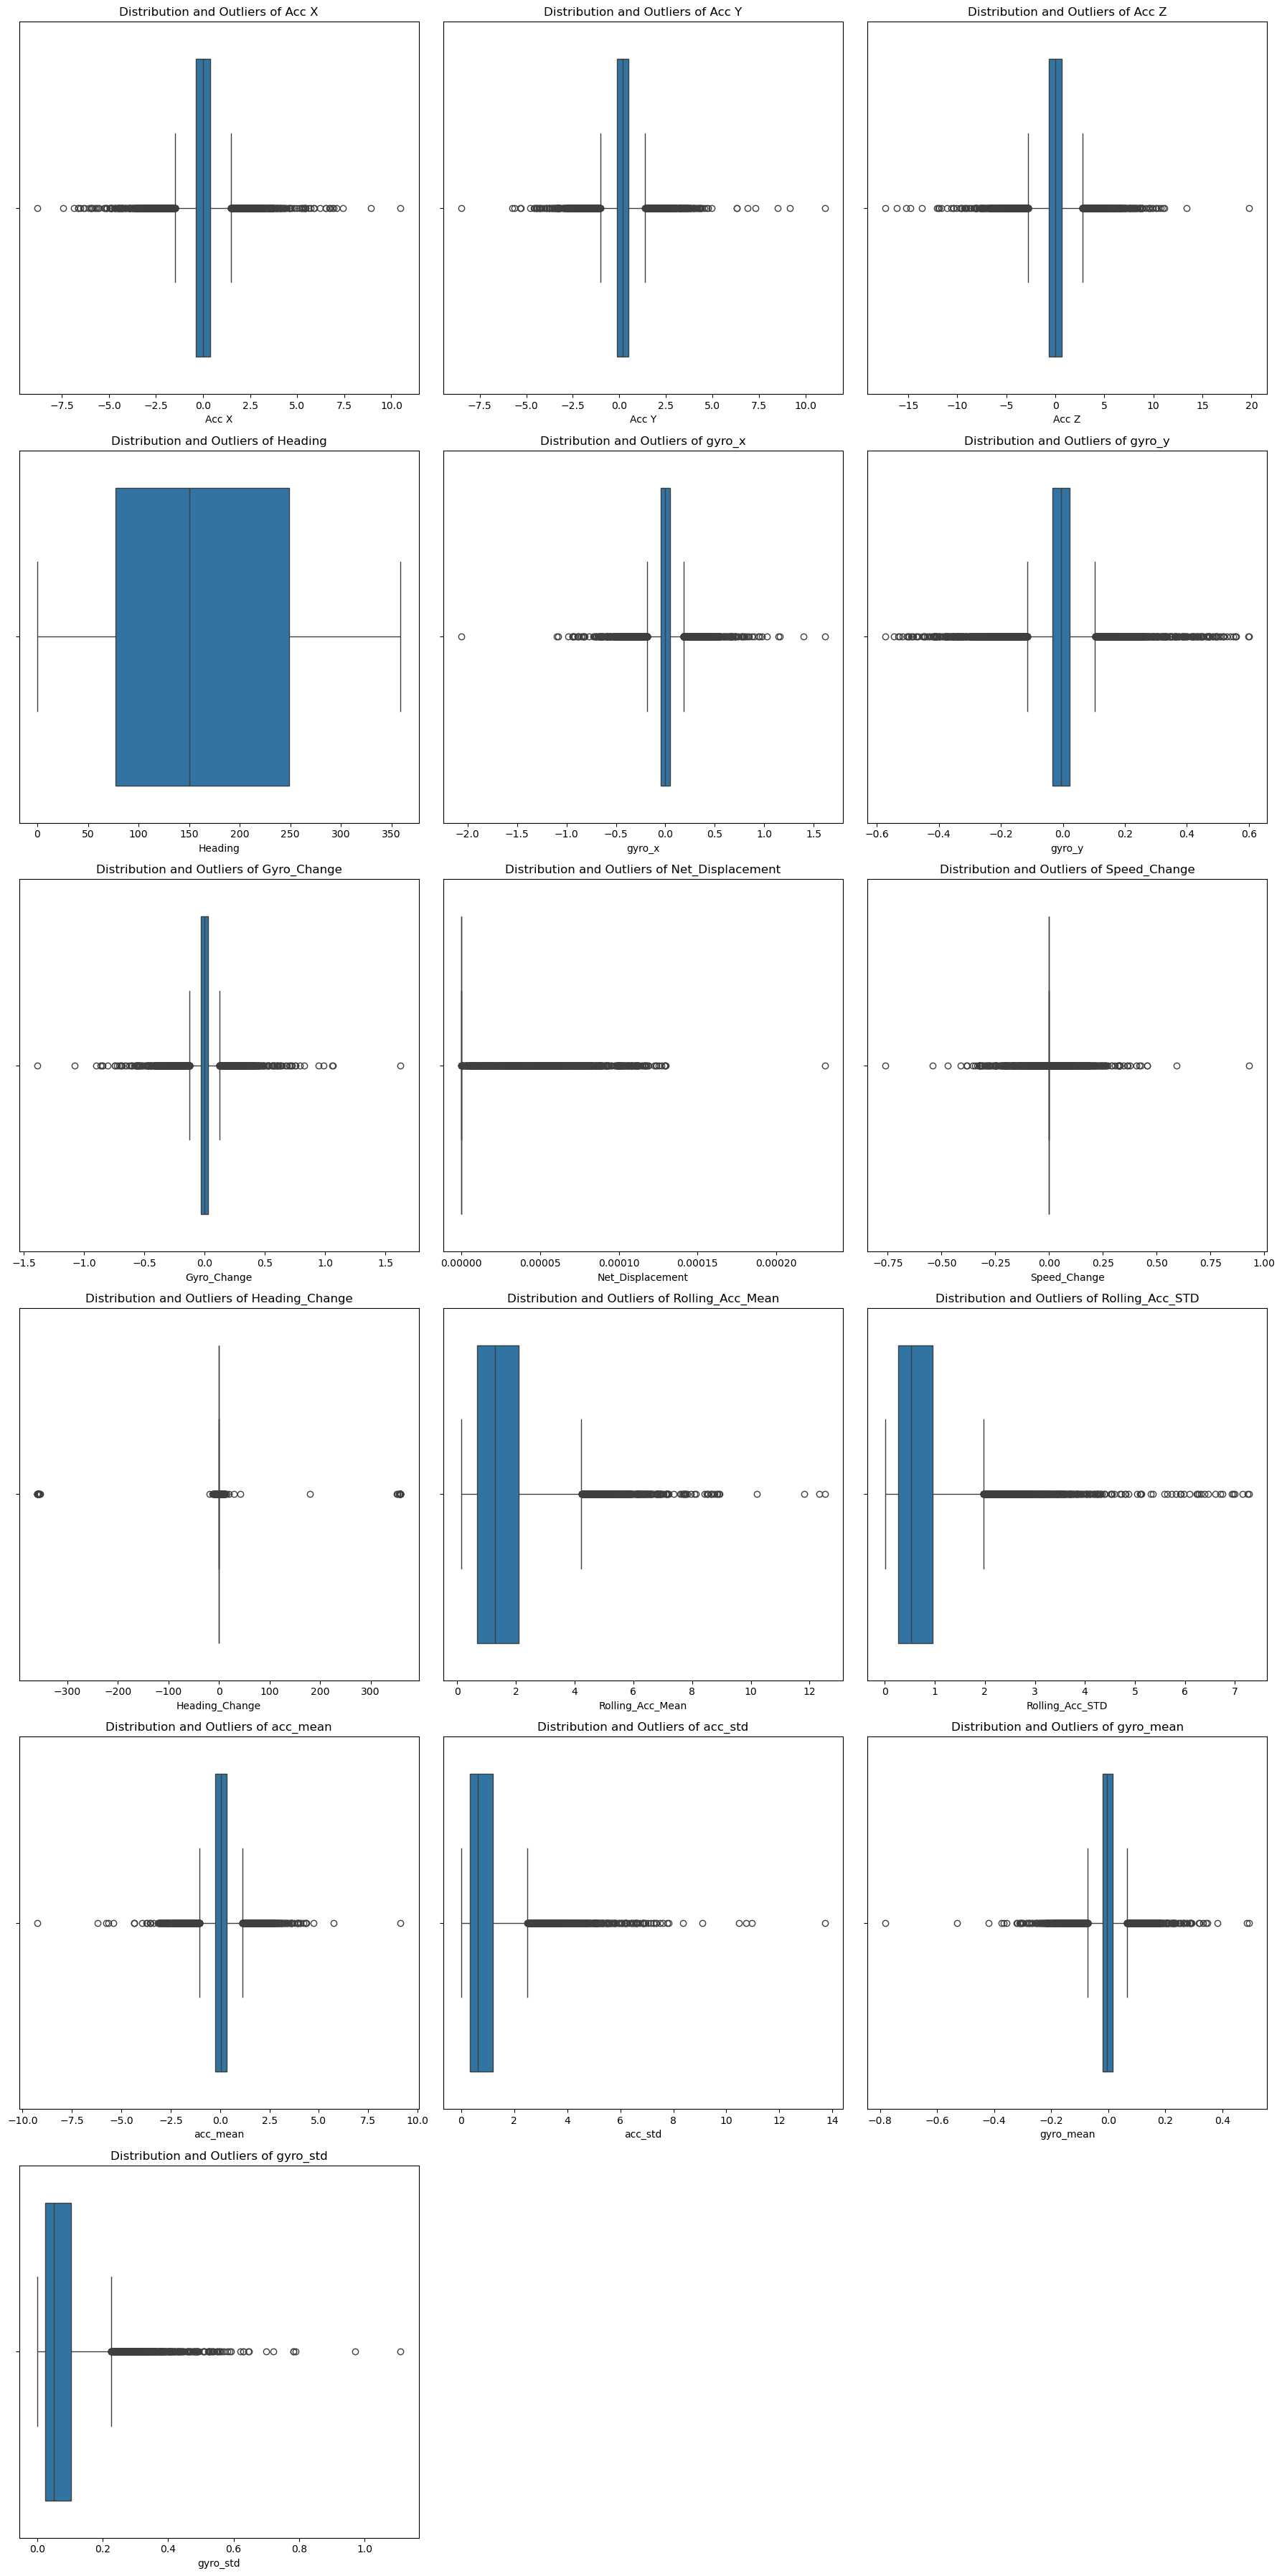

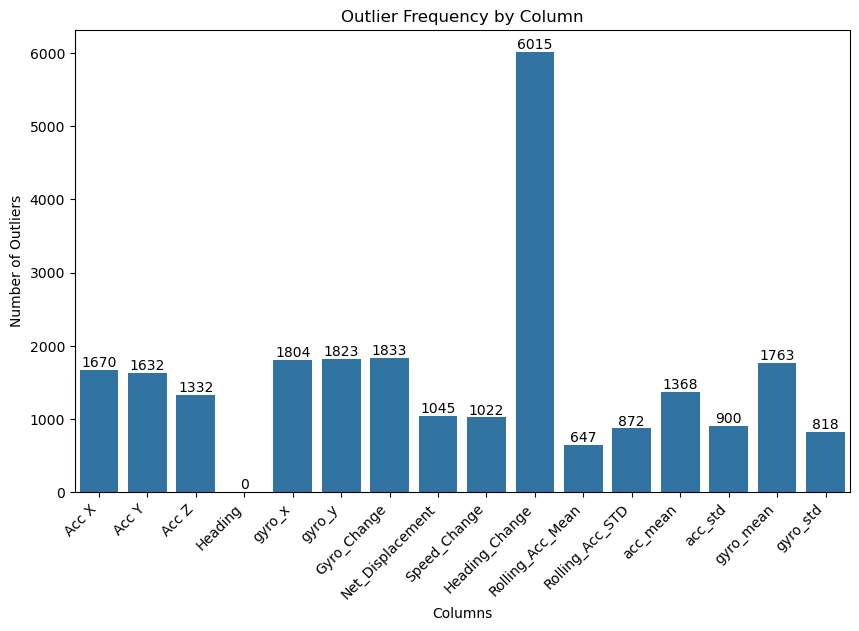

In [25]:
# Define a function to calculate IQR and identify outliers
def calculate_iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply the function to each numeric column
outliers_dict = defaultdict(list)
outlier_counts = {}

for col in ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
            'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']:
    outliers, lower_bound, upper_bound = calculate_iqr_outliers(data, col)
    outliers_dict[col] = outliers
    outlier_counts[col] = len(outliers)
    print(f'{col}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of outliers: {len(outliers)}')
    print('---')

# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Distribution and Outliers of {col}')

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
            'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']
plot_distribution_with_outliers(data, columns)

# Plotting the outlier frequency chart
def plot_outlier_frequency(outlier_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
    plt.title('Outlier Frequency by Column')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Outliers')
    
    # Adding text labels on top of each bar
    for i, count in enumerate(outlier_counts.values()):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
    plt.show()

plot_outlier_frequency(outlier_counts)
iqr_outlier = outlier_counts

## Using Z-Score for outliers detection

Acc X:
Mean: -0.0011366664637793085, Standard Deviation: 1.0309816764314736
Number of outliers: 274
---
Acc Y:
Mean: 0.18023726479671487, Standard Deviation: 0.8372602501422597
Number of outliers: 280
---
Acc Z:
Mean: -0.02357612855987646, Standard Deviation: 1.7688114642038109
Number of outliers: 293
---
Heading:
Mean: 171.26912817633018, Standard Deviation: 105.49691944039361
Number of outliers: 0
---
gyro_x:
Mean: -0.0013187204695353084, Standard Deviation: 0.14103872710719484
Number of outliers: 275
---
gyro_y:
Mean: -0.006521073514390004, Standard Deviation: 0.08784976524291623
Number of outliers: 357
---
Gyro_Change:
Mean: -1.3342931792891394e-06, Standard Deviation: 0.10410917182094091
Number of outliers: 295
---
Net_Displacement:
Mean: 3.816505288201474e-06, Standard Deviation: 1.570361489235633e-05
Number of outliers: 527
---
Speed_Change:
Mean: -9.351871609926912e-20, Standard Deviation: 0.035883732158331474
Number of outliers: 346
---
Heading_Change:
Mean: -0.023936543591183

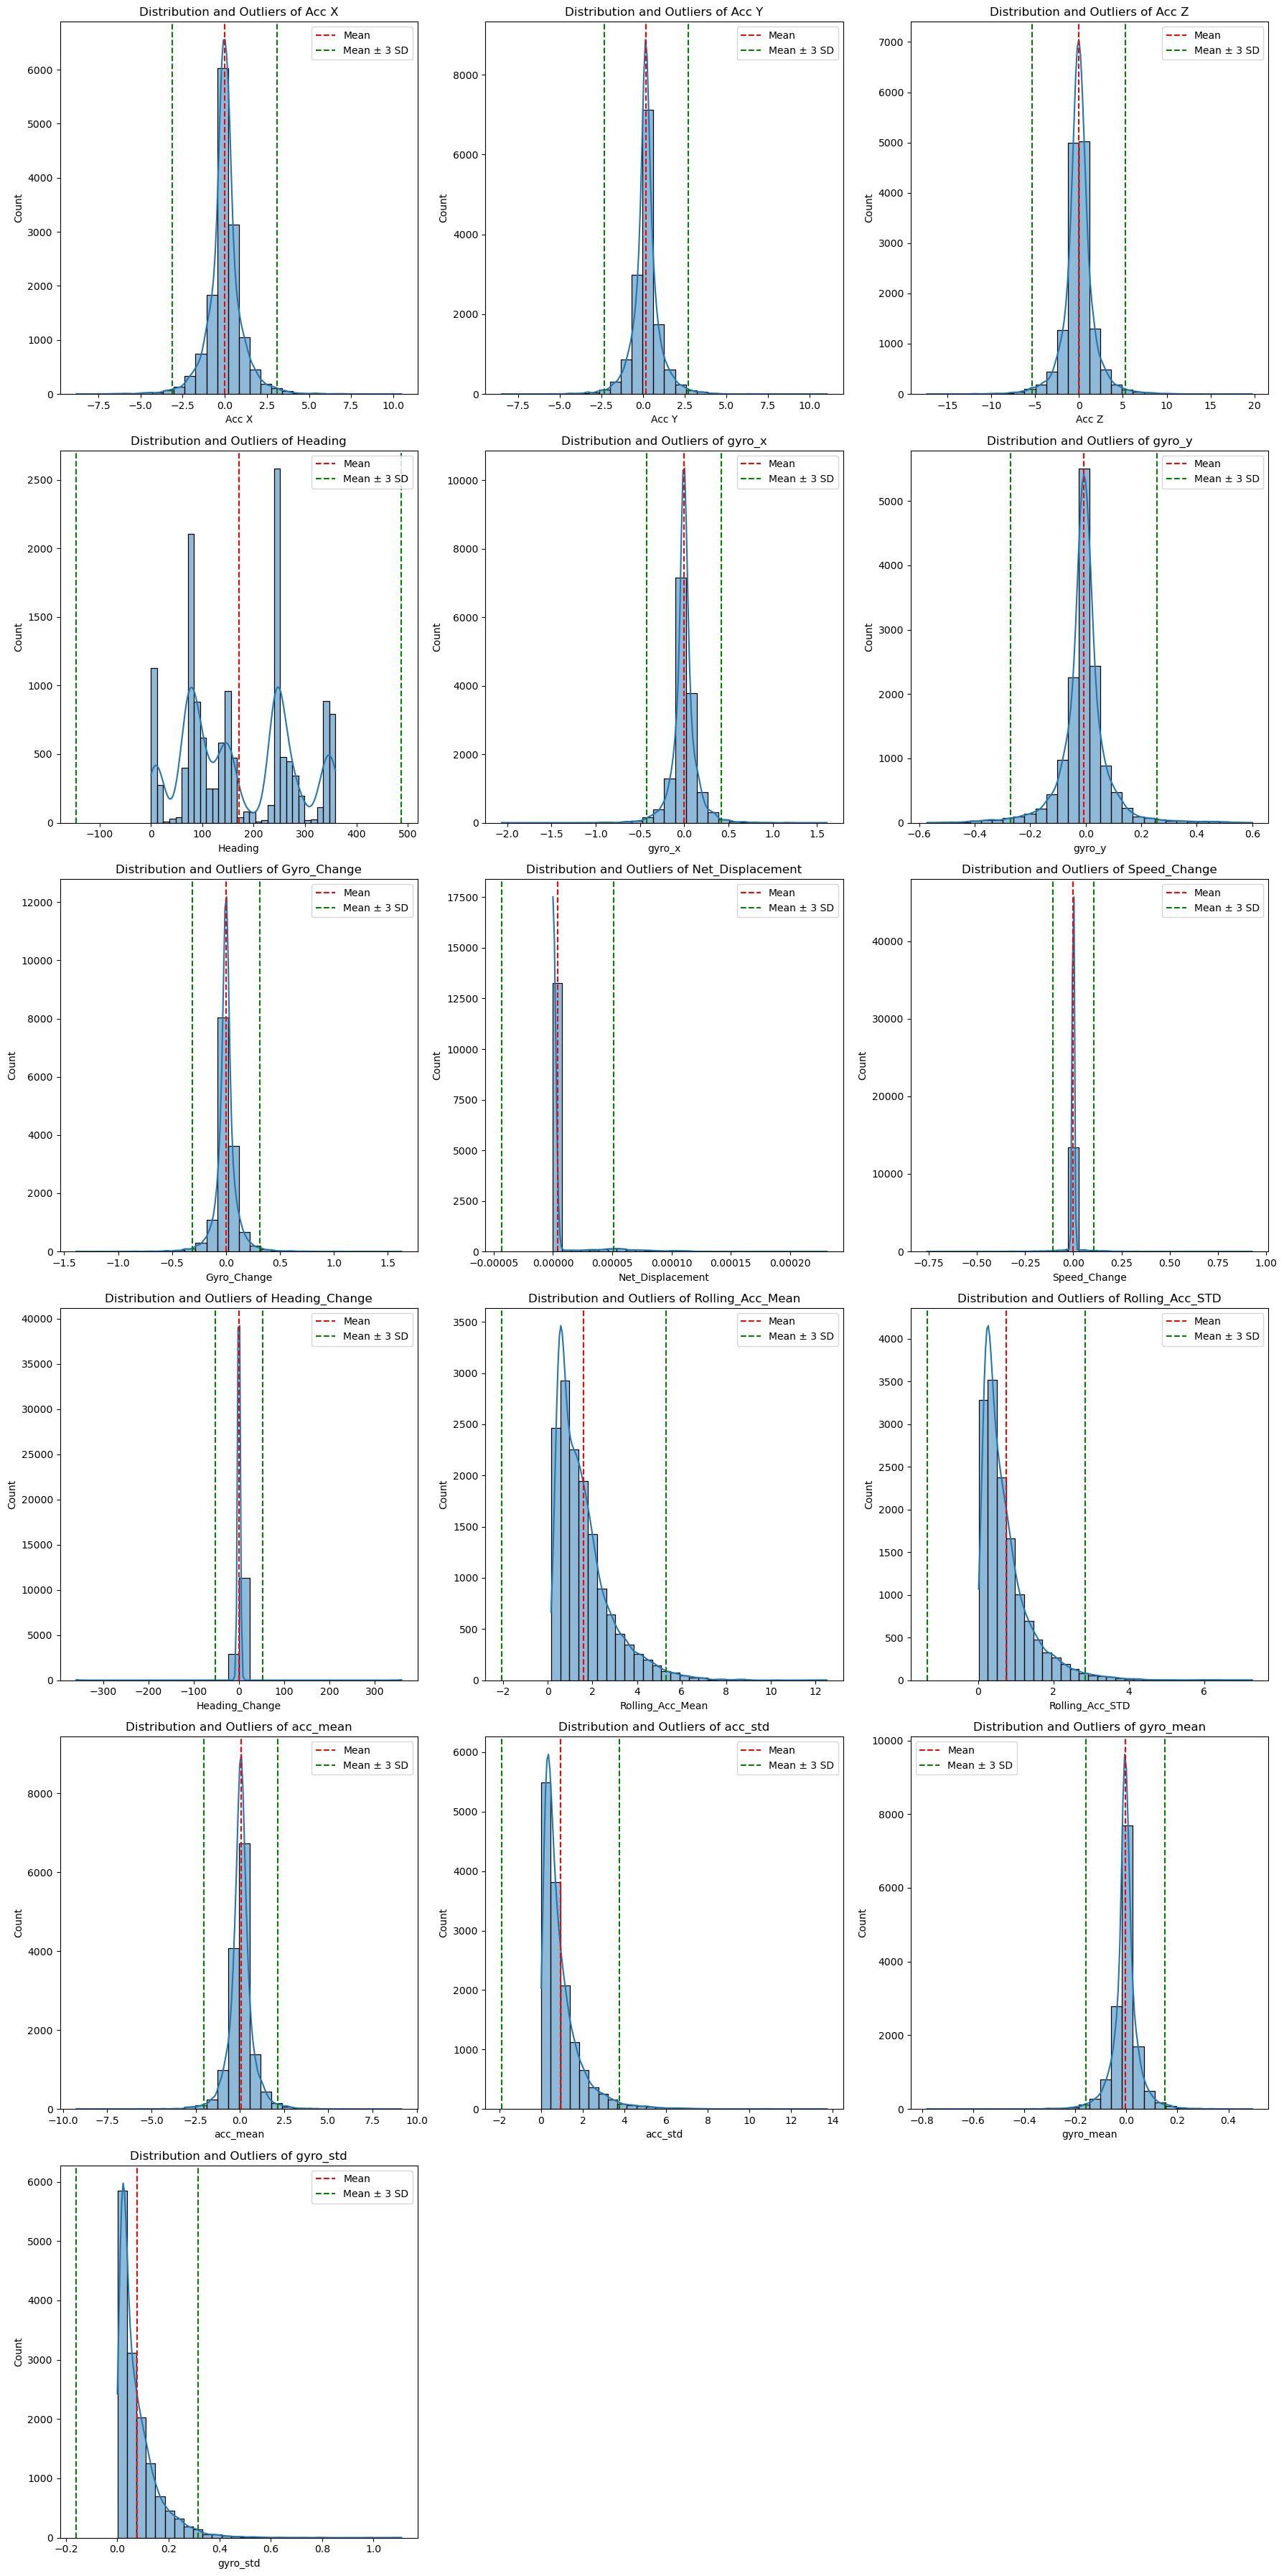

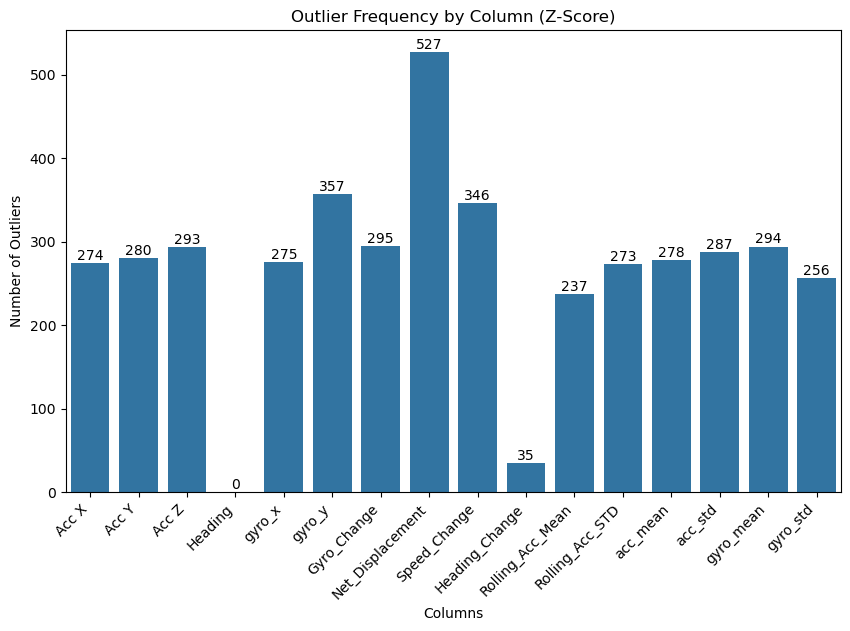

In [16]:
# Define a function to calculate Z-score and identify outliers
def calculate_zscore_outliers(data, column):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[(z_scores < -3) | (z_scores > 3)]
    return outliers, mean, std

# Apply the function to each numeric column
outliers_dict = defaultdict(list)
outlier_counts = {}

for col in ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
            'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']:
    outliers, mean, std = calculate_zscore_outliers(data, col)
    outliers_dict[col] = outliers
    outlier_counts[col] = len(outliers)
    print(f'{col}:')
    print(f'Mean: {mean}, Standard Deviation: {std}')
    print(f'Number of outliers: {len(outliers)}')
    print('---')

# Plotting the distribution and outliers in subplots
def plot_distribution_with_outliers(data, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Create rows as per requirement, 3 columns per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(data[col], bins=30, kde=True, ax=axes[i])
        axes[i].axvline(data[col].mean(), color='r', linestyle='--', label='Mean')
        axes[i].axvline(data[col].mean() + 3 * data[col].std(), color='g', linestyle='--', label='Mean ± 3 SD')
        axes[i].axvline(data[col].mean() - 3 * data[col].std(), color='g', linestyle='--')
        axes[i].set_title(f'Distribution and Outliers of {col}')
        axes[i].legend()

    for j in range(i + 1, len(axes)):  # Hide any unused subplots
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Columns to be plotted
columns = ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
            'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']
plot_distribution_with_outliers(data, columns)

# Plotting the outlier frequency chart
def plot_outlier_frequency(outlier_counts):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()))
    plt.title('Outlier Frequency by Column (Z-Score)')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Outliers')
       
    # Adding text labels on top of each bar
    for i, count in enumerate(outlier_counts.values()):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
        
    plt.show()

plot_outlier_frequency(outlier_counts)

z_score_outlier = outlier_counts

In [18]:
z_score_outlier

{'Acc X': 274,
 'Acc Y': 280,
 'Acc Z': 293,
 'Heading': 0,
 'gyro_x': 275,
 'gyro_y': 357,
 'Gyro_Change': 295,
 'Net_Displacement': 527,
 'Speed_Change': 346,
 'Heading_Change': 35,
 'Rolling_Acc_Mean': 237,
 'Rolling_Acc_STD': 273,
 'acc_mean': 278,
 'acc_std': 287,
 'gyro_mean': 294,
 'gyro_std': 256}

In [26]:
iqr_outlier

{'Acc X': 1670,
 'Acc Y': 1632,
 'Acc Z': 1332,
 'Heading': 0,
 'gyro_x': 1804,
 'gyro_y': 1823,
 'Gyro_Change': 1833,
 'Net_Displacement': 1045,
 'Speed_Change': 1022,
 'Heading_Change': 6015,
 'Rolling_Acc_Mean': 647,
 'Rolling_Acc_STD': 872,
 'acc_mean': 1368,
 'acc_std': 900,
 'gyro_mean': 1763,
 'gyro_std': 818}

## Combined Bar Plot Comparison of Outlier Counts by Column

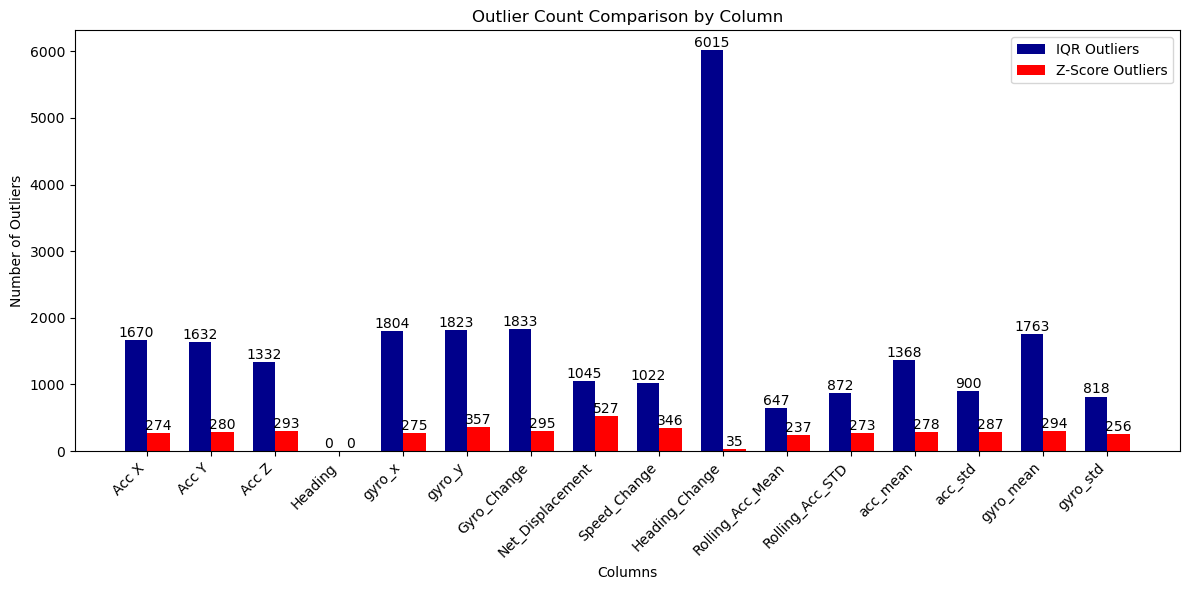

In [33]:
# Combined bar plot comparison with updated colors for outlier counts by column
def plot_outlier_comparison(iqr_outlier_counts, zscore_outlier_counts):
    columns = list(iqr_outlier_counts.keys())
    iqr_counts = list(iqr_outlier_counts.values())
    zscore_counts = list(zscore_outlier_counts.values())
    
    # Create a grouped bar plot for comparison with updated colors
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    indices = range(len(columns))
    
    # IQR bars with dark blue color
    plt.bar(indices, iqr_counts, width=bar_width, color='darkblue', label='IQR Outliers')
    
    # Z-score bars with bright red color
    plt.bar([i + bar_width for i in indices], zscore_counts, width=bar_width, color='red', label='Z-Score Outliers')
    
    # Labels and aesthetics
    plt.title('Outlier Count Comparison by Column')
    plt.xlabel('Columns')
    plt.xticks([i + bar_width / 2 for i in indices], columns, rotation=45, ha='right')
    plt.ylabel('Number of Outliers')
    plt.legend()
    
    # Show counts above each bar
    for i, count in enumerate(iqr_counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', color='black')
    for i, count in enumerate(zscore_counts):
        plt.text(i + bar_width, count + 0.5, str(count), ha='center', va='bottom', color='black')
    
    plt.tight_layout()
    plt.show()

# Prepare outlier counts
iqr_outlier_counts = {}  # Dictionary of IQR-based outlier counts for each column
zscore_outlier_counts = {}  # Dictionary of Z-score-based outlier counts for each column

# Calculate outliers for each column and store the counts
for col in columns:
    iqr_outliers, iqr_lower, iqr_upper = calculate_iqr_outliers(data, col)
    zscore_outliers, z_mean, z_std = calculate_zscore_outliers(data, col)
    iqr_outlier_counts[col] = len(iqr_outliers)
    zscore_outlier_counts[col] = len(zscore_outliers)

# Plot the overall outlier count comparison
plot_outlier_comparison(iqr_outlier_counts, zscore_outlier_counts)


## Scatter Plot Comparison for IQR vs Z-Score Outliers

Scatter plot comparison for Acc X:


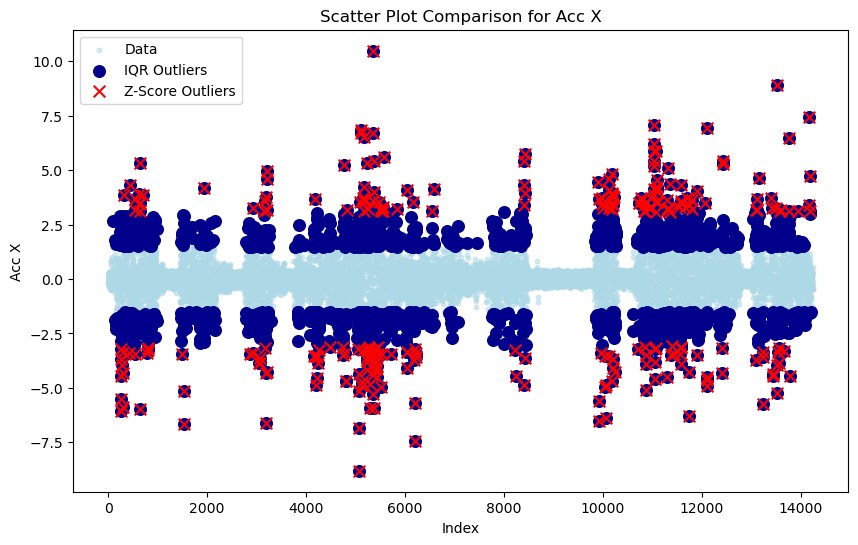

Scatter plot comparison for Acc Y:


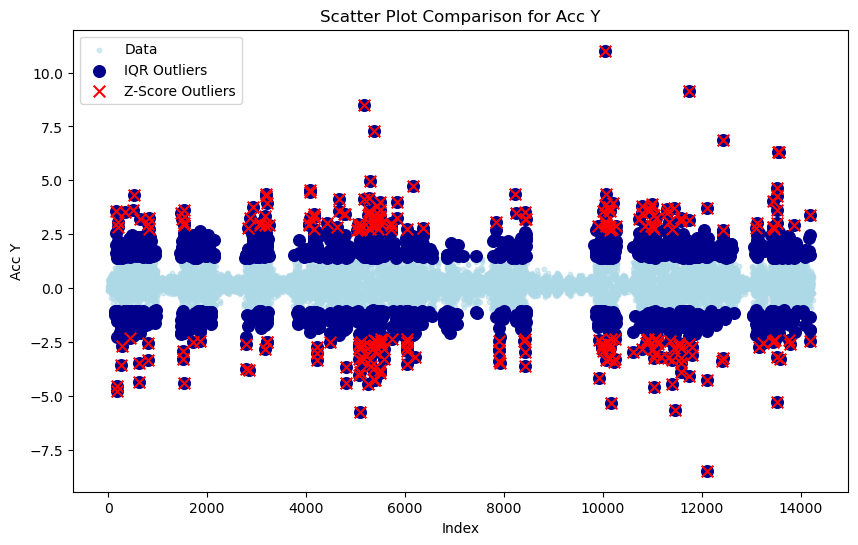

Scatter plot comparison for Acc Z:


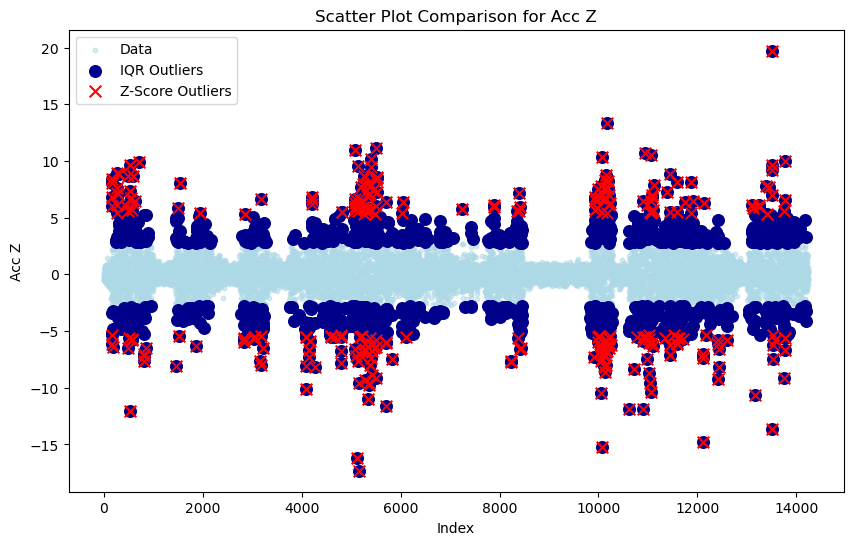

Scatter plot comparison for Heading:


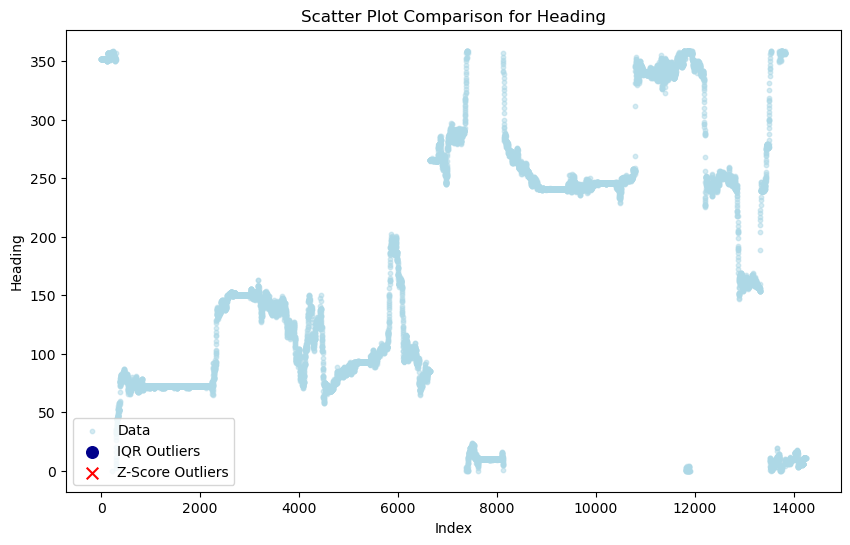

Scatter plot comparison for gyro_x:


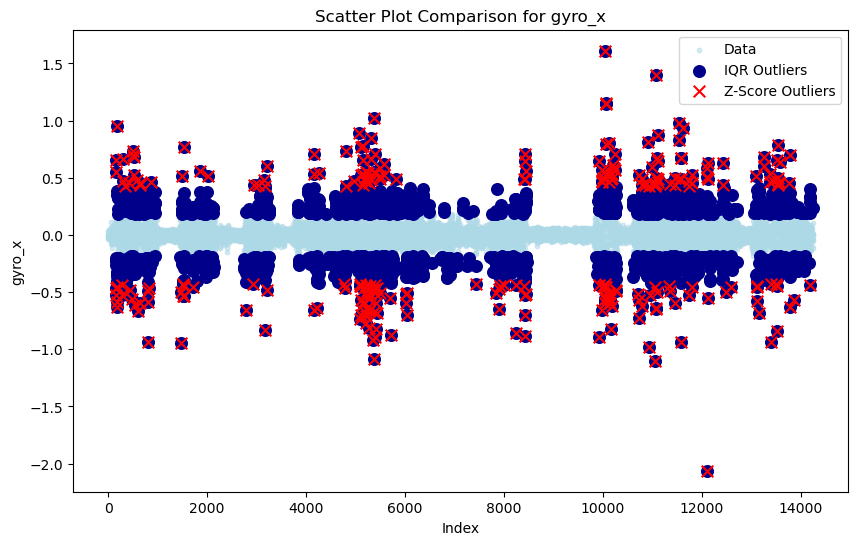

Scatter plot comparison for gyro_y:


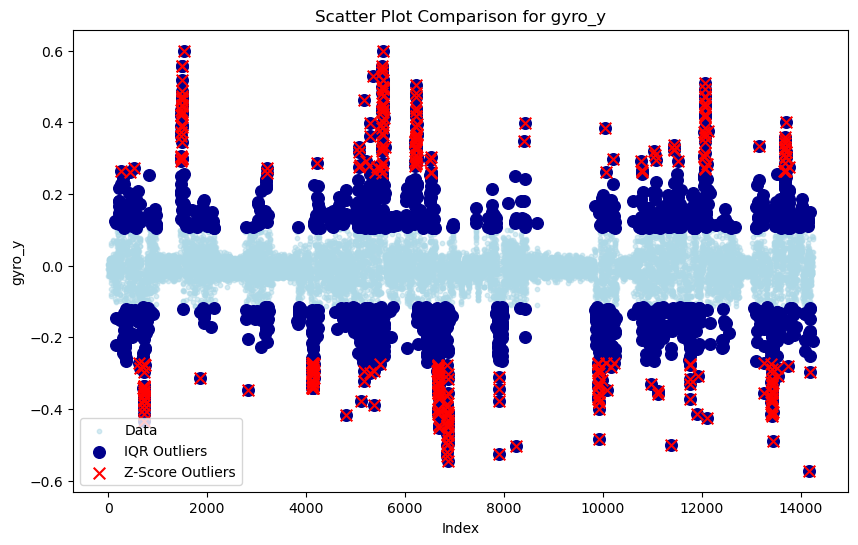

Scatter plot comparison for Gyro_Change:


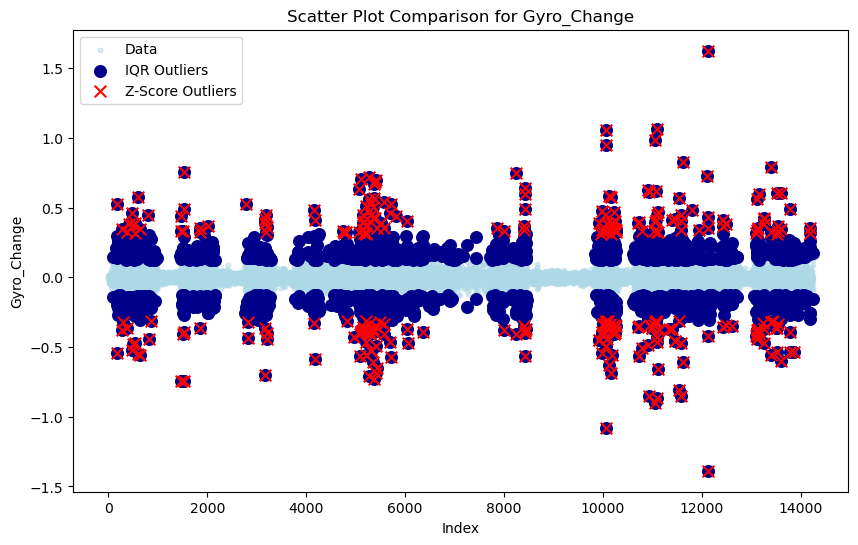

Scatter plot comparison for Net_Displacement:


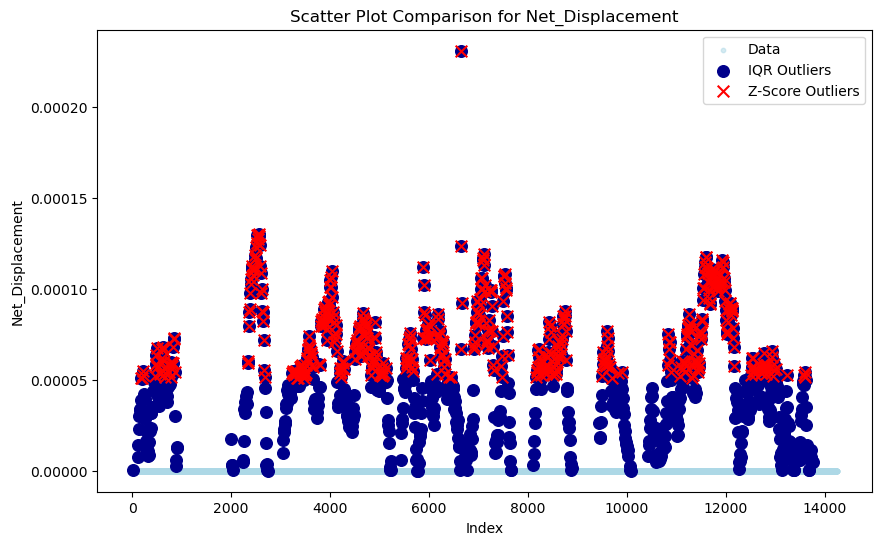

Scatter plot comparison for Speed_Change:


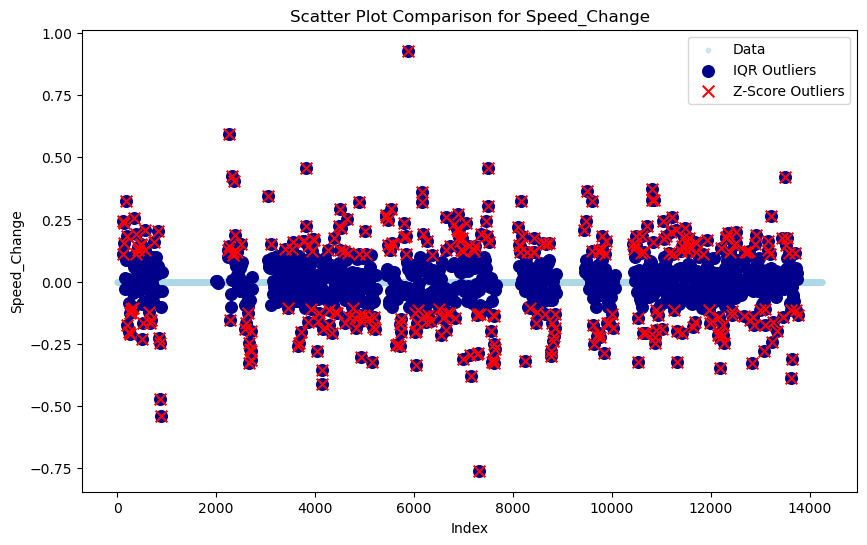

Scatter plot comparison for Heading_Change:


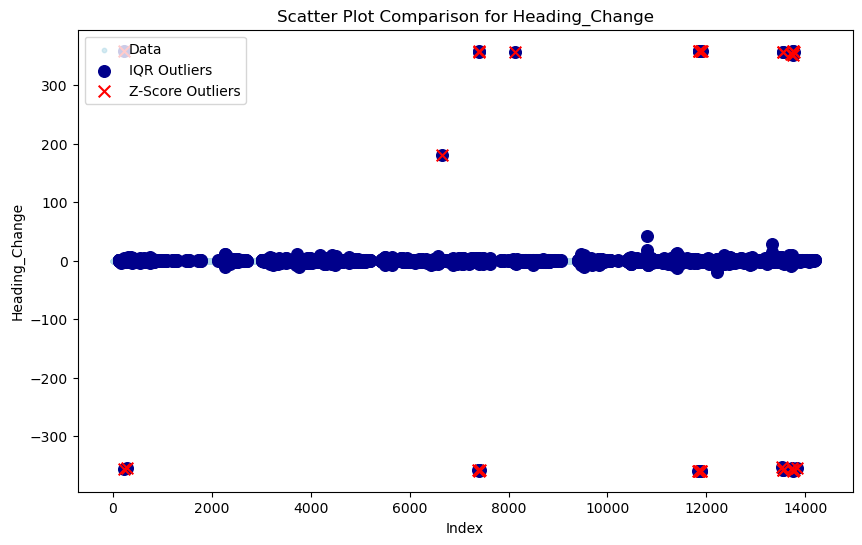

Scatter plot comparison for Rolling_Acc_Mean:


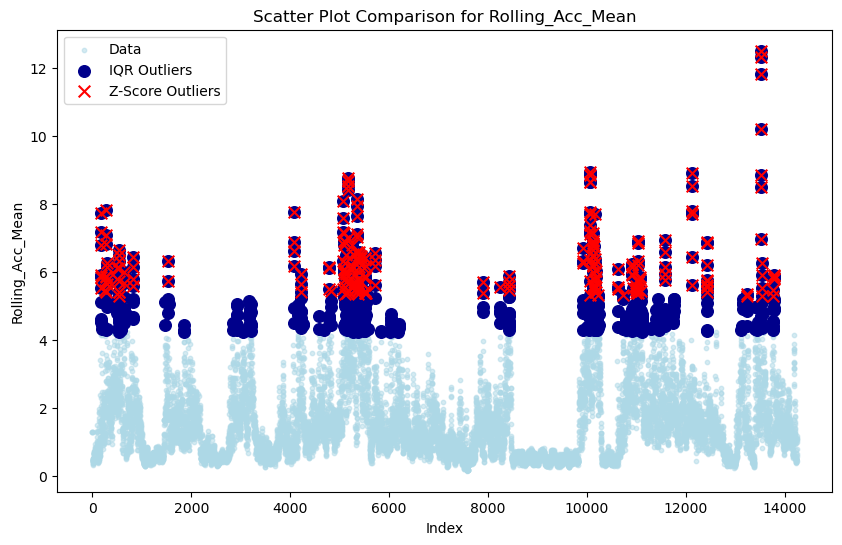

Scatter plot comparison for Rolling_Acc_STD:


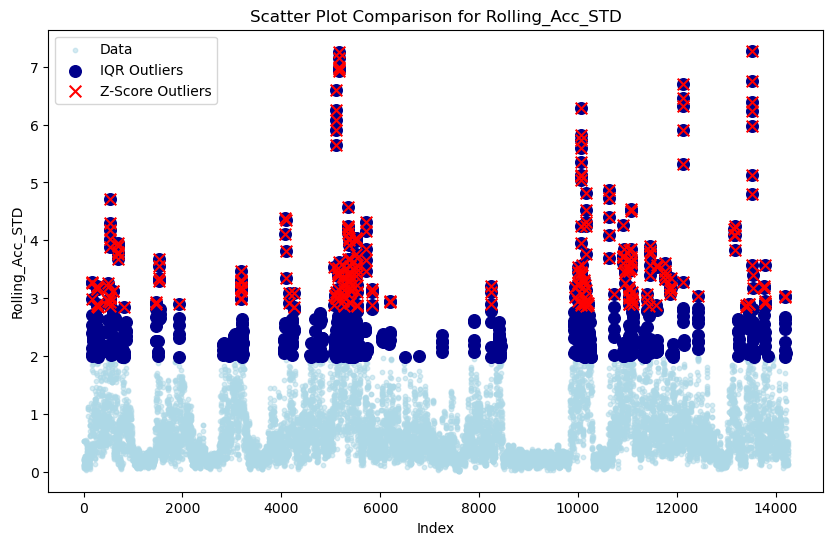

Scatter plot comparison for acc_mean:


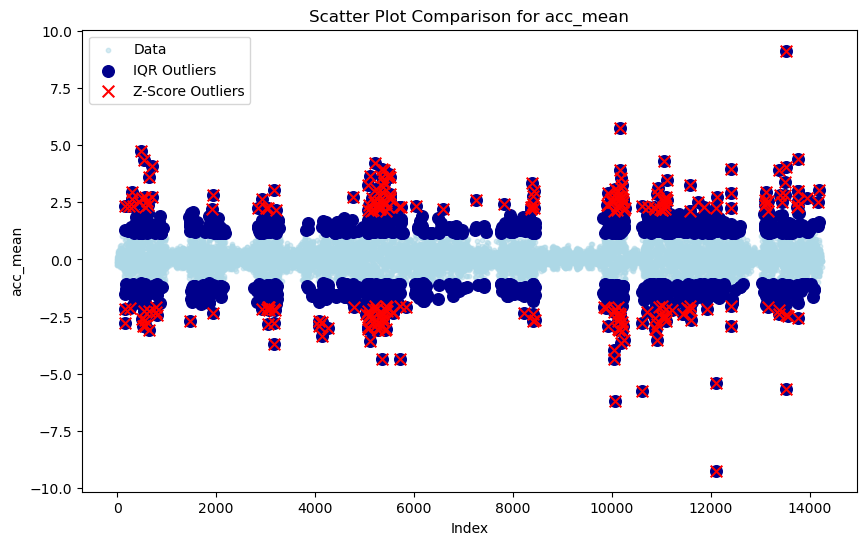

Scatter plot comparison for acc_std:


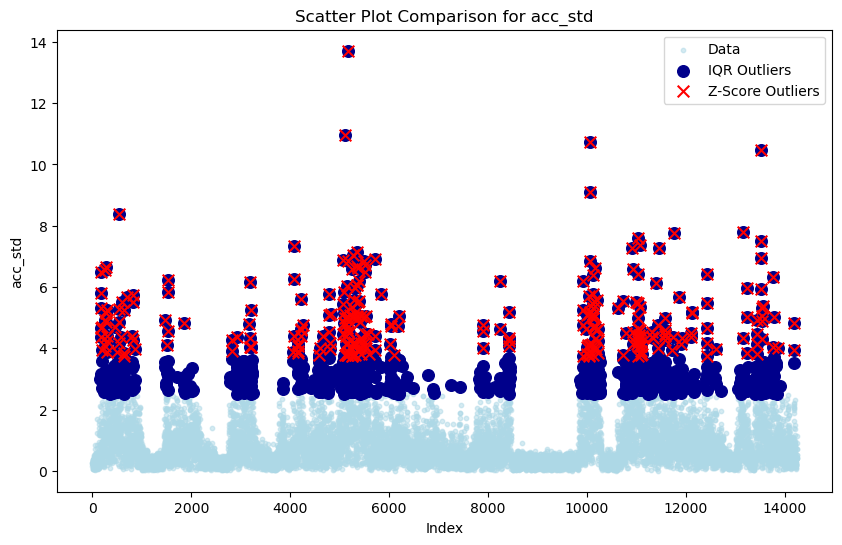

Scatter plot comparison for gyro_mean:


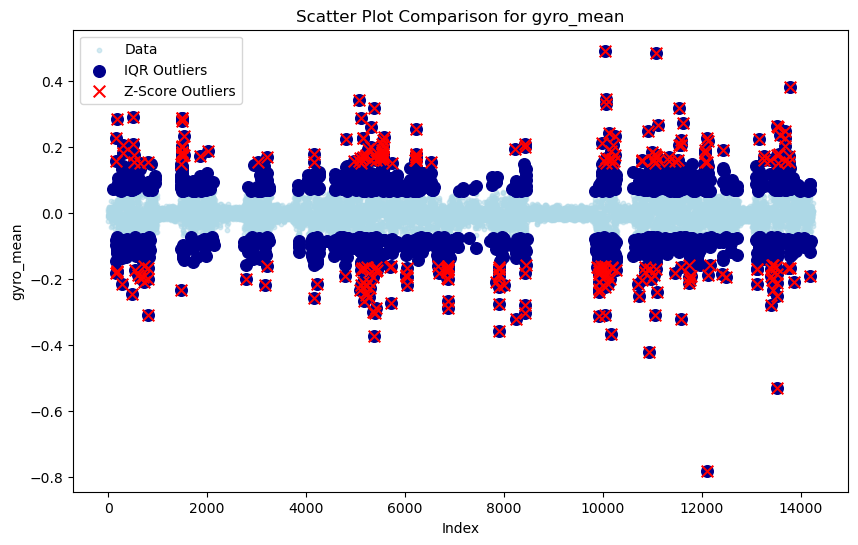

Scatter plot comparison for gyro_std:


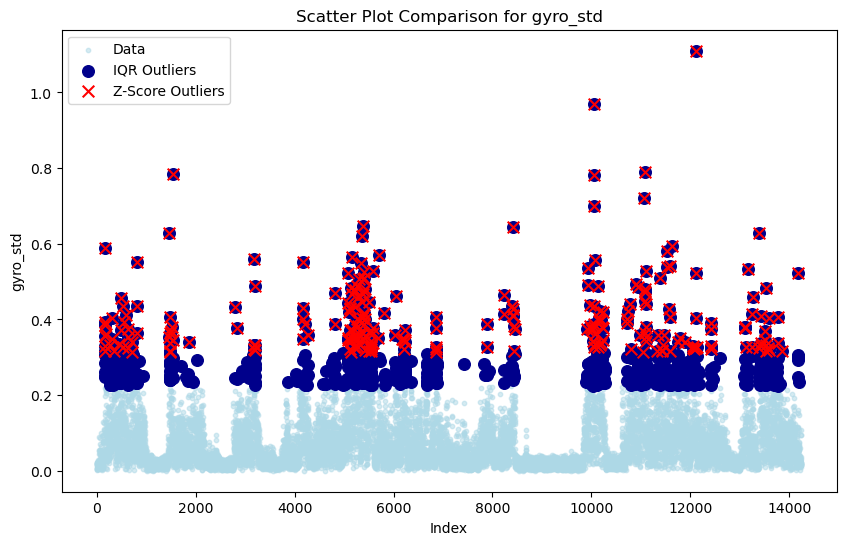

In [45]:
# Scatter plot to compare IQR vs Z-score outliers with updated colors
def plot_scatter_comparison(data, column, iqr_outliers, zscore_outliers):
    plt.figure(figsize=(10, 6))
    
    # Plot original data with light blue
    plt.scatter(data.index, data[column], color='lightblue', label='Data', alpha=0.5, s=10)
    
    # Plot IQR outliers with dark blue color
    plt.scatter(iqr_outliers.index, iqr_outliers[column], color='darkblue', label='IQR Outliers', s=70, marker='o')
    
    # Plot Z-score outliers with bright red color
    plt.scatter(zscore_outliers.index, zscore_outliers[column], color='red', label='Z-Score Outliers', s=70, marker='x')
    
    plt.title(f'Scatter Plot Comparison for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage for each column
for col in columns:
    # Calculate IQR and Z-score outliers for each column
    iqr_outliers, iqr_lower, iqr_upper = calculate_iqr_outliers(data, col)
    zscore_outliers, z_mean, z_std = calculate_zscore_outliers(data, col)
    
    # Plot scatter comparison for each column
    print(f"Scatter plot comparison for {col}:")
    plot_scatter_comparison(data, col, iqr_outliers, zscore_outliers)


## Time-Series Plot with Anomalies (Time as Index)

Time-series plot with anomalies for Acc X:


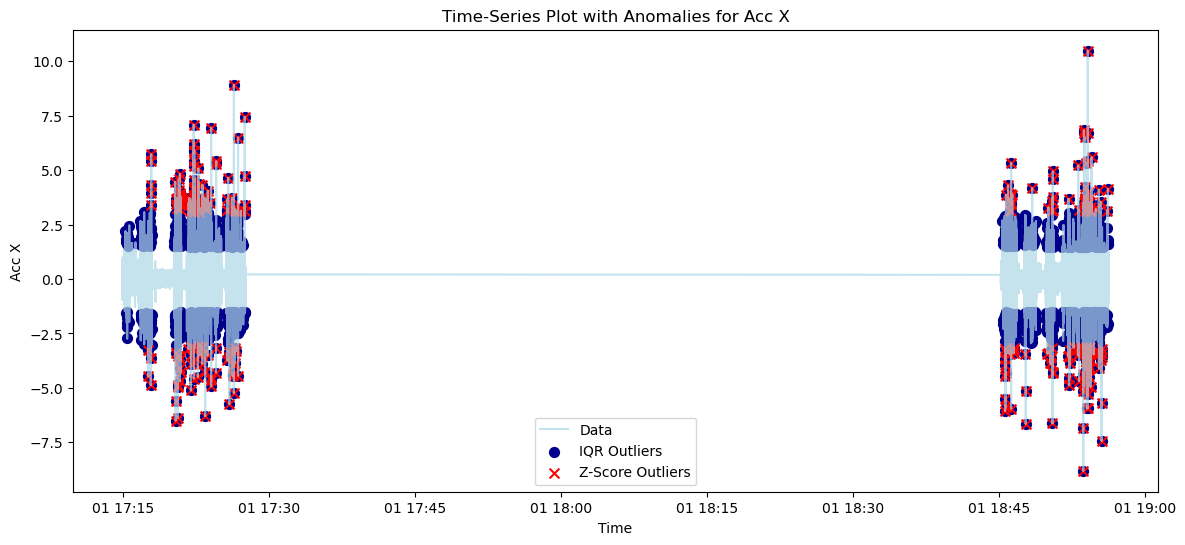

Time-series plot with anomalies for Acc Y:


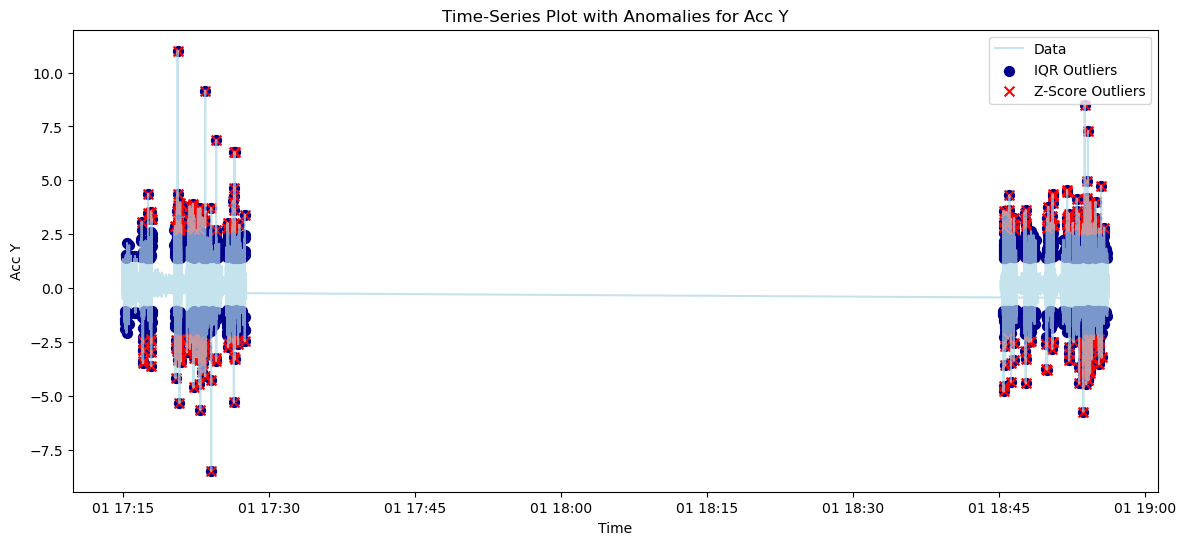

Time-series plot with anomalies for Acc Z:


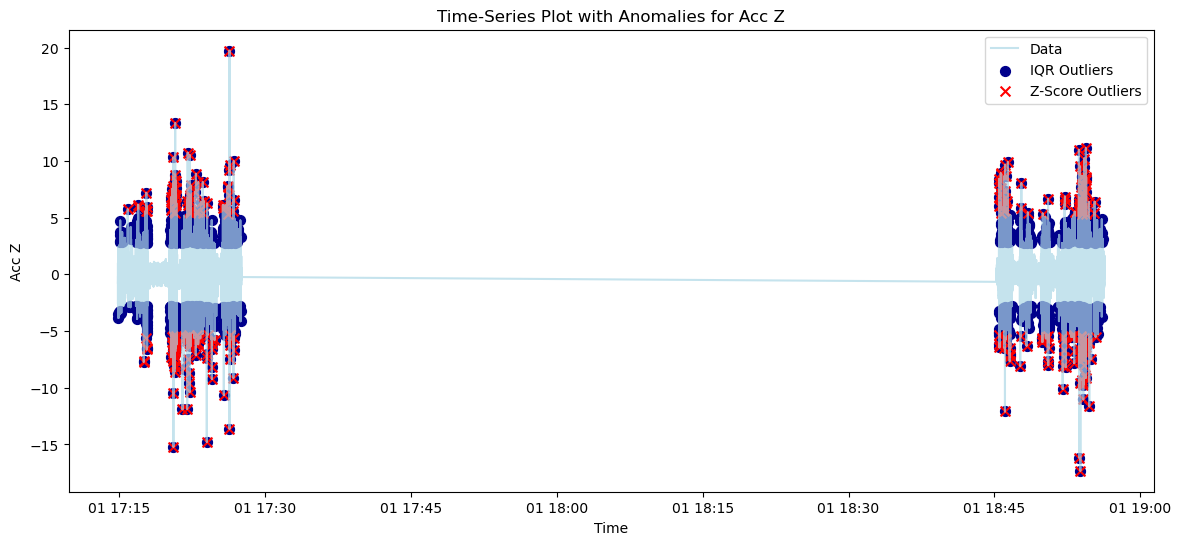

Time-series plot with anomalies for Heading:


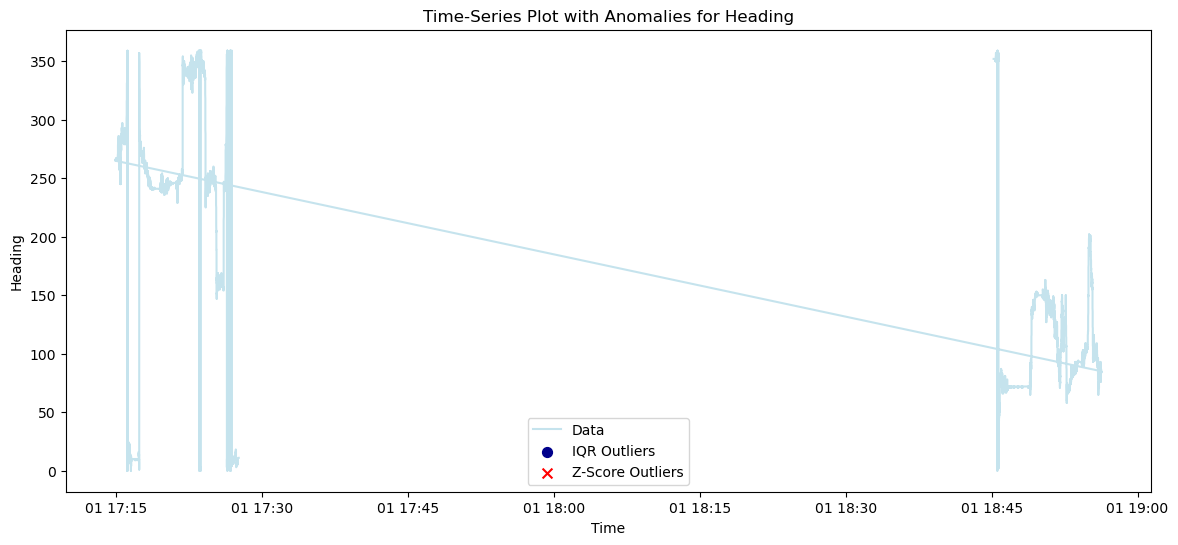

Time-series plot with anomalies for gyro_x:


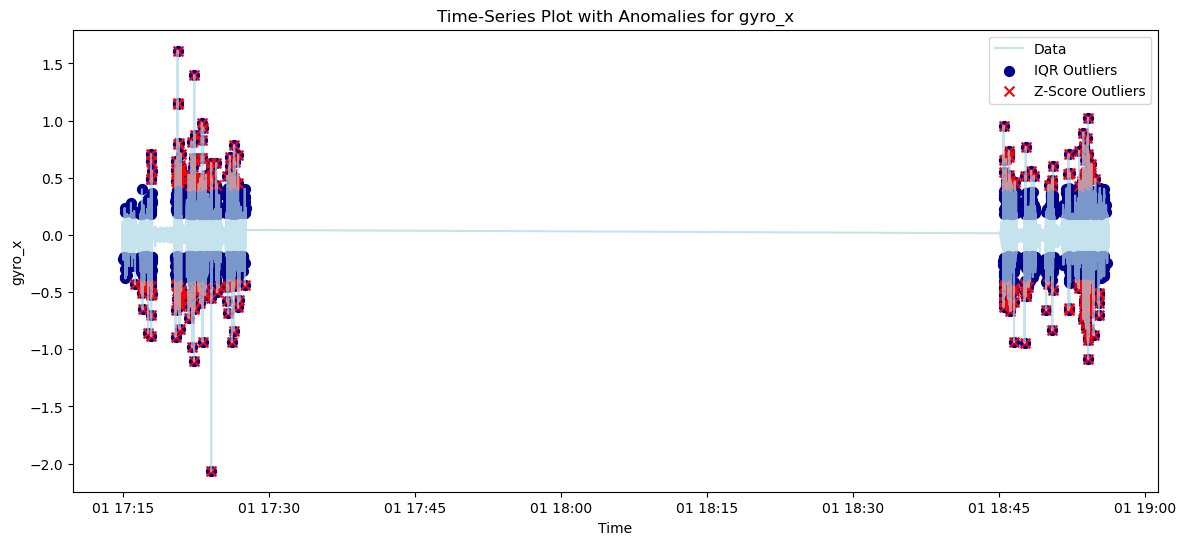

Time-series plot with anomalies for gyro_y:


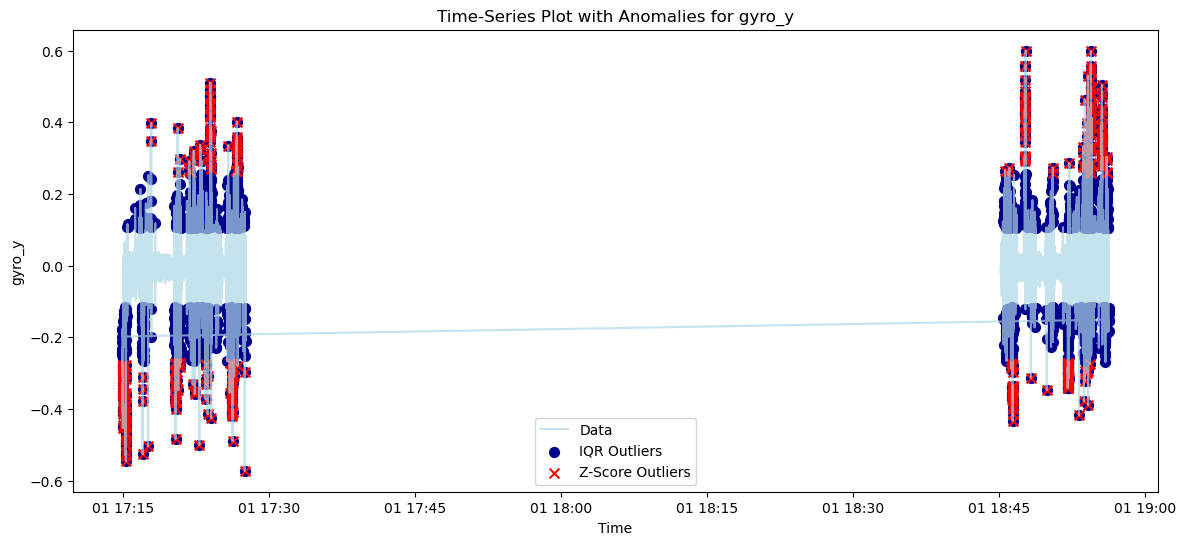

Time-series plot with anomalies for Gyro_Change:


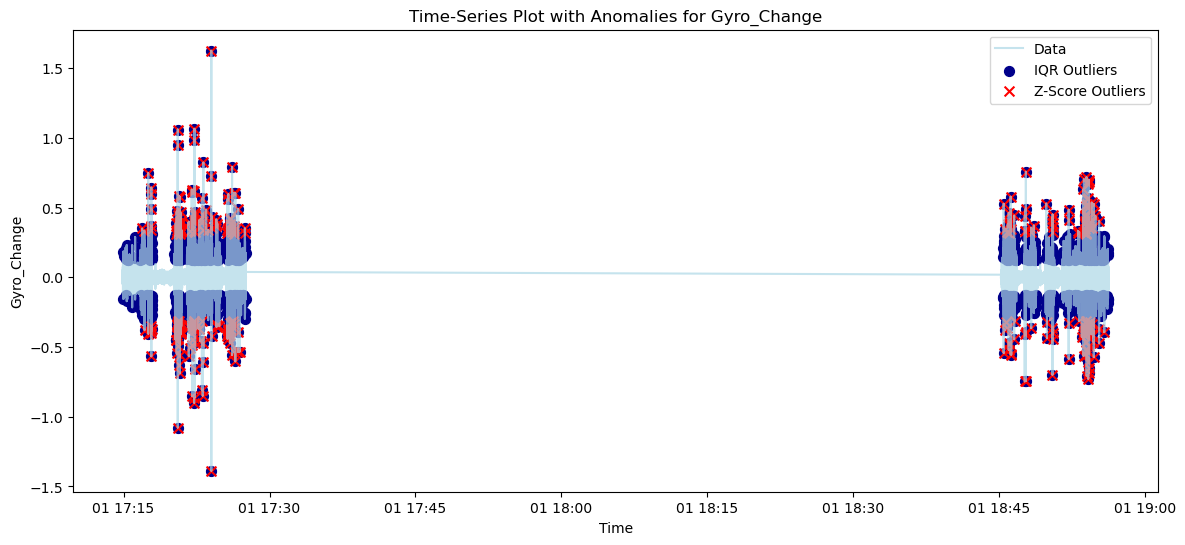

Time-series plot with anomalies for Net_Displacement:


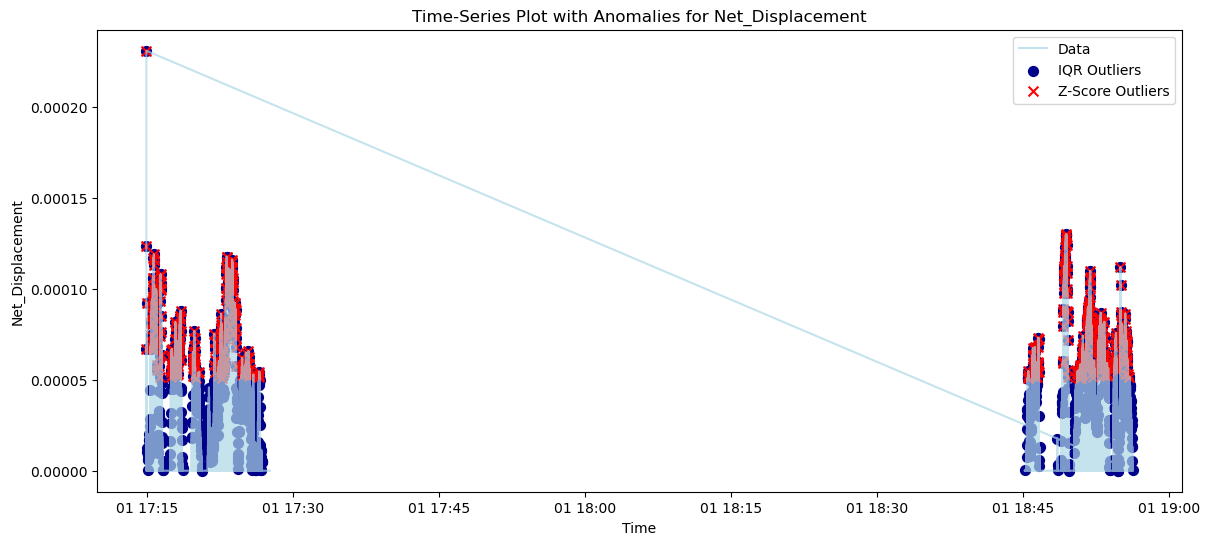

Time-series plot with anomalies for Speed_Change:


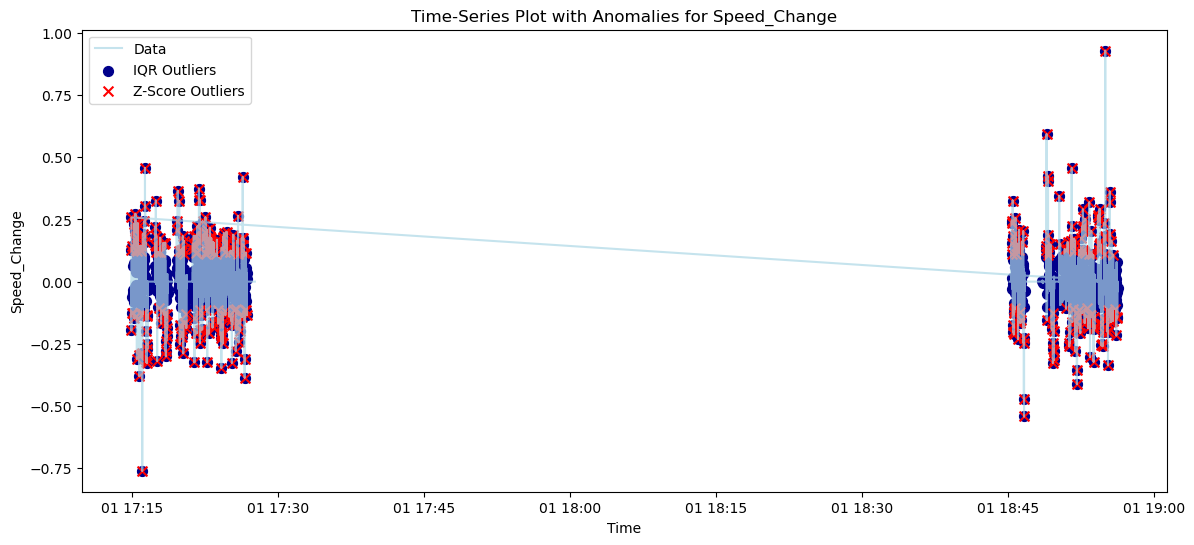

Time-series plot with anomalies for Heading_Change:


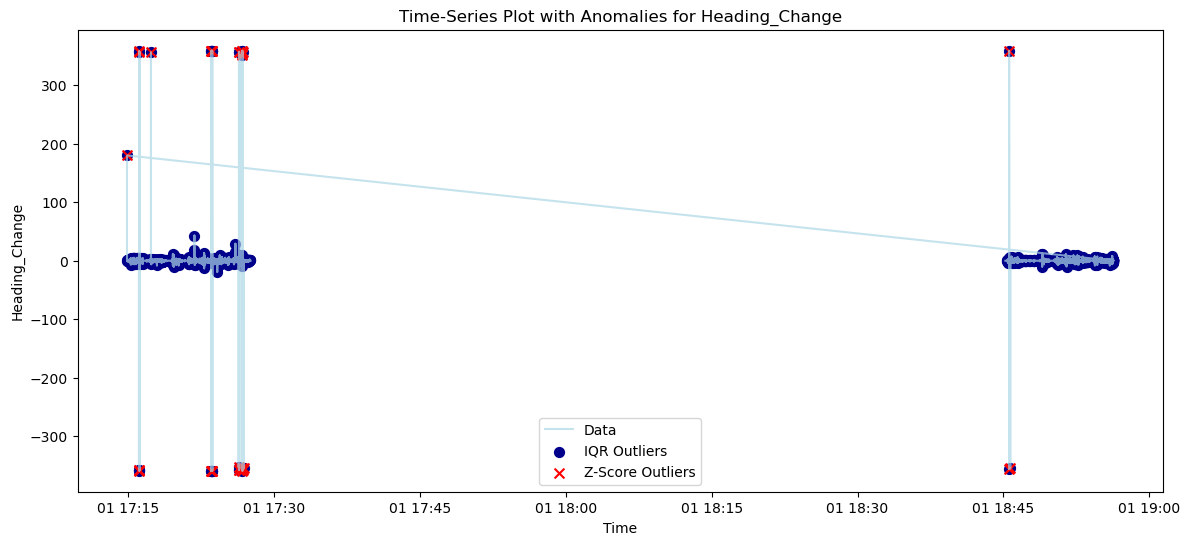

Time-series plot with anomalies for Rolling_Acc_Mean:


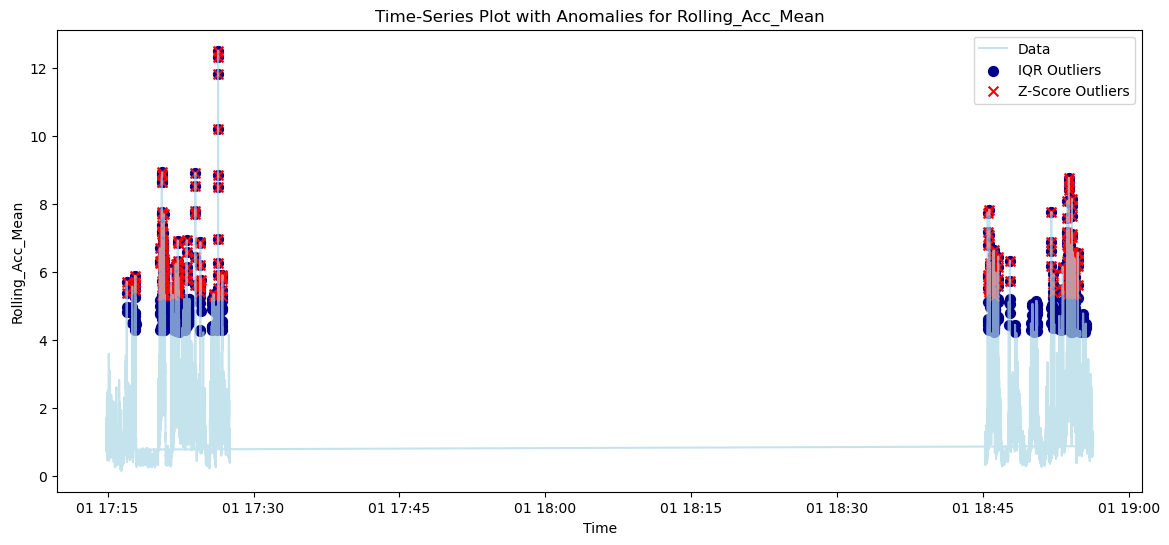

Time-series plot with anomalies for Rolling_Acc_STD:


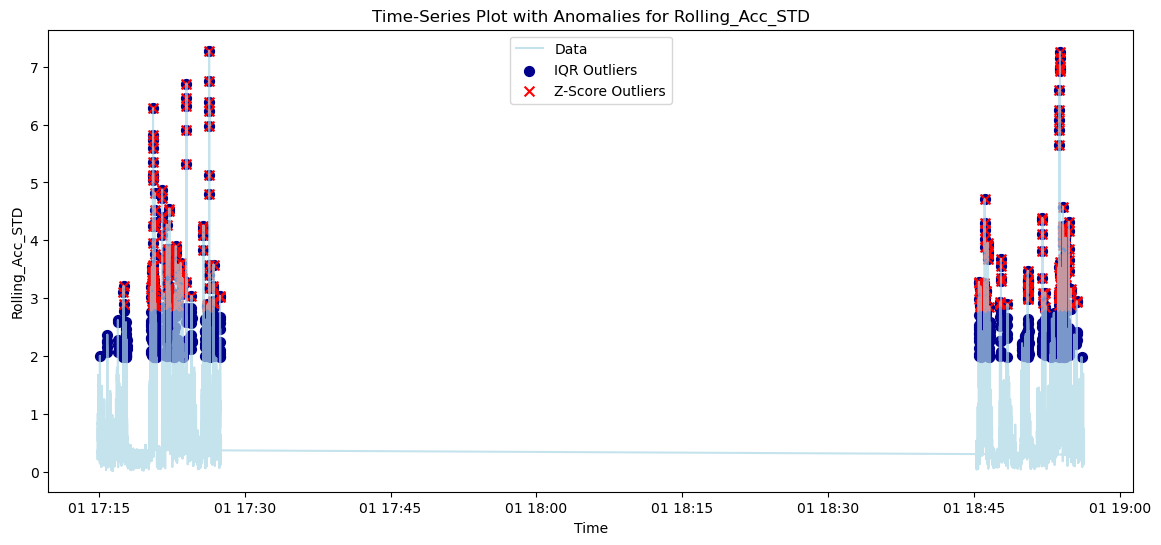

Time-series plot with anomalies for acc_mean:


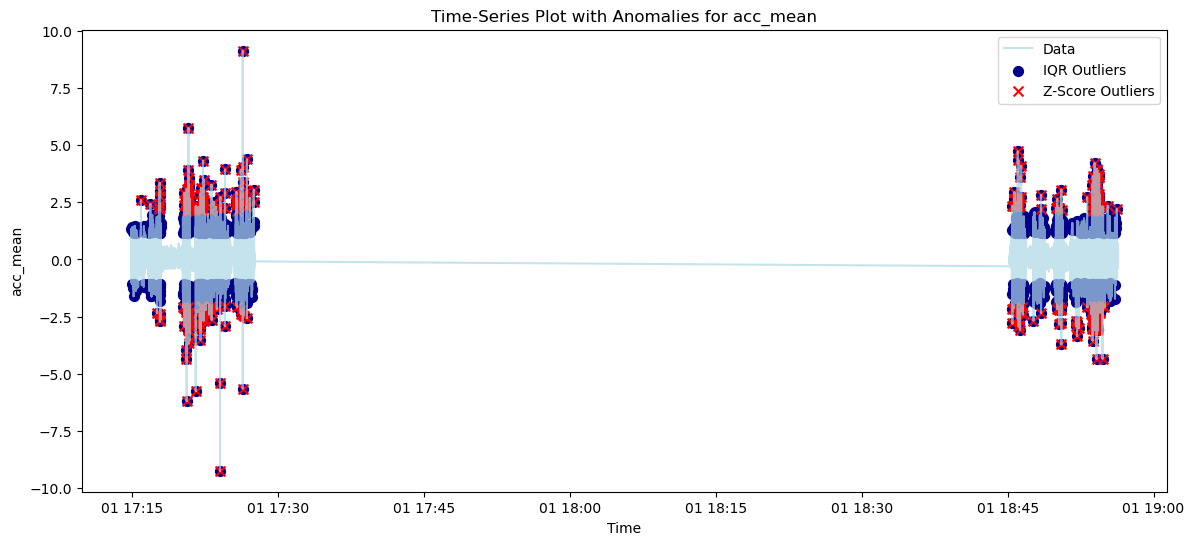

Time-series plot with anomalies for acc_std:


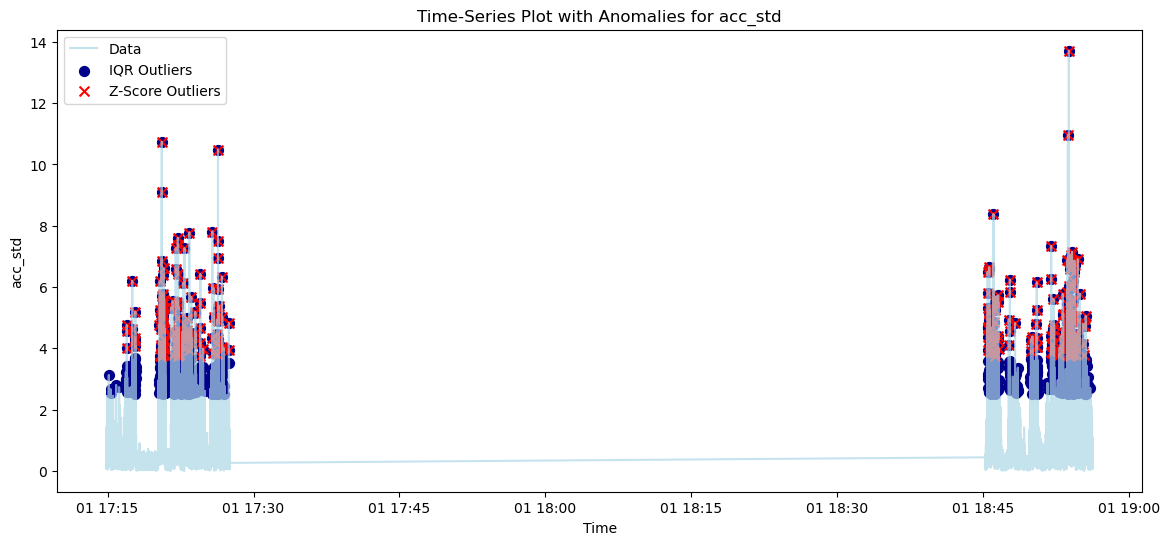

Time-series plot with anomalies for gyro_mean:


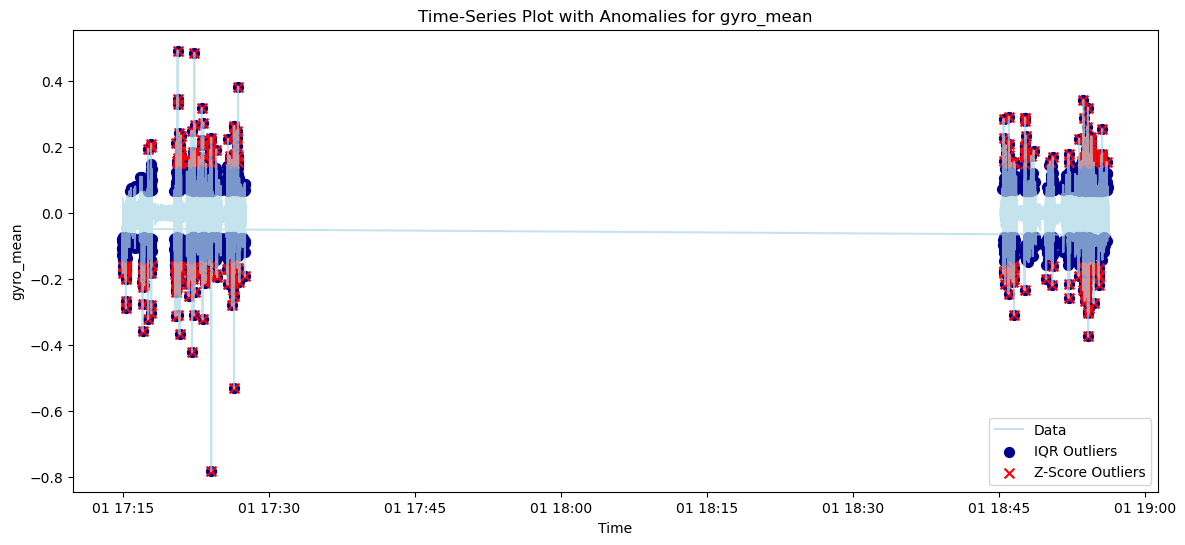

Time-series plot with anomalies for gyro_std:


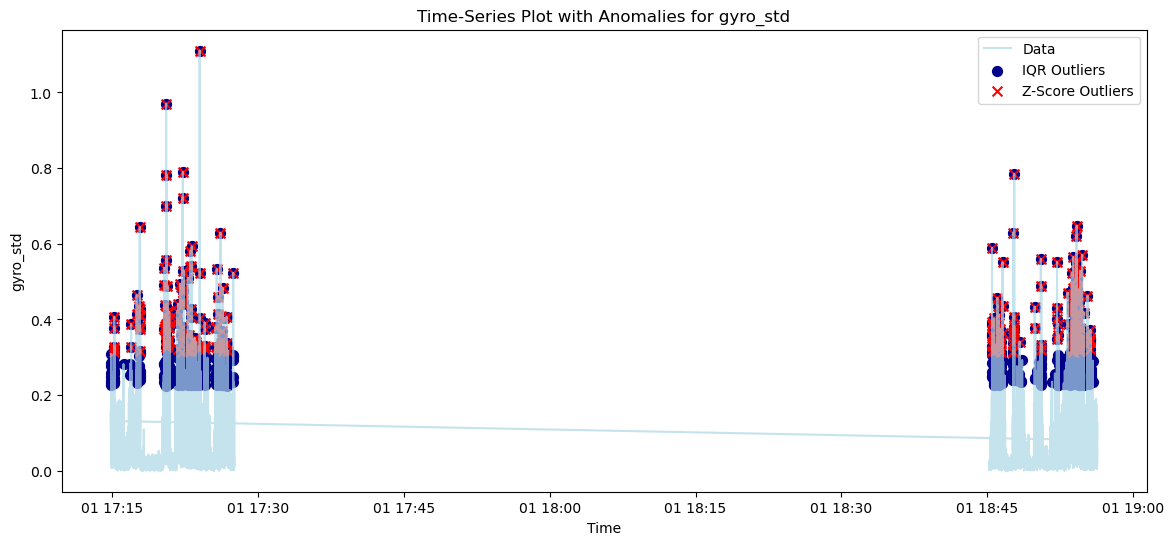

In [46]:
# Set 'Time' as the index for the data (ensure it's in datetime format first)
temp_data = data
temp_data['Time'] = pd.to_datetime(temp_data['Time'])
temp_data.set_index('Time', inplace=True)

# Visualize anomalies on time-series plot with updated colors
def plot_time_series_with_anomalies(temp_data, column, iqr_outliers, zscore_outliers):
    plt.figure(figsize=(14, 6))
    
    # Plot the time series with a light blue color
    plt.plot(temp_data.index, temp_data[column], label='Data', color='lightblue', alpha=0.7)
    
    # Plot IQR outliers with dark blue color
    plt.scatter(iqr_outliers.index, iqr_outliers[column], color='darkblue', label='IQR Outliers', s=50, marker='o')
    
    # Plot Z-score outliers with bright red color
    plt.scatter(zscore_outliers.index, zscore_outliers[column], color='red', label='Z-Score Outliers', s=50, marker='x')
    
    plt.title(f'Time-Series Plot with Anomalies for {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage for each column
columns = ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
           'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']

for col in columns:
    # Calculate IQR and Z-score outliers for each column
    iqr_outliers, iqr_lower, iqr_upper = calculate_iqr_outliers(temp_data, col)
    zscore_outliers, z_mean, z_std = calculate_zscore_outliers(temp_data, col)
    
    # Plot time-series with anomalies for each column
    print(f"Time-series plot with anomalies for {col}:")
    plot_time_series_with_anomalies(data, col, iqr_outliers, zscore_outliers)


## Time-Series Plot with Anomalies

Time-series plot with anomalies for Acc X:


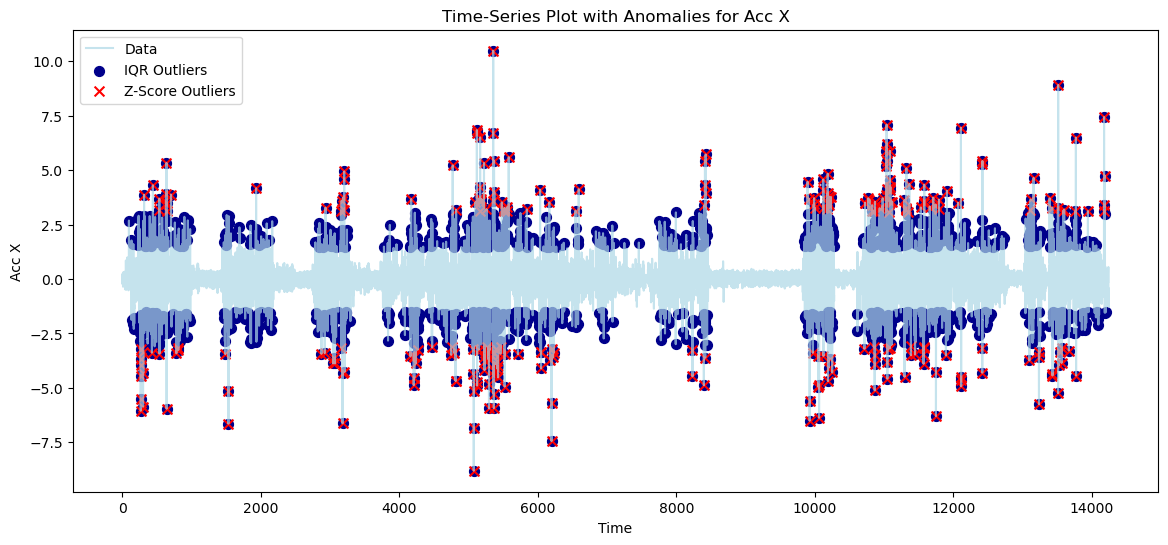

Time-series plot with anomalies for Acc Y:


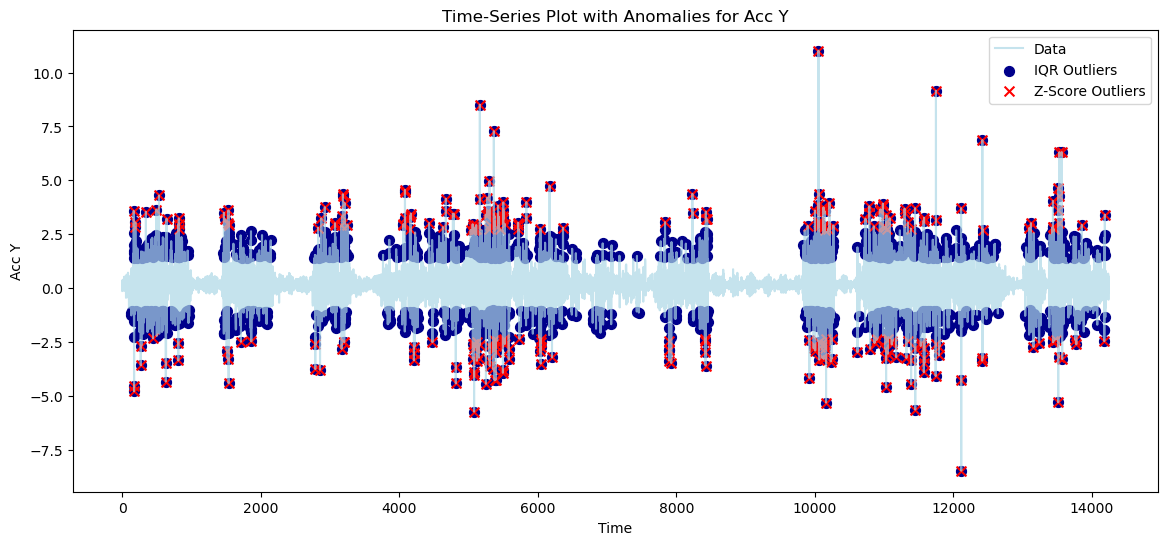

Time-series plot with anomalies for Acc Z:


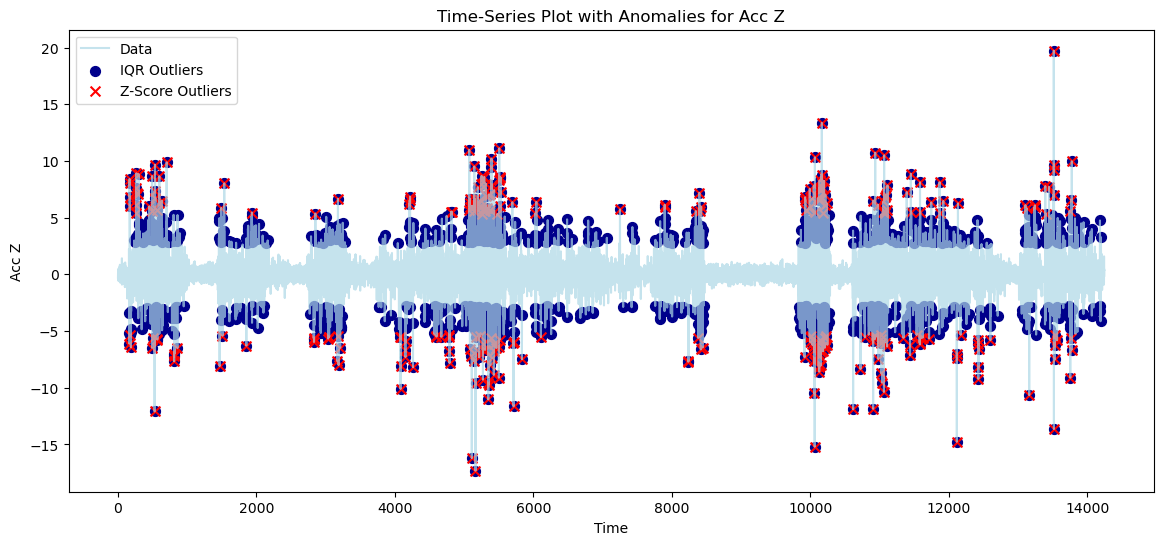

Time-series plot with anomalies for Heading:


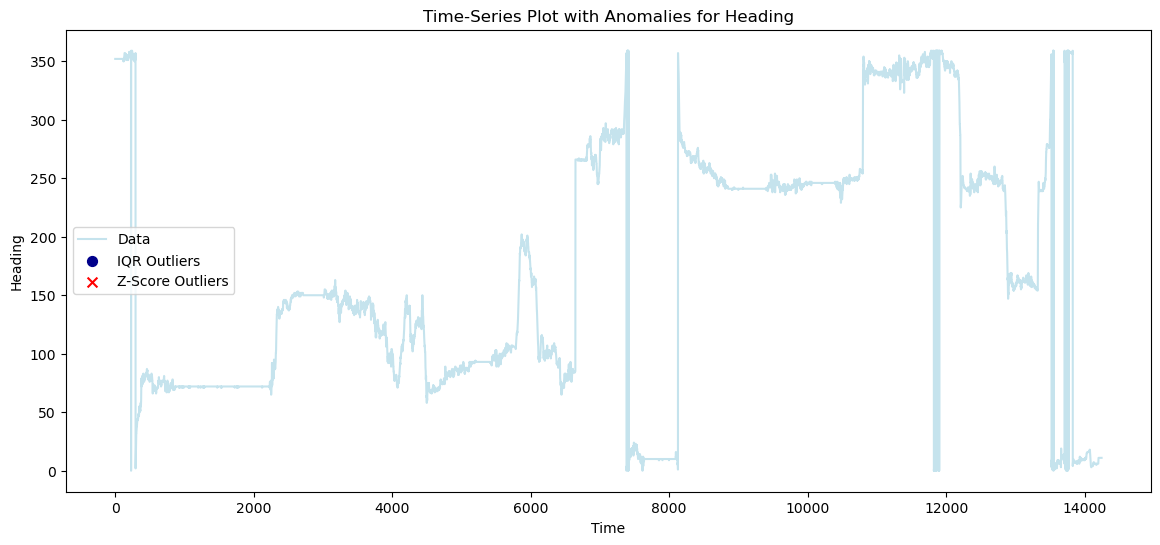

Time-series plot with anomalies for gyro_x:


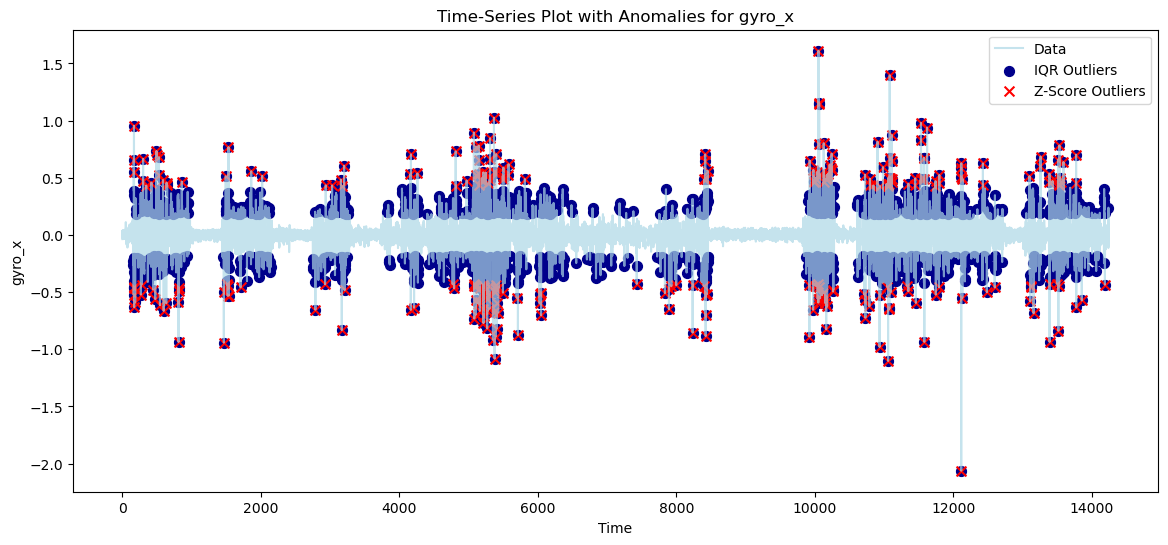

Time-series plot with anomalies for gyro_y:


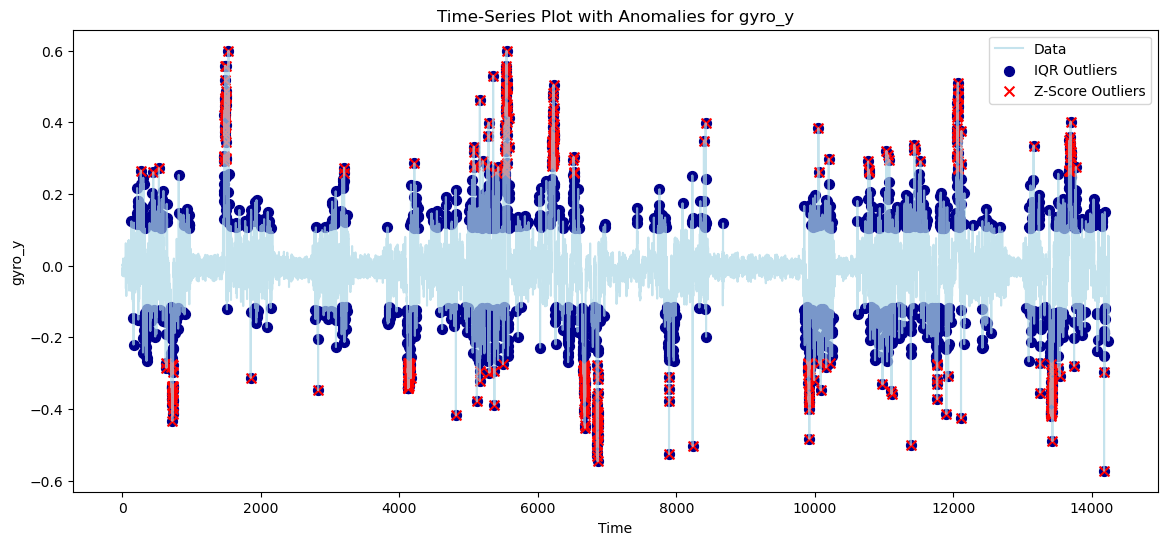

Time-series plot with anomalies for Gyro_Change:


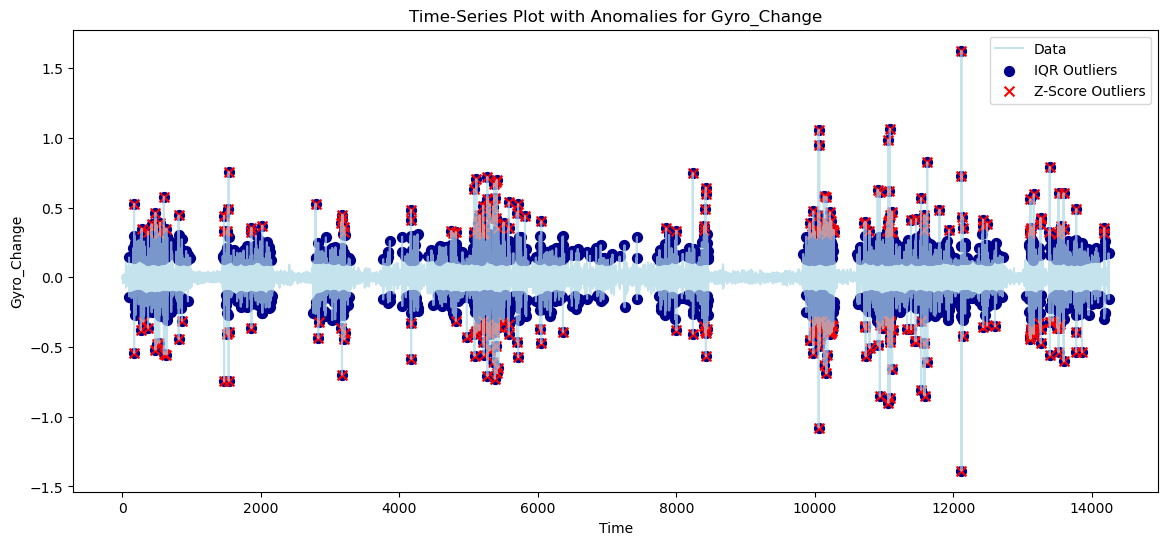

Time-series plot with anomalies for Net_Displacement:


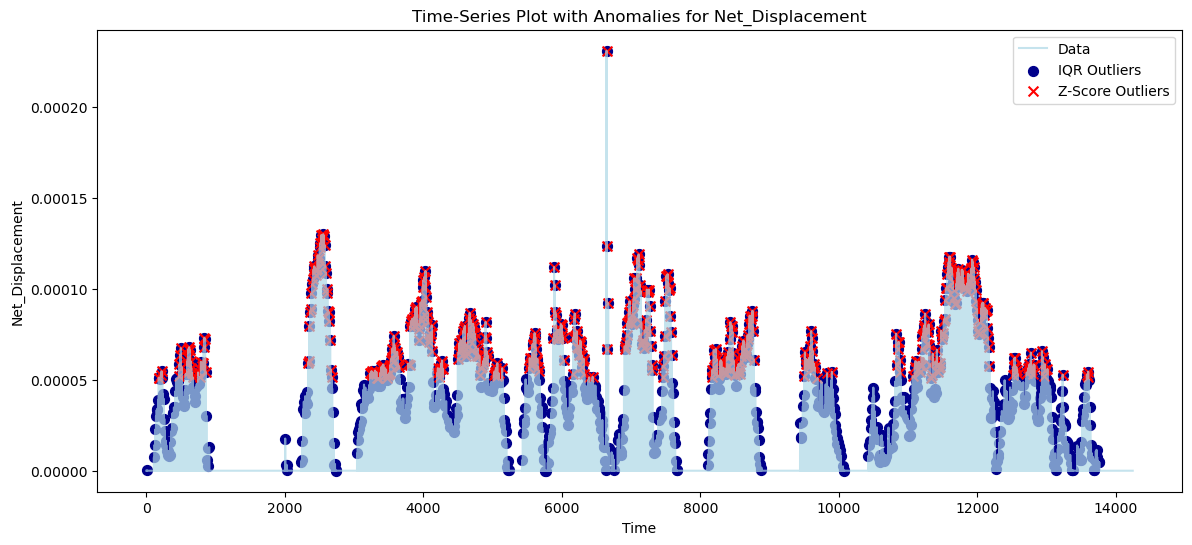

Time-series plot with anomalies for Speed_Change:


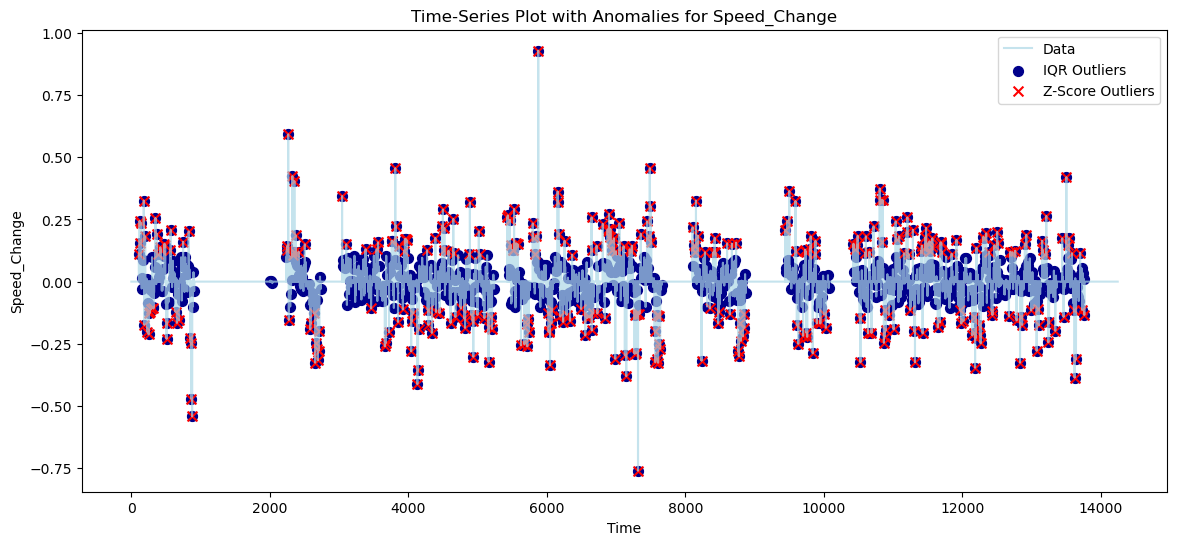

Time-series plot with anomalies for Heading_Change:


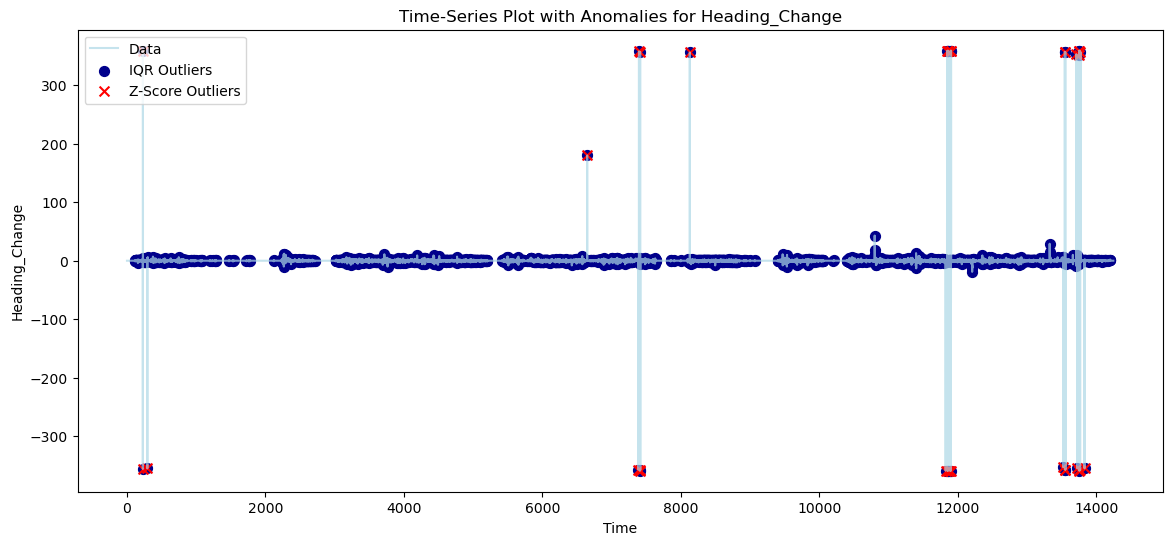

Time-series plot with anomalies for Rolling_Acc_Mean:


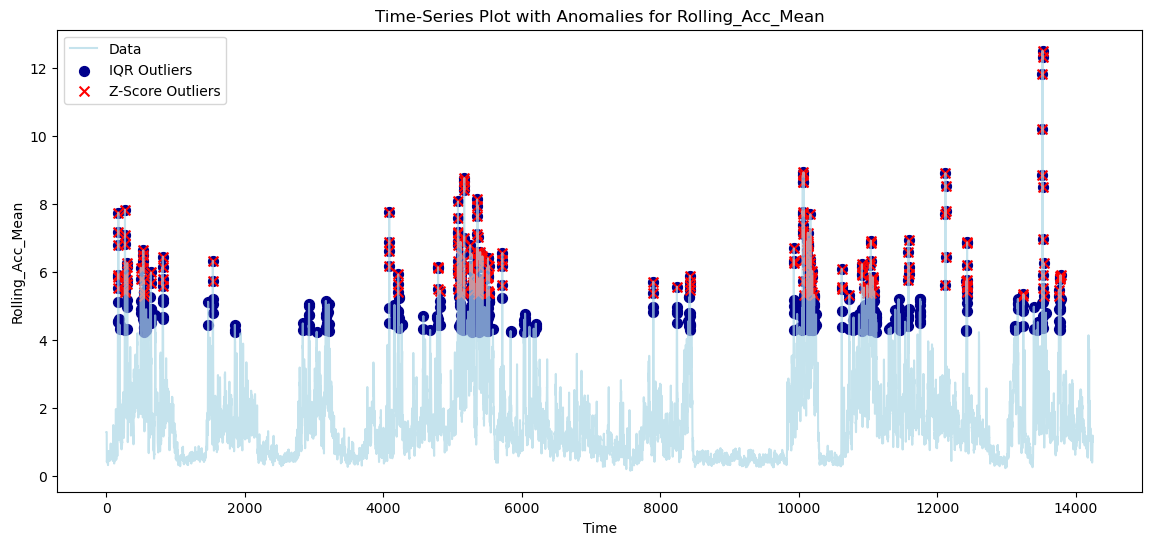

Time-series plot with anomalies for Rolling_Acc_STD:


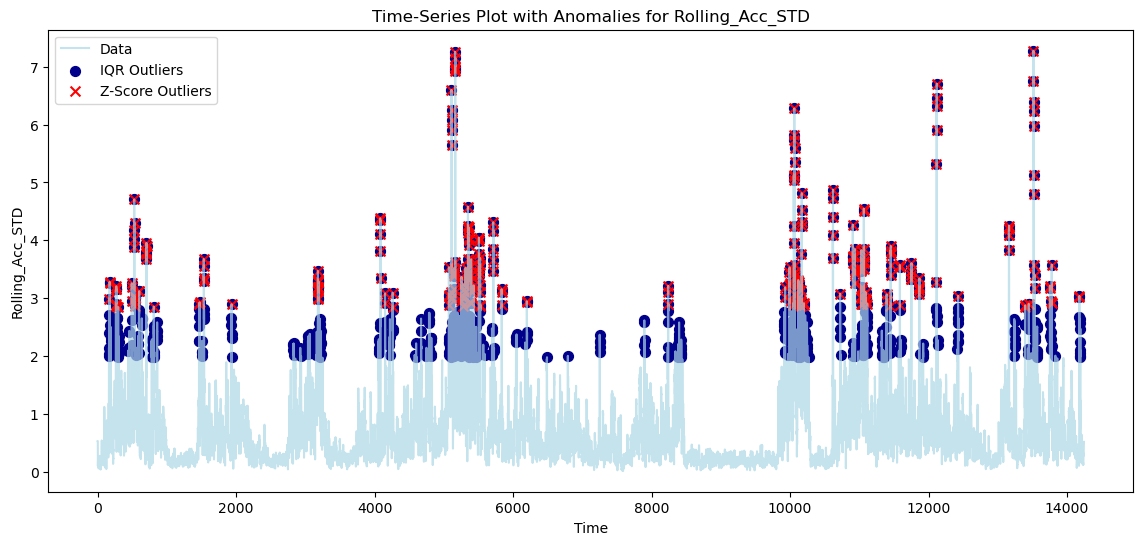

Time-series plot with anomalies for acc_mean:


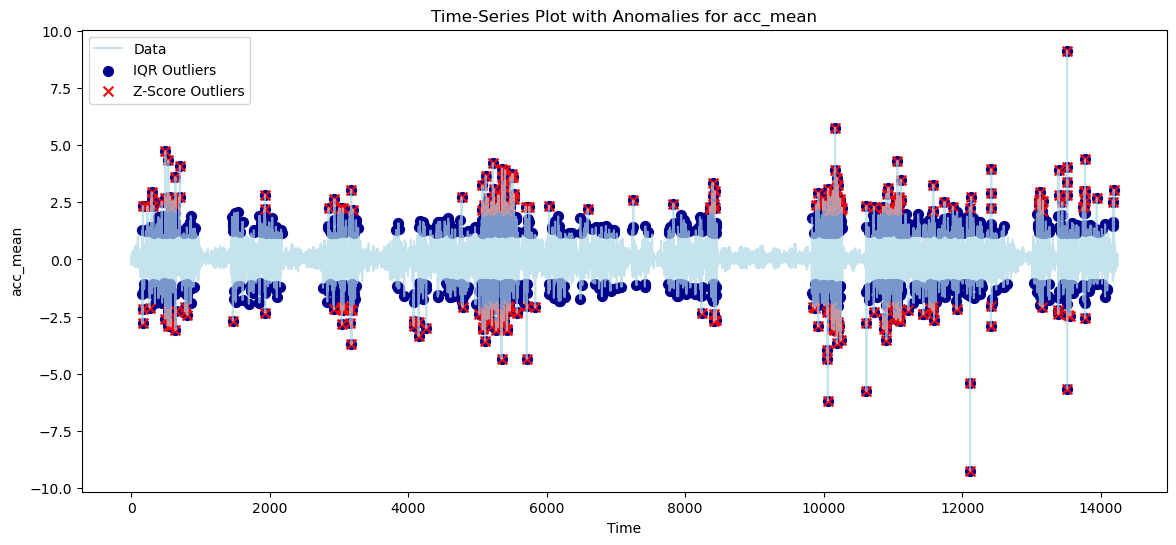

Time-series plot with anomalies for acc_std:


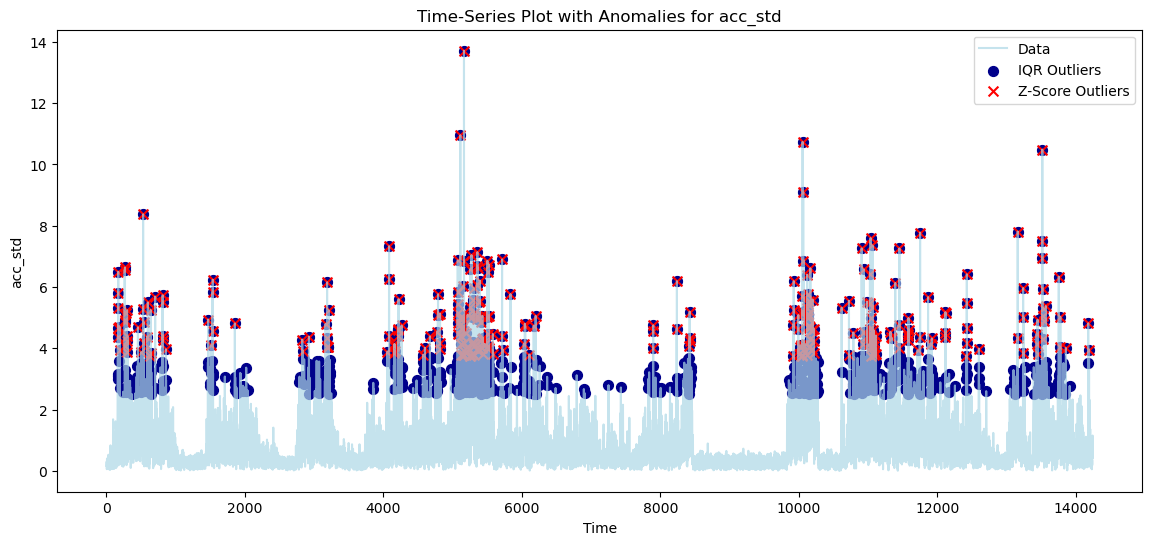

Time-series plot with anomalies for gyro_mean:


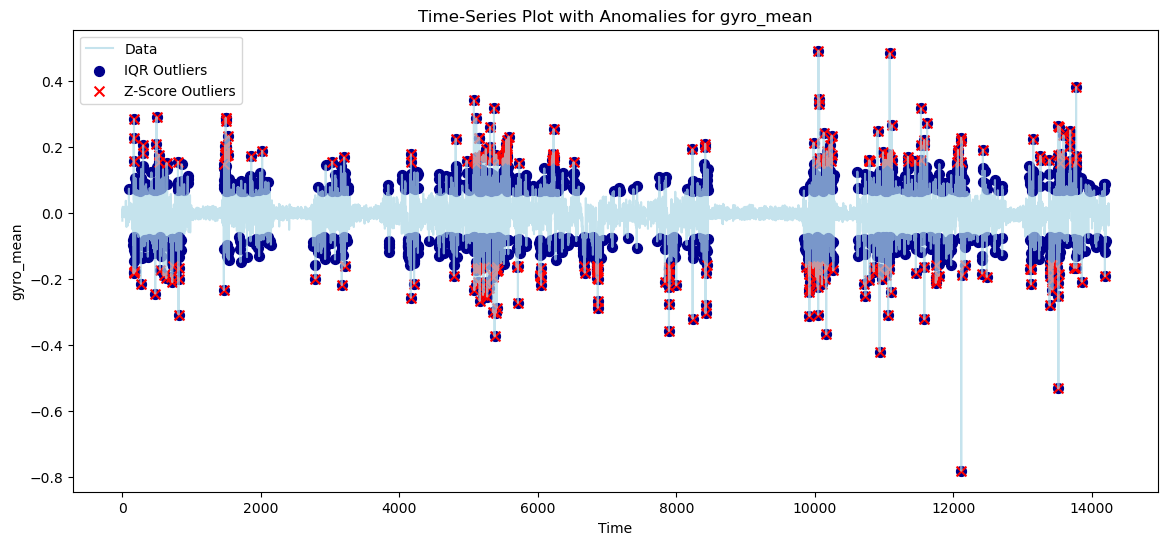

Time-series plot with anomalies for gyro_std:


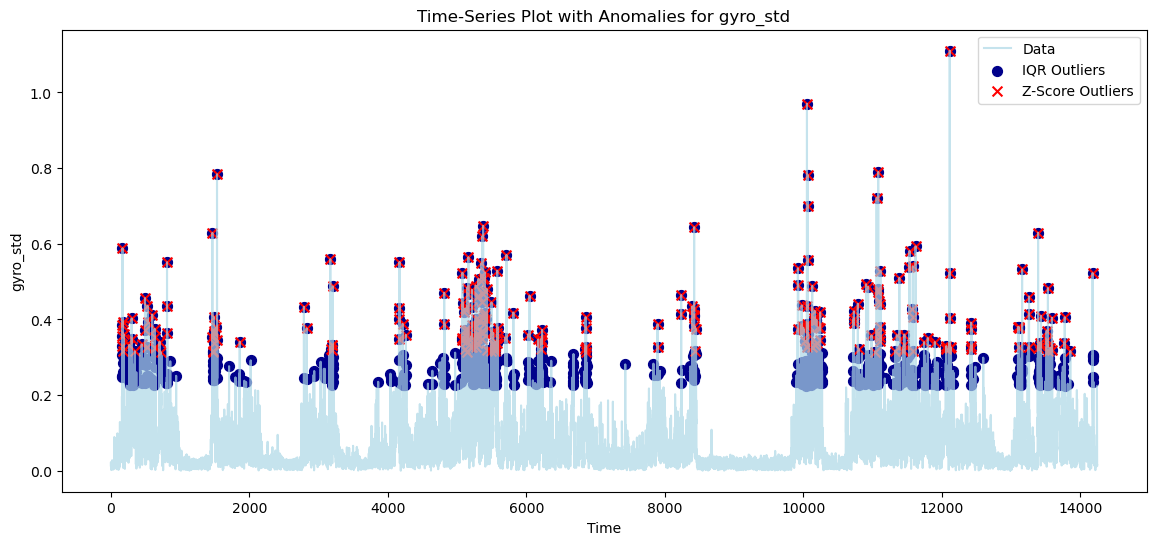

In [51]:
# Visualize anomalies on time-series plot with updated colors
def plot_time_series_with_anomalies(data, column, iqr_outliers, zscore_outliers):
    plt.figure(figsize=(14, 6))
    
    # Plot the time series with a light blue color
    plt.plot(data.index, data[column], label='Data', color='lightblue', alpha=0.7)
    
    # Plot IQR outliers with dark blue color
    plt.scatter(iqr_outliers.index, iqr_outliers[column], color='darkblue', label='IQR Outliers', s=50, marker='o')
    
    # Plot Z-score outliers with bright red color
    plt.scatter(zscore_outliers.index, zscore_outliers[column], color='red', label='Z-Score Outliers', s=50, marker='x')
    
    plt.title(f'Time-Series Plot with Anomalies for {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Example usage for each column
columns = ['Acc X','Acc Y','Acc Z','Heading','gyro_x','gyro_y','Gyro_Change','Net_Displacement','Speed_Change',
           'Heading_Change','Rolling_Acc_Mean','Rolling_Acc_STD','acc_mean','acc_std','gyro_mean','gyro_std']

for col in columns:
    # Calculate IQR and Z-score outliers for each column
    iqr_outliers, iqr_lower, iqr_upper = calculate_iqr_outliers(data, col)
    zscore_outliers, z_mean, z_std = calculate_zscore_outliers(data, col)
    
    # Plot time-series with anomalies for each column
    print(f"Time-series plot with anomalies for {col}:")
    plot_time_series_with_anomalies(data, col, iqr_outliers, zscore_outliers)


## Importing the Python Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

## Load the Dataset

In [85]:
data = pd.read_csv('Featured_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Longitude         14246 non-null  float64
 1   Latitude          14246 non-null  float64
 2   Speed             14246 non-null  float64
 3   Distance          14246 non-null  float64
 4   Time              14246 non-null  object 
 5   Acc X             14246 non-null  float64
 6   Acc Y             14246 non-null  float64
 7   Acc Z             14246 non-null  float64
 8   Heading           14246 non-null  int64  
 9   gyro_x            14246 non-null  float64
 10  gyro_y            14246 non-null  float64
 11  gyro_z            14246 non-null  float64
 12  label             14246 non-null  int64  
 13  Acc_Magnitude     14246 non-null  float64
 14  Acc_Change        14246 non-null  float64
 15  Gyro_Magnitude    14246 non-null  float64
 16  Gyro_Change       14246 non-null  float6

In [145]:
data.describe().T

count          mean            std         min  \
Longitude         14246.0  7.382656e+01       0.003661   73.821195   
Latitude          14246.0  1.850857e+01       0.005242   18.501504   
Speed             14246.0  7.718982e-01       0.705439    0.000000   
Distance          14246.0  2.795223e+03  120598.784322    0.000000   
Acc X             14246.0 -1.136666e-03       1.030982   -8.805807   
Acc Y             14246.0  1.802373e-01       0.837260   -8.476646   
Acc Z             14246.0 -2.357613e-02       1.768811  -17.320633   
Heading           14246.0  1.712691e+02     105.496919    0.000000   
gyro_x            14246.0 -1.318720e-03       0.141039   -2.062668   
gyro_y            14246.0 -6.521074e-03       0.087850   -0.571912   
gyro_z            14246.0 -3.200064e-03       0.068017   -0.666047   
label             14246.0  5.925874e-01       0.491370    0.000000   
Acc_Magnitude     14246.0  1.607835e+00       1.529821    0.018581   
Acc_Change        14246.0  2.191194e-05       1.355076  -16.179881   
Gyro_Magnitude    14246.0  1.266961e-01       0.127425    0.001460   
Gyro_Change       14246.0 -1.334293e-06       0.104109   -1.387471   
Net_Displacement  14246.0  3.816505e-06       0.000016    0.000000   
Speed_Change      14246.0 -9.351872e-20       0.035884   -0.760000   
Heading_Change    14246.0 -2.393654e-02      17.575867 -359.000000   
Rolling_Acc_Mean  14246.0  1.608040e+00       1.227237    0.144979   
Rolling_Acc_STD   14246.0  7.429716e-01       0.700332    0.015304   
acc_mean          14246.0  5.184149e-02       0.691140   -9.247761   
acc_std           14246.0  9.265166e-01       0.940104    0.007141   
gyro_mean         14246.0 -3.679953e-03       0.051239   -0.780774   
gyro_std          14246.0  7.701864e-02       0.079085    0.000224   
anomaly_score     14246.0  1.063152e-01       0.072234   -0.246819   
anomaly           14246.0  2.225186e-02       0.147507    0.000000   

                         25%          50%          75%           max  
Longitude          73.822785    73.828663    73.829445  7.383139e+01  
Latitude           18.504085    18.507860    18.513463  1.851871e+01  
Speed               0.000000     0.760000     1.220000  2.712000e+00  
Distance          448.081505  1007.368700  1645.653275  8.312031e+06  
Acc X              -0.378820    -0.013089     0.362683  1.048863e+01  
Acc Y              -0.126690     0.167227     0.478868  1.101326e+01  
Acc Z              -0.701545    -0.025761     0.674922  1.972580e+01  
Heading            77.000000   150.000000   249.000000  3.590000e+02  
gyro_x             -0.046690    -0.002219     0.044939  1.611687e+00  
gyro_y             -0.033272    -0.005783     0.021706  5.995846e-01  
gyro_z             -0.027224    -0.002179     0.024088  5.428556e-01  
label               0.000000     1.000000     1.000000  1.000000e+00  
Acc_Magnitude       0.609765     1.118237     2.065718  2.168270e+01  
Acc_Change         -0.480551    -0.013467     0.473513  1.631348e+01  
Gyro_Magnitude      0.040204     0.084782     0.168847  2.072244e+00  
Gyro_Change        -0.031879    -0.000116     0.030804  1.626290e+00  
Net_Displacement    0.000000     0.000000     0.000000  2.308554e-04  
Speed_Change        0.000000     0.000000     0.000000  9.280000e-01  
Heading_Change      0.000000     0.000000     0.000000  3.590000e+02  
Rolling_Acc_Mean    0.667844     1.284077     2.093364  1.251359e+01  
Rolling_Acc_STD     0.269350     0.527778     0.951488  7.277411e+00  
acc_mean           -0.226714     0.049606     0.320148  9.133835e+00  
acc_std             0.324081     0.622861     1.195859  1.371142e+01  
gyro_mean          -0.020247    -0.003754     0.014410  4.926764e-01  
gyro_std            0.023565     0.049857     0.104188  1.110263e+00  
anomaly_score       0.076741     0.132878     0.161180  1.735188e-01  
anomaly             0.000000     0.000000     0.000000  1.000000e+00

## Using Isolation Forest for outliers detection 

Final Accuracy: 0.4916
Final Precision: 0.9191
Final Recall: 0.1491
Final F1 Score: 0.2565


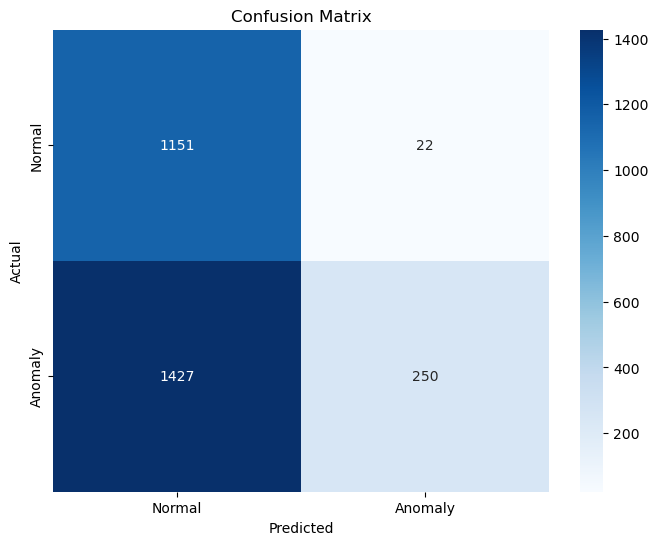

In [126]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[features]
y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_scaled)

# Obtain predictions for the test set
y_pred_if = iso_forest.predict(X_test_scaled)
y_pred_if = np.where(y_pred_if == -1, 1, 0)  # Convert -1 to 1 (anomalies) and 1 to 0 (normal)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_if)
final_precision = precision_score(y_test, y_pred_if)
final_recall = recall_score(y_test, y_pred_if)
final_f1 = f1_score(y_test, y_pred_if)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_if)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Performing Hyperparameter tuning for optimal performance

Best Parameters: {'contamination': 0.1, 'max_samples': 0.5, 'n_estimators': 300}


D:\Code\ML\ZM\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


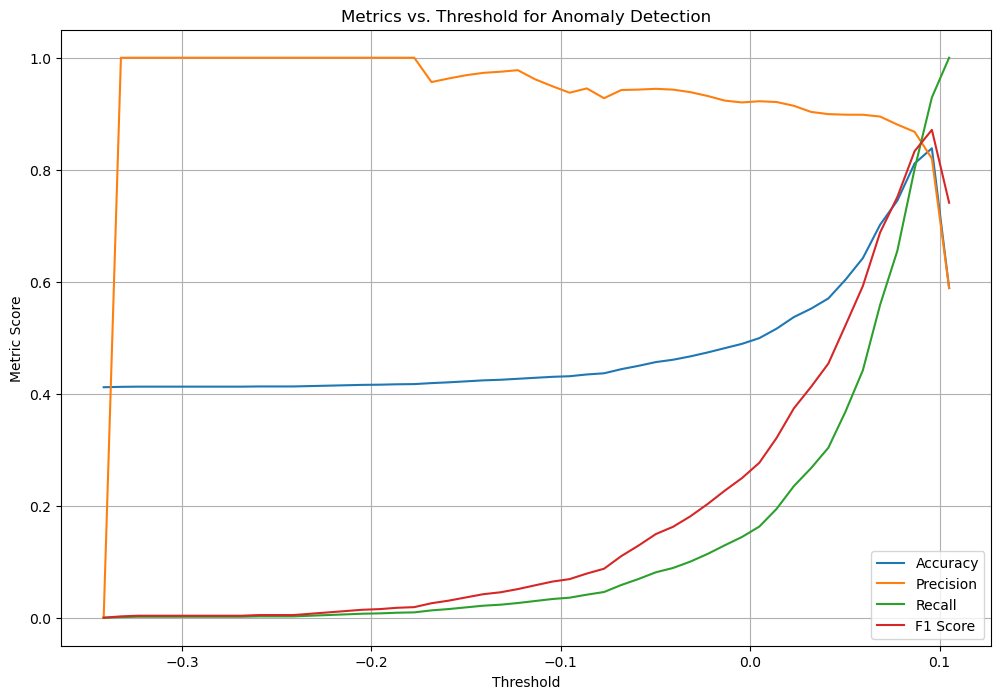

Best Threshold: 0.09592360120937166
Final Accuracy: 0.8382
Final Precision: 0.8200
Final Recall: 0.9290
Final F1 Score: 0.8711


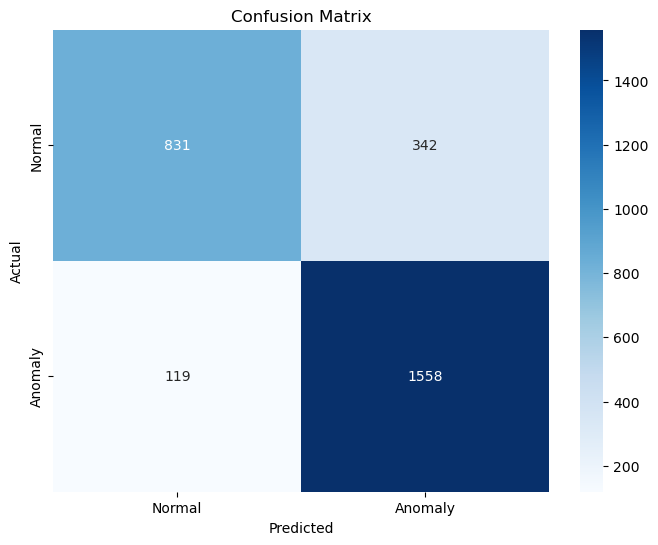

              precision    recall  f1-score   support

      Normal       0.87      0.71      0.78      1173
     Anomaly       0.82      0.93      0.87      1677

    accuracy                           0.84      2850
   macro avg       0.85      0.82      0.83      2850
weighted avg       0.84      0.84      0.83      2850



In [132]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom scorer for GridSearchCV
def anomaly_f1_score(y_true, y_pred):
    return f1_score(y_true, (y_pred < 0).astype(int))

f1_scorer = make_scorer(anomaly_f1_score)

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[features]
y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the Isolation Forest model with hyperparameter tuning
param_grid = {'contamination': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300], 'max_samples': ['auto', 0.5, 0.75]}
iso_forest = GridSearchCV(IsolationForest(random_state=42), param_grid, scoring=f1_scorer, cv=5)
iso_forest.fit(X_train, y_train)

# Best parameters
best_params = iso_forest.best_params_
print(f"Best Parameters: {best_params}")

# Fit the model with the best parameters
iso_forest = IsolationForest(**best_params, random_state=42)
iso_forest.fit(X_train)

# Obtain anomaly scores for the test set
anomaly_scores = iso_forest.decision_function(X_test)

# Evaluate different thresholds
thresholds = np.linspace(min(anomaly_scores), max(anomaly_scores), 50)
metrics = {'Threshold': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for threshold in thresholds:
    y_pred = (anomaly_scores < threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics['Threshold'].append(threshold)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(12, 8))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1 Score'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Score')
plt.title('Metrics vs. Threshold for Anomaly Detection')
plt.legend()
plt.grid()
plt.show()

# Identify the best threshold
best_threshold = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Threshold']
print(f"Best Threshold: {best_threshold}")

# Set the best threshold for the test set
y_pred_best = (anomaly_scores < best_threshold).astype(int)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_best, target_names=['Normal', 'Anomaly']))

# Initialize an empty dictionary to store the metrics
model_metrics = {}

# Function to store the performance metrics for each model
def store_model_metrics(model_name, accuracy, precision, recall, f1):
    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

store_model_metrics('IsolationForest', final_accuracy, final_precision, final_recall, final_f1)


## Ploting of scores

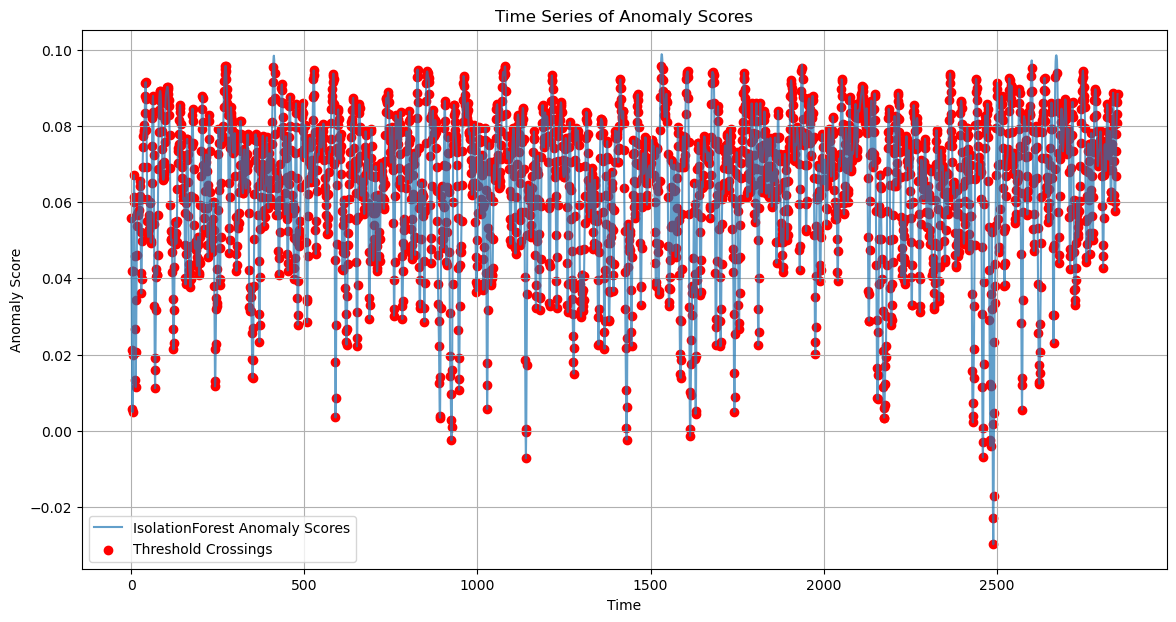

In [99]:
from scipy.ndimage import gaussian_filter1d

# Best Threshold value
best_threshold = 0.09592360120937166

# Apply smoothing to the anomaly scores for a more continuous appearance
smoothed_anomaly_scores = gaussian_filter1d(anomaly_scores, sigma=2)

# Identify points where the smoothed anomaly scores cross the threshold
threshold_points = np.where(smoothed_anomaly_scores < best_threshold)[0]

# Time series plot of smoothed anomaly scores with best threshold point
plt.figure(figsize=(14, 7))
plt.plot(smoothed_anomaly_scores, linestyle='-', alpha=0.7, label='IsolationForest Anomaly Scores')
plt.scatter(threshold_points, smoothed_anomaly_scores[threshold_points], color='red', marker='o', label='Threshold Crossings')
plt.title('Time Series of Anomaly Scores')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid()
plt.show()


## Local Outlier Factor

Best Parameters: {'leaf_size': 30, 'n_neighbors': 20}


D:\Code\ML\ZM\sample_project_1\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


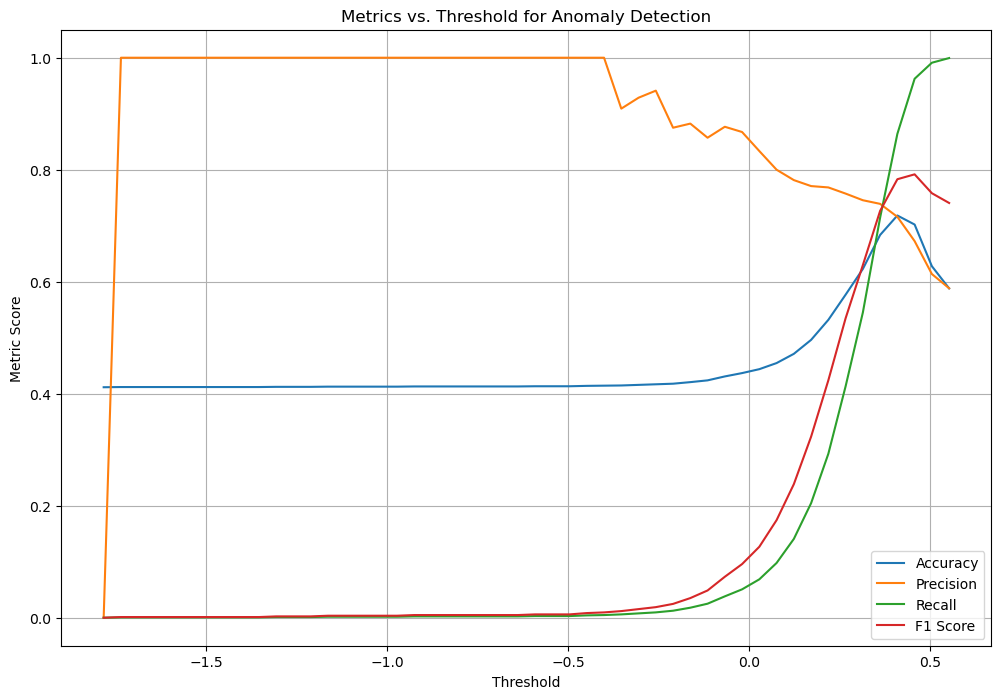

Best Threshold: 0.4094069672966829
Final Accuracy: 0.7182
Final Precision: 0.7159
Final Recall: 0.8640
Final F1 Score: 0.7830


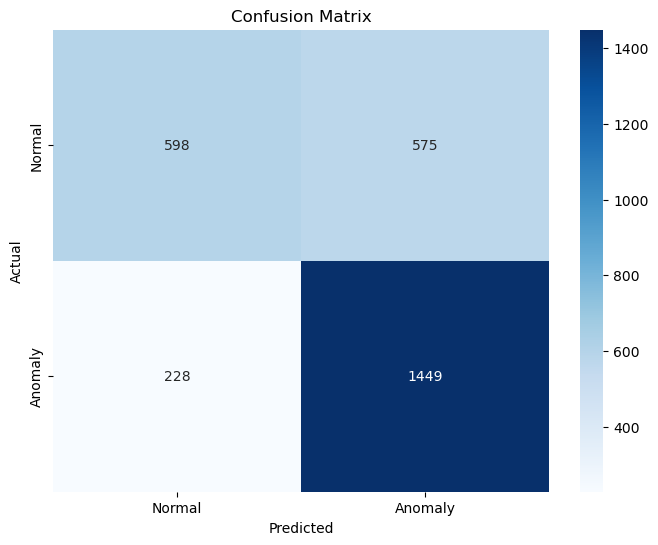

              precision    recall  f1-score   support

      Normal       0.72      0.51      0.60      1173
     Anomaly       0.72      0.86      0.78      1677

    accuracy                           0.72      2850
   macro avg       0.72      0.69      0.69      2850
weighted avg       0.72      0.72      0.71      2850



In [133]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Custom scorer for GridSearchCV
def anomaly_f1_score(y_true, y_pred):
    return f1_score(y_true, (y_pred < 0).astype(int))

f1_scorer = make_scorer(anomaly_f1_score)

# Select features for anomaly detection
features = ['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']
X = data[features]
y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the Local Outlier Factor model with hyperparameter tuning
param_grid = {'n_neighbors': [5, 10, 20], 'leaf_size': [30, 50, 70]}
lof = GridSearchCV(LocalOutlierFactor(novelty=True), param_grid, scoring=f1_scorer, cv=5)
lof.fit(X_train, y_train)

# Best parameters
best_params = lof.best_params_
print(f"Best Parameters: {best_params}")

# Fit the model with the best parameters
lof = LocalOutlierFactor(novelty=True, **best_params)
lof.fit(X_train)

# Obtain anomaly scores for the test set
lof_anomaly_scores = lof.decision_function(X_test)

# Evaluate different thresholds
thresholds = np.linspace(min(lof_anomaly_scores), max(lof_anomaly_scores), 50)
metrics = {'Threshold': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for threshold in thresholds:
    y_pred = (lof_anomaly_scores < threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics['Threshold'].append(threshold)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(12, 8))
plt.plot(metrics_df['Threshold'], metrics_df['Accuracy'], label='Accuracy')
plt.plot(metrics_df['Threshold'], metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Threshold'], metrics_df['Recall'], label='Recall')
plt.plot(metrics_df['Threshold'], metrics_df['F1 Score'], label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Metric Score')
plt.title('Metrics vs. Threshold for Anomaly Detection')
plt.legend()
plt.grid()
plt.show()

# Identify the best threshold
best_threshold = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Threshold']
print(f"Best Threshold: {best_threshold}")

# Set the best threshold for the test set
y_pred_best = (lof_anomaly_scores < best_threshold).astype(int)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_best, target_names=['Normal', 'Anomaly']))

# store the performance metrics
store_model_metrics('LocalOutlierFactor', final_accuracy, final_precision, final_recall, final_f1)


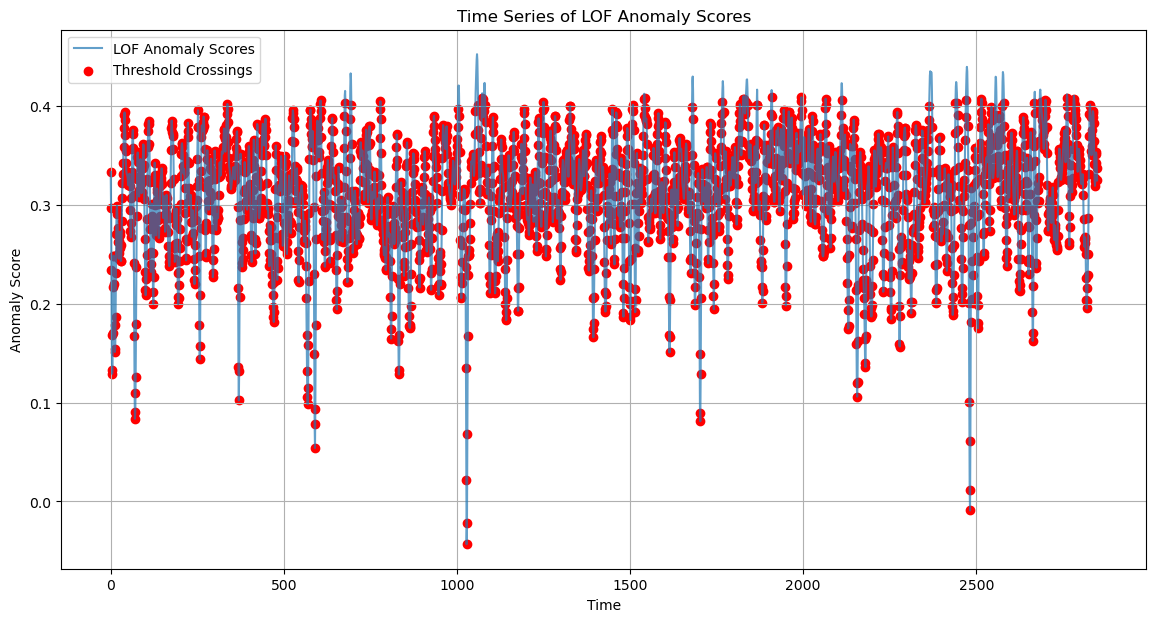

In [100]:
from scipy.ndimage import gaussian_filter1d

# Best Threshold value for LOF
best_threshold_lof = 0.4094069672966829

# Apply smoothing to the LOF anomaly scores for a more continuous appearance
smoothed_lof_anomaly_scores = gaussian_filter1d(lof_anomaly_scores, sigma=2)

# Identify points where the smoothed LOF anomaly scores cross the threshold
threshold_points_lof = np.where(smoothed_lof_anomaly_scores < best_threshold_lof)[0]

# Time series plot of smoothed LOF anomaly scores with best threshold points
plt.figure(figsize=(14, 7))
plt.plot(smoothed_lof_anomaly_scores, linestyle='-', alpha=0.7, label='LOF Anomaly Scores')
plt.scatter(threshold_points_lof, smoothed_lof_anomaly_scores[threshold_points_lof], color='red', marker='o', label='Threshold Crossings')
plt.title('Time Series of LOF Anomaly Scores')
plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid()
plt.show()


## KNN
Gradient Boosting is typically used for classification or regression tasks, but we can adapt it for anomaly detection by treating the problem as a binary classification task where one class represents normal data points and the other class represents anomalies. similar like this
KNeighborsClassifier is commonly used for classification tasks, but it can be adapted for anomaly detection. By treating the problem as a binary classification task, where one class represents normal data points and the other represents anomalies, the classifier learns to distinguish between the two based on their features. This approach leverages the distances to neighbors to identify outliers, making it effective for detecting anomalies in data.

Final Accuracy: 0.9189
Final Precision: 0.9335
Final Recall: 0.9284
Final F1 Score: 0.9309


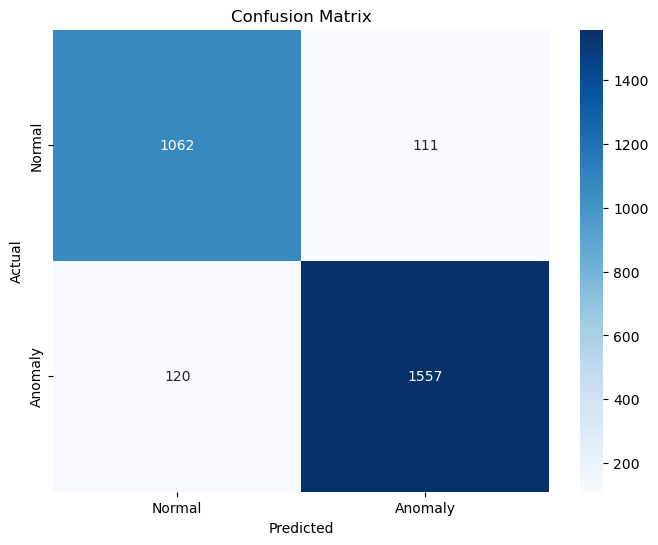

              precision    recall  f1-score   support

      Normal       0.90      0.91      0.90      1173
     Anomaly       0.93      0.93      0.93      1677

    accuracy                           0.92      2850
   macro avg       0.92      0.92      0.92      2850
weighted avg       0.92      0.92      0.92      2850



In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select features for anomaly detection
X = data.drop(columns = ["label","Time"])
Y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the k-Neighbors Classifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_knn)
final_precision = precision_score(y_test, y_pred_knn)
final_recall = recall_score(y_test, y_pred_knn)
final_f1 = f1_score(y_test, y_pred_knn)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_knn, target_names=['Normal', 'Anomaly']))

# store the performance metrics
store_model_metrics('KNeighborsClassifier(KNN)', final_accuracy, final_precision, final_recall, final_f1)

## Support Vector Classification (SVC)
We'll use Support Vector Classification (SVC) for anomaly detection. Even though SVC is typically used for classification tasks, we can adapt it for anomaly detection by training it to distinguish between normal and anomalous data points based on labeled data.

Final Accuracy: 0.9147
Final Precision: 0.9283
Final Recall: 0.9267
Final F1 Score: 0.9275


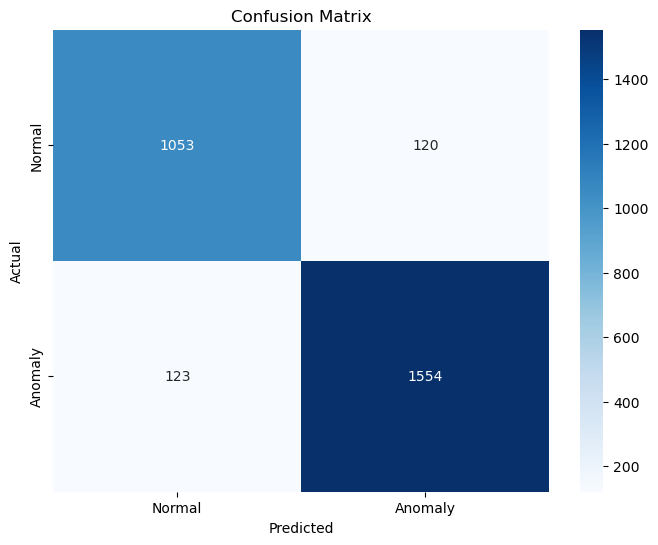

              precision    recall  f1-score   support

      Normal       0.90      0.90      0.90      1173
     Anomaly       0.93      0.93      0.93      1677

    accuracy                           0.91      2850
   macro avg       0.91      0.91      0.91      2850
weighted avg       0.91      0.91      0.91      2850



In [135]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select features for anomaly detection
X = data.drop(columns = ["label","Time"])
Y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the SVC model
svc = SVC(kernel='rbf', gamma='auto', probability=True)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_svc)
final_precision = precision_score(y_test, y_pred_svc)
final_recall = recall_score(y_test, y_pred_svc)
final_f1 = f1_score(y_test, y_pred_svc)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_svc, target_names=['Normal', 'Anomaly']))

# store the performance metrics
store_model_metrics('Support Vector Classification (SVC)', final_accuracy, final_precision, final_recall, final_f1)


## Gradient Boosting
Gradient Boosting is typically used for classification or regression tasks, but we can adapt it for anomaly detection by treating the problem as a binary classification task where one class represents normal data points and the other class represents anomalies.

Final Accuracy: 0.9786
Final Precision: 0.9764
Final Recall: 0.9875
Final F1 Score: 0.9819


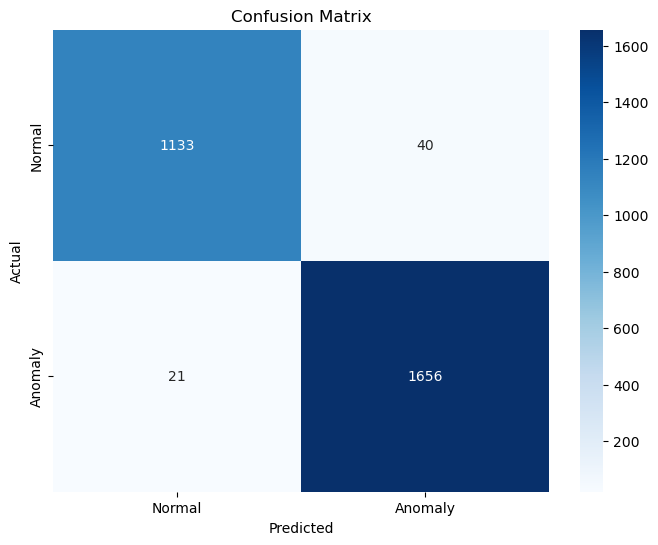

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.97      1173
     Anomaly       0.98      0.99      0.98      1677

    accuracy                           0.98      2850
   macro avg       0.98      0.98      0.98      2850
weighted avg       0.98      0.98      0.98      2850



In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Select features for anomaly detection
X = data.drop(columns = ["label","Time"])
Y = data['label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the Gradient Boosting model
gbc = GradientBoostingClassifier()
gbc.fit(X_train_scaled, y_train)
y_pred_gbc = gbc.predict(X_test_scaled)

# Calculate final accuracy, precision, recall, and F1 score
final_accuracy = accuracy_score(y_test, y_pred_gbc)
final_precision = precision_score(y_test, y_pred_gbc)
final_recall = recall_score(y_test, y_pred_gbc)
final_f1 = f1_score(y_test, y_pred_gbc)

# Print the final results
print(f"Final Accuracy: {final_accuracy:.4f}")
print(f"Final Precision: {final_precision:.4f}")
print(f"Final Recall: {final_recall:.4f}")
print(f"Final F1 Score: {final_f1:.4f}")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_gbc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_gbc, target_names=['Normal', 'Anomaly']))

# store the performance metrics
store_model_metrics('Gradient Boosting', final_accuracy, final_precision, final_recall, final_f1)



## Comparison of Different Models

                                     Accuracy  Precision    Recall  F1 Score
IsolationForest                      0.838246   0.820000  0.929040  0.871121
LocalOutlierFactor                   0.718246   0.715909  0.864043  0.783032
KNeighborsClassifier(KNN)            0.918947   0.933453  0.928444  0.930942
Support Vector Classification (SVC)  0.914737   0.928315  0.926655  0.927484
Gradient Boosting                    0.978596   0.976415  0.987478  0.981915


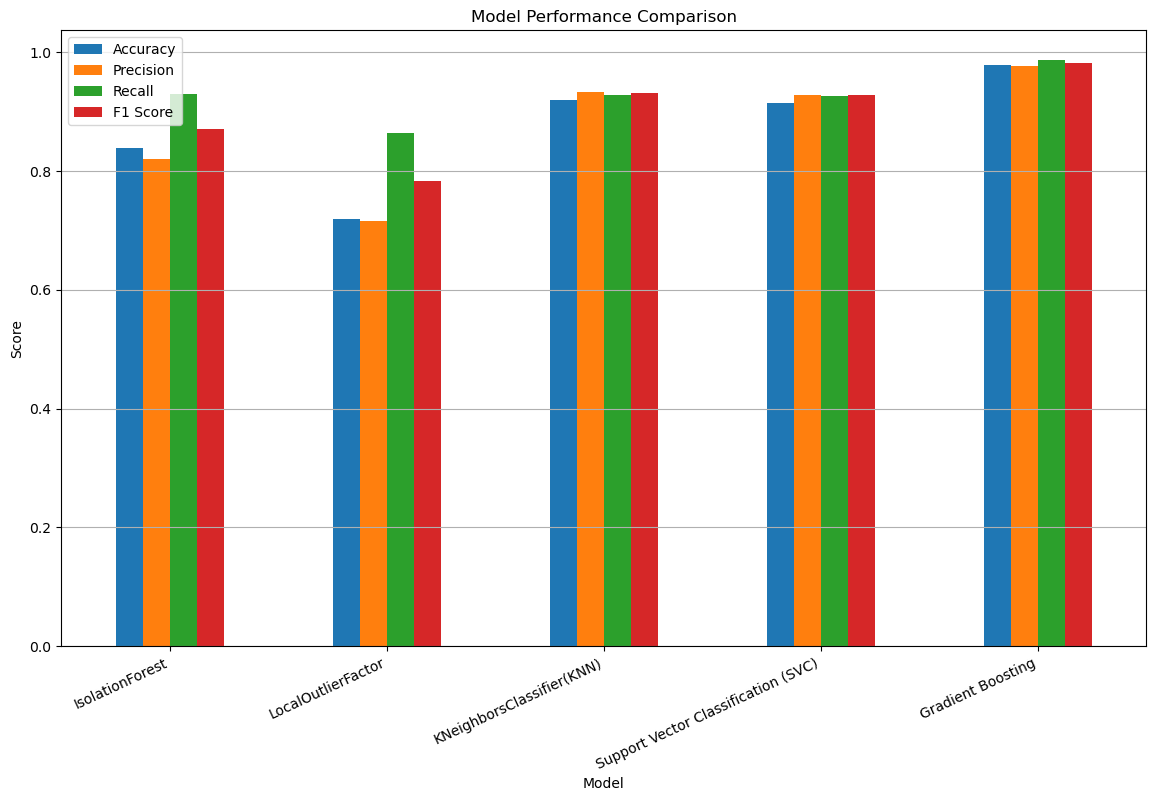

In [144]:
# Convert the model_metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T  # Transpose to have models as rows

# Print the comparison table
print(metrics_df)

# Plot a bar graph for each metric
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=25, ha='right')
plt.grid(axis='y')
plt.show()
